## Test Model 2030

In [1]:
import pypsa 
import matplotlib.pyplot as plt
plt.style.use("bmh")
import pandas as pd
from pypsa.plot import add_legend_patches
import gurobipy
import cartopy.crs as ccrs
from pypsa.optimization import optimize
import matplotlib.cm as cm
import numpy as np

pd.set_option("display.max_rows", None)  # Display all rows
pd.set_option("display.max_columns", None)  # Display all columns


## Import Network

In [6]:
n = pypsa.Network("C:\\Users\\Jeremy\\Documents\\MasterThesis\\Models\\Model_DE\\5nodes\\elec_s_5_ec_lv1.5_Co2L0.45-3h.nc")


INFO:pypsa.io:Imported network elec_s_5_ec_lv1.5_Co2L0.45-3h.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [8]:
n.global_constraints

type carrier_attribute sense  \
GlobalConstraint                                                                
CO2Limit                               primary_energy     co2_emissions    <=   
lv_limit          transmission_volume_expansion_limit            AC, DC    <=   

                      constant            mu  investment_period  
GlobalConstraint                                                 
CO2Limit          2.335500e+08 -5.913329e+00                NaN  
lv_limit          4.555356e+07 -1.323427e-14                NaN

In [9]:
n.global_constraints.loc['CO2Limit','constant'] = 184500000 #TCO2 184500000

In [10]:
for c in n.iterate_components(list(n.components.keys())[2:]):
    print("Component '{}' has {} entries".format(c.name,len(c.df)))

Component 'Bus' has 10 entries
Component 'Carrier' has 23 entries
Component 'GlobalConstraint' has 2 entries
Component 'Line' has 6 entries
Component 'LineType' has 34 entries
Component 'TransformerType' has 14 entries
Component 'Link' has 13 entries
Component 'Load' has 5 entries
Component 'Generator' has 71 entries
Component 'StorageUnit' has 12 entries
Component 'Store' has 5 entries


In [11]:
#remove nuclear fleet from germany
n.generators.loc[n.generators.index.str.endswith('nuclear'), 'p_nom'] = 0


In [12]:
# set marginal cost of load shedding to 3000€/MWh
for bus in n.generators.bus:
    for index in n.generators.index:
        if not bus.endswith('H2') and index.endswith('load'):
            n.generators.loc[index, 'marginal_cost'] = 3000

#edit load shedding's unit from kW to MW
for index in n.generators.index:
    if index.endswith('load') and not index.endswith('H2 load'):
        n.generators.loc[index, 'sign'] = 1

In [13]:
#solve network
n.optimize(solver_name='gurobi')
#n.lopf(solver_name='gurobi')

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 15/15 [00:01<00:00,  9.94it/s]
INFO:linopy.io: Writing time: 10.7s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-sguedmb_.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-sguedmb_.lp


Reading time = 3.06 seconds


INFO:gurobipy:Reading time = 3.06 seconds


obj: 849797 rows, 402989 columns, 1652374 nonzeros


INFO:gurobipy:obj: 849797 rows, 402989 columns, 1652374 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 849797 rows, 402989 columns and 1652374 nonzeros


INFO:gurobipy:Optimize a model with 849797 rows, 402989 columns and 1652374 nonzeros


Model fingerprint: 0x7247210a


INFO:gurobipy:Model fingerprint: 0x7247210a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [1e+01, 9e+09]


INFO:gurobipy:  Bounds range     [1e+01, 9e+09]


  RHS range        [7e+00, 1e+09]


INFO:gurobipy:  RHS range        [7e+00, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 593259 rows and 88080 columns


INFO:gurobipy:Presolve removed 593259 rows and 88080 columns


Presolve time: 1.77s


INFO:gurobipy:Presolve time: 1.77s


Presolved: 256538 rows, 314909 columns, 965196 nonzeros


INFO:gurobipy:Presolved: 256538 rows, 314909 columns, 965196 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.42s


INFO:gurobipy:Ordering time: 0.42s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 50


INFO:gurobipy: Dense cols : 50


 AA' NZ     : 8.839e+05


INFO:gurobipy: AA' NZ     : 8.839e+05


 Factor NZ  : 4.404e+06 (roughly 270 MB of memory)


INFO:gurobipy: Factor NZ  : 4.404e+06 (roughly 270 MB of memory)


 Factor Ops : 2.772e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.772e+08 (less than 1 second per iteration)


 Threads    : 3


INFO:gurobipy: Threads    : 3


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.78171695e+19 -1.24168264e+20  4.10e+13 2.06e+06  3.07e+15     3s


INFO:gurobipy:   0   2.78171695e+19 -1.24168264e+20  4.10e+13 2.06e+06  3.07e+15     3s


   1   2.30780261e+19 -3.88927002e+19  3.51e+13 6.11e+05  1.80e+15     4s


INFO:gurobipy:   1   2.30780261e+19 -3.88927002e+19  3.51e+13 6.11e+05  1.80e+15     4s


   2   2.16133747e+19 -2.49583755e+19  3.28e+13 3.43e+05  1.49e+15     4s


INFO:gurobipy:   2   2.16133747e+19 -2.49583755e+19  3.28e+13 3.43e+05  1.49e+15     4s


   3   1.25324783e+19 -1.33255274e+19  1.85e+13 6.72e+04  7.56e+14     5s


INFO:gurobipy:   3   1.25324783e+19 -1.33255274e+19  1.85e+13 6.72e+04  7.56e+14     5s


   4   3.68953106e+18 -3.72276157e+18  5.29e+12 1.13e+04  2.12e+14     5s


INFO:gurobipy:   4   3.68953106e+18 -3.72276157e+18  5.29e+12 1.13e+04  2.12e+14     5s


   5   1.05023734e+18 -1.40459671e+18  1.38e+12 2.85e+03  5.68e+13     5s


INFO:gurobipy:   5   1.05023734e+18 -1.40459671e+18  1.38e+12 2.85e+03  5.68e+13     5s


   6   1.86200990e+17 -2.43931416e+17  1.14e+11 2.59e+02  5.02e+12     6s


INFO:gurobipy:   6   1.86200990e+17 -2.43931416e+17  1.14e+11 2.59e+02  5.02e+12     6s


   7   5.97241996e+16 -4.10831289e+16  1.08e+09 2.32e+01  1.99e+11     6s


INFO:gurobipy:   7   5.97241996e+16 -4.10831289e+16  1.08e+09 2.32e+01  1.99e+11     6s


   8   3.95679920e+16 -1.05385434e+16  6.56e+08 6.00e+00  9.75e+10     7s


INFO:gurobipy:   8   3.95679920e+16 -1.05385434e+16  6.56e+08 6.00e+00  9.75e+10     7s


   9   1.34890710e+16 -3.99008617e+15  2.08e+08 1.46e+00  3.22e+10     7s


INFO:gurobipy:   9   1.34890710e+16 -3.99008617e+15  2.08e+08 1.46e+00  3.22e+10     7s


  10   4.84471585e+15 -1.47373100e+15  7.10e+07 2.61e-01  1.10e+10     8s


INFO:gurobipy:  10   4.84471585e+15 -1.47373100e+15  7.10e+07 2.61e-01  1.10e+10     8s


  11   1.70992823e+15 -6.28285123e+14  2.42e+07 5.85e-02  3.86e+09     8s


INFO:gurobipy:  11   1.70992823e+15 -6.28285123e+14  2.42e+07 5.85e-02  3.86e+09     8s


  12   4.08793792e+14 -2.70264844e+14  5.31e+06 1.75e-02  1.07e+09     9s


INFO:gurobipy:  12   4.08793792e+14 -2.70264844e+14  5.31e+06 1.75e-02  1.07e+09     9s


  13   1.08258078e+13 -5.11698506e+13  1.16e+05 2.21e-03  9.20e+07     9s


INFO:gurobipy:  13   1.08258078e+13 -5.11698506e+13  1.16e+05 2.21e-03  9.20e+07     9s


  14   3.51617816e+12 -3.69653030e+13  2.91e+04 1.58e-03  5.98e+07     9s


INFO:gurobipy:  14   3.51617816e+12 -3.69653030e+13  2.91e+04 1.58e-03  5.98e+07     9s


  15   1.82633514e+12 -1.06834808e+13  1.02e+04 4.42e-04  1.84e+07    10s


INFO:gurobipy:  15   1.82633514e+12 -1.06834808e+13  1.02e+04 4.42e-04  1.84e+07    10s


  16   6.90937783e+11 -1.39155927e+12  6.65e-01 5.35e-05  3.07e+06    10s


INFO:gurobipy:  16   6.90937783e+11 -1.39155927e+12  6.65e-01 5.35e-05  3.07e+06    10s


  17   3.22608346e+11 -8.58336636e+11  2.12e-01 3.34e-05  1.74e+06    11s


INFO:gurobipy:  17   3.22608346e+11 -8.58336636e+11  2.12e-01 3.34e-05  1.74e+06    11s


  18   1.93559435e+11 -6.19843483e+11  1.06e-01 2.44e-05  1.20e+06    11s


INFO:gurobipy:  18   1.93559435e+11 -6.19843483e+11  1.06e-01 2.44e-05  1.20e+06    11s


  19   8.80395186e+10 -2.94450463e+11  3.91e-02 1.10e-05  5.63e+05    12s


INFO:gurobipy:  19   8.80395186e+10 -2.94450463e+11  3.91e-02 1.10e-05  5.63e+05    12s


  20   6.16941691e+10 -2.62404411e+11  2.49e-02 9.72e-06  4.77e+05    12s


INFO:gurobipy:  20   6.16941691e+10 -2.62404411e+11  2.49e-02 9.72e-06  4.77e+05    12s


  21   3.71924196e+10 -4.64942837e+10  1.18e-02 2.01e-06  1.23e+05    13s


INFO:gurobipy:  21   3.71924196e+10 -4.64942837e+10  1.18e-02 2.01e-06  1.23e+05    13s


  22   3.19583149e+10 -2.72361053e+10  9.05e-03 1.35e-06  8.72e+04    13s


INFO:gurobipy:  22   3.19583149e+10 -2.72361053e+10  9.05e-03 1.35e-06  8.72e+04    13s


  23   2.72679973e+10 -9.98267136e+09  7.03e-03 7.13e-07  5.49e+04    14s


INFO:gurobipy:  23   2.72679973e+10 -9.98267136e+09  7.03e-03 7.13e-07  5.49e+04    14s


  24   2.60113101e+10 -5.99824862e+08  6.53e-03 3.53e-07  3.92e+04    14s


INFO:gurobipy:  24   2.60113101e+10 -5.99824862e+08  6.53e-03 3.53e-07  3.92e+04    14s


  25   2.13752811e+10  3.96632796e+09  4.76e-03 1.42e-07  2.56e+04    15s


INFO:gurobipy:  25   2.13752811e+10  3.96632796e+09  4.76e-03 1.42e-07  2.56e+04    15s


  26   1.58581973e+10  7.03728152e+09  2.54e-03 4.66e-08  1.30e+04    15s


INFO:gurobipy:  26   1.58581973e+10  7.03728152e+09  2.54e-03 4.66e-08  1.30e+04    15s


  27   1.41126188e+10  8.01303633e+09  1.94e-03 1.80e-08  8.98e+03    16s


INFO:gurobipy:  27   1.41126188e+10  8.01303633e+09  1.94e-03 1.80e-08  8.98e+03    16s


  28   1.31113530e+10  8.28731191e+09  1.56e-03 1.09e-08  7.10e+03    16s


INFO:gurobipy:  28   1.31113530e+10  8.28731191e+09  1.56e-03 1.09e-08  7.10e+03    16s


  29   1.21558190e+10  8.45373664e+09  1.21e-03 6.83e-09  5.45e+03    17s


INFO:gurobipy:  29   1.21558190e+10  8.45373664e+09  1.21e-03 6.83e-09  5.45e+03    17s


  30   1.11493714e+10  8.57552234e+09  8.35e-04 4.15e-09  3.79e+03    17s


INFO:gurobipy:  30   1.11493714e+10  8.57552234e+09  8.35e-04 4.15e-09  3.79e+03    17s


  31   1.07595868e+10  8.63040227e+09  6.91e-04 3.09e-09  3.14e+03    18s


INFO:gurobipy:  31   1.07595868e+10  8.63040227e+09  6.91e-04 3.09e-09  3.14e+03    18s


  32   1.02639396e+10  8.67638705e+09  5.19e-04 2.44e-09  2.34e+03    18s


INFO:gurobipy:  32   1.02639396e+10  8.67638705e+09  5.19e-04 2.44e-09  2.34e+03    18s


  33   9.94247509e+09  8.74025519e+09  3.99e-04 1.78e-09  1.77e+03    19s


INFO:gurobipy:  33   9.94247509e+09  8.74025519e+09  3.99e-04 1.78e-09  1.77e+03    19s


  34   9.70588893e+09  8.78238544e+09  3.09e-04 1.26e-09  1.36e+03    19s


INFO:gurobipy:  34   9.70588893e+09  8.78238544e+09  3.09e-04 1.26e-09  1.36e+03    19s


  35   9.50957198e+09  8.81000547e+09  2.35e-04 9.24e-10  1.03e+03    20s


INFO:gurobipy:  35   9.50957198e+09  8.81000547e+09  2.35e-04 9.24e-10  1.03e+03    20s


  36   9.34618560e+09  8.82938210e+09  1.72e-04 8.32e-10  7.61e+02    20s


INFO:gurobipy:  36   9.34618560e+09  8.82938210e+09  1.72e-04 8.32e-10  7.61e+02    20s


  37   9.22553384e+09  8.85392540e+09  1.27e-04 8.58e-10  5.47e+02    21s


INFO:gurobipy:  37   9.22553384e+09  8.85392540e+09  1.27e-04 8.58e-10  5.47e+02    21s


  38   9.18039139e+09  8.86098094e+09  1.18e-04 8.78e-10  4.70e+02    22s


INFO:gurobipy:  38   9.18039139e+09  8.86098094e+09  1.18e-04 8.78e-10  4.70e+02    22s


  39   9.13504668e+09  8.86538989e+09  1.01e-04 9.41e-10  3.97e+02    22s


INFO:gurobipy:  39   9.13504668e+09  8.86538989e+09  1.01e-04 9.41e-10  3.97e+02    22s


  40   9.04379778e+09  8.87214991e+09  1.55e-04 8.77e-10  2.53e+02    23s


INFO:gurobipy:  40   9.04379778e+09  8.87214991e+09  1.55e-04 8.77e-10  2.53e+02    23s


  41   8.99609954e+09  8.87889482e+09  1.34e-04 1.48e-09  1.73e+02    23s


INFO:gurobipy:  41   8.99609954e+09  8.87889482e+09  1.34e-04 1.48e-09  1.73e+02    23s


  42   8.96963464e+09  8.88257370e+09  1.01e-04 1.01e-09  1.28e+02    24s


INFO:gurobipy:  42   8.96963464e+09  8.88257370e+09  1.01e-04 1.01e-09  1.28e+02    24s


  43   8.95068724e+09  8.88570866e+09  8.10e-05 7.84e-10  9.57e+01    25s


INFO:gurobipy:  43   8.95068724e+09  8.88570866e+09  8.10e-05 7.84e-10  9.57e+01    25s


  44   8.94278610e+09  8.88772876e+09  7.27e-05 9.45e-10  8.11e+01    25s


INFO:gurobipy:  44   8.94278610e+09  8.88772876e+09  7.27e-05 9.45e-10  8.11e+01    25s


  45   8.93705541e+09  8.88881312e+09  6.33e-05 9.03e-10  7.10e+01    26s


INFO:gurobipy:  45   8.93705541e+09  8.88881312e+09  6.33e-05 9.03e-10  7.10e+01    26s


  46   8.91267218e+09  8.88981369e+09  5.75e-05 8.89e-10  3.37e+01    26s


INFO:gurobipy:  46   8.91267218e+09  8.88981369e+09  5.75e-05 8.89e-10  3.37e+01    26s


  47   8.90462635e+09  8.89113661e+09  2.98e-05 8.93e-10  1.99e+01    27s


INFO:gurobipy:  47   8.90462635e+09  8.89113661e+09  2.98e-05 8.93e-10  1.99e+01    27s


  48   8.89747458e+09  8.89199655e+09  1.98e-05 1.18e-09  8.07e+00    28s


INFO:gurobipy:  48   8.89747458e+09  8.89199655e+09  1.98e-05 1.18e-09  8.07e+00    28s


  49   8.89482142e+09  8.89241213e+09  1.49e-05 1.60e-09  3.55e+00    28s


INFO:gurobipy:  49   8.89482142e+09  8.89241213e+09  1.49e-05 1.60e-09  3.55e+00    28s


  50   8.89391754e+09  8.89263493e+09  1.78e-05 9.17e-10  1.89e+00    29s


INFO:gurobipy:  50   8.89391754e+09  8.89263493e+09  1.78e-05 9.17e-10  1.89e+00    29s


  51   8.89341196e+09  8.89271871e+09  3.30e-05 8.27e-10  1.02e+00    29s


INFO:gurobipy:  51   8.89341196e+09  8.89271871e+09  3.30e-05 8.27e-10  1.02e+00    29s


  52   8.89318527e+09  8.89277998e+09  1.54e-05 7.46e-10  5.97e-01    29s


INFO:gurobipy:  52   8.89318527e+09  8.89277998e+09  1.54e-05 7.46e-10  5.97e-01    29s


  53   8.89305276e+09  8.89283866e+09  1.14e-05 4.82e-08  3.15e-01    30s


INFO:gurobipy:  53   8.89305276e+09  8.89283866e+09  1.14e-05 4.82e-08  3.15e-01    30s


  54   8.89298482e+09  8.89286148e+09  5.89e-06 2.49e-08  1.82e-01    30s


INFO:gurobipy:  54   8.89298482e+09  8.89286148e+09  5.89e-06 2.49e-08  1.82e-01    30s


  55   8.89294774e+09  8.89286969e+09  4.12e-06 1.75e-08  1.15e-01    31s


INFO:gurobipy:  55   8.89294774e+09  8.89286969e+09  4.12e-06 1.75e-08  1.15e-01    31s


  56   8.89292027e+09  8.89287926e+09  2.09e-06 8.32e-09  6.04e-02    31s


INFO:gurobipy:  56   8.89292027e+09  8.89287926e+09  2.09e-06 8.32e-09  6.04e-02    31s


  57   8.89290341e+09  8.89288380e+09  8.78e-07 4.68e-09  2.89e-02    32s


INFO:gurobipy:  57   8.89290341e+09  8.89288380e+09  8.78e-07 4.68e-09  2.89e-02    32s


  58   8.89289709e+09  8.89288738e+09  4.41e-07 2.06e-09  1.43e-02    32s


INFO:gurobipy:  58   8.89289709e+09  8.89288738e+09  4.41e-07 2.06e-09  1.43e-02    32s


  59   8.89289458e+09  8.89288911e+09  2.74e-07 1.06e-09  8.06e-03    33s


INFO:gurobipy:  59   8.89289458e+09  8.89288911e+09  2.74e-07 1.06e-09  8.06e-03    33s


  60   8.89289338e+09  8.89288963e+09  1.96e-07 1.07e-09  5.52e-03    33s


INFO:gurobipy:  60   8.89289338e+09  8.89288963e+09  1.96e-07 1.07e-09  5.52e-03    33s


  61   8.89289185e+09  8.89288983e+09  9.63e-08 1.14e-09  2.97e-03    33s


INFO:gurobipy:  61   8.89289185e+09  8.89288983e+09  9.63e-08 1.14e-09  2.97e-03    33s


  62   8.89289116e+09  8.89289004e+09  5.04e-08 8.97e-10  1.64e-03    34s


INFO:gurobipy:  62   8.89289116e+09  8.89289004e+09  5.04e-08 8.97e-10  1.64e-03    34s


  63   8.89289073e+09  8.89289021e+09  2.39e-08 7.60e-10  7.64e-04    35s


INFO:gurobipy:  63   8.89289073e+09  8.89289021e+09  2.39e-08 7.60e-10  7.64e-04    35s


  64   8.89289058e+09  8.89289027e+09  1.48e-08 9.83e-10  4.59e-04    35s


INFO:gurobipy:  64   8.89289058e+09  8.89289027e+09  1.48e-08 9.83e-10  4.59e-04    35s


  65   8.89289043e+09  8.89289030e+09  2.49e-08 9.50e-10  1.90e-04    36s


INFO:gurobipy:  65   8.89289043e+09  8.89289030e+09  2.49e-08 9.50e-10  1.90e-04    36s


  66   8.89289035e+09  8.89289032e+09  6.02e-09 9.36e-10  4.01e-05    36s


INFO:gurobipy:  66   8.89289035e+09  8.89289032e+09  6.02e-09 9.36e-10  4.01e-05    36s


  67   8.89289033e+09  8.89289032e+09  1.71e-07 2.39e-09  1.54e-05    37s


INFO:gurobipy:  67   8.89289033e+09  8.89289032e+09  1.71e-07 2.39e-09  1.54e-05    37s


  68   8.89289032e+09  8.89289032e+09  1.40e-06 5.73e-09  6.80e-07    38s


INFO:gurobipy:  68   8.89289032e+09  8.89289032e+09  1.40e-06 5.73e-09  6.80e-07    38s


  69   8.89289032e+09  8.89289032e+09  3.73e-05 1.54e-08  1.40e-10    38s


INFO:gurobipy:  69   8.89289032e+09  8.89289032e+09  3.73e-05 1.54e-08  1.40e-10    38s


INFO:gurobipy:


Barrier solved model in 69 iterations and 37.92 seconds (11.07 work units)


INFO:gurobipy:Barrier solved model in 69 iterations and 37.92 seconds (11.07 work units)


Optimal objective 8.89289032e+09


INFO:gurobipy:Optimal objective 8.89289032e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


  132022 DPushes remaining with DInf 1.3701593e-01                38s


INFO:gurobipy:  132022 DPushes remaining with DInf 1.3701593e-01                38s


       0 DPushes remaining with DInf 1.1377281e-01                40s


INFO:gurobipy:       0 DPushes remaining with DInf 1.1377281e-01                40s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


    6732 PPushes remaining with PInf 3.8622661e-04                40s


INFO:gurobipy:    6732 PPushes remaining with PInf 3.8622661e-04                40s


    5052 PPushes remaining with PInf 2.0248351e-04                40s


INFO:gurobipy:    5052 PPushes remaining with PInf 2.0248351e-04                40s


       0 PPushes remaining with PInf 0.0000000e+00                43s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                43s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 8.8716894e-02     43s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 8.8716894e-02     43s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   77061    8.8928903e+09   0.000000e+00   8.871689e-02     43s


INFO:gurobipy:   77061    8.8928903e+09   0.000000e+00   8.871689e-02     43s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Extra simplex iterations after uncrush: 1


INFO:gurobipy:Extra simplex iterations after uncrush: 1


   77352    8.8928903e+09   0.000000e+00   0.000000e+00     44s


INFO:gurobipy:   77352    8.8928903e+09   0.000000e+00   0.000000e+00     44s


INFO:gurobipy:


Solved in 77352 iterations and 44.46 seconds (15.16 work units)


INFO:gurobipy:Solved in 77352 iterations and 44.46 seconds (15.16 work units)


Optimal objective  8.892890324e+09


INFO:gurobipy:Optimal objective  8.892890324e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 402989 primals, 849797 duals
Objective: 8.89e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

('ok', 'optimal')

In [14]:
def system_cost(n): #n.statistics.capex()
    tsc = n.statistics.capex() + n.statistics.opex()
    return tsc.droplevel(0).div(1e6) # million €/a

In [15]:
tot_cos_base=n.objective/1e9
system_cost_base = system_cost(n)
marg_price_region_base = n.buses_t.marginal_price.mean()
stat_base = n.statistics()

## Plot Network

<function matplotlib.pyplot.show(close=None, block=None)>

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


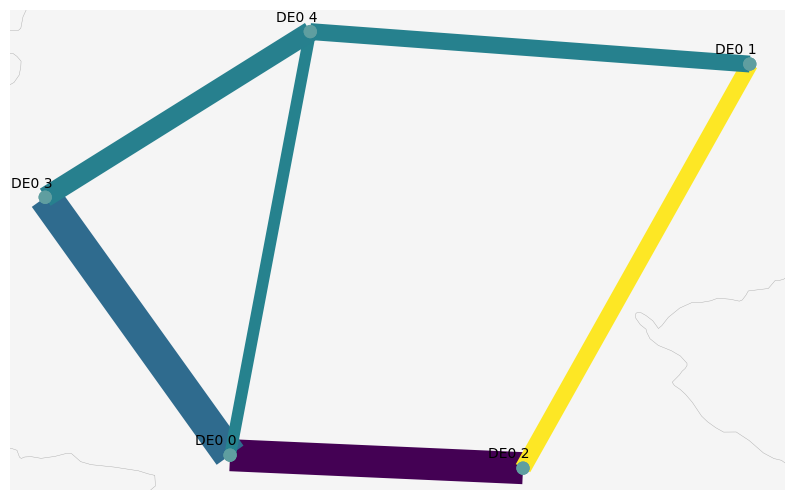

In [16]:
loading = (n.lines_t.p0.abs().mean().sort_index()/(n.lines.s_nom_opt*n.lines.s_max_pu).sort_index()).fillna(0.)

fig, ax = plt.subplots(
    figsize=(10,10),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

n.plot(
    ax=ax,
    branch_components=["Line"],
    line_widths=n.lines.s_nom_opt/1e3, #GW
    line_colors=loading,
    line_cmap=plt.cm.viridis,
    color_geomap=True,
    bus_sizes=0.003
)

bus = n.buses
region = []
for index, row in bus.iterrows():
    x = row['x']
    y = row['y']
    if "H2" in index:
        pass
    else:
        region.append(index)
        ax.annotate(
        index,
        xy=(x, y),
        xytext=(5, 5),  # Adjust the position of the annotation
        textcoords="offset points",
        ha='right', va='bottom'
    )

plt.show


## Installed Capacity Map Plot

In [17]:
#color list for installed cap
tech_list = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().unstack().columns.tolist()
tech_list.remove('load')
color_cap = []

for i in range(len(tech_list)):
    for j in range(len(n.carriers.index)):
        if tech_list[i] == n.carriers.index[j]:
            color_cap.append(n.carriers.color[j])
            break  # break the inner loop once a match is found  

cap = n.generators[n.generators['carrier']!='load'].groupby(['bus', 'carrier']).p_nom_opt.sum()

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\3847545614.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color_cap.append(n.carriers.color[j])


c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


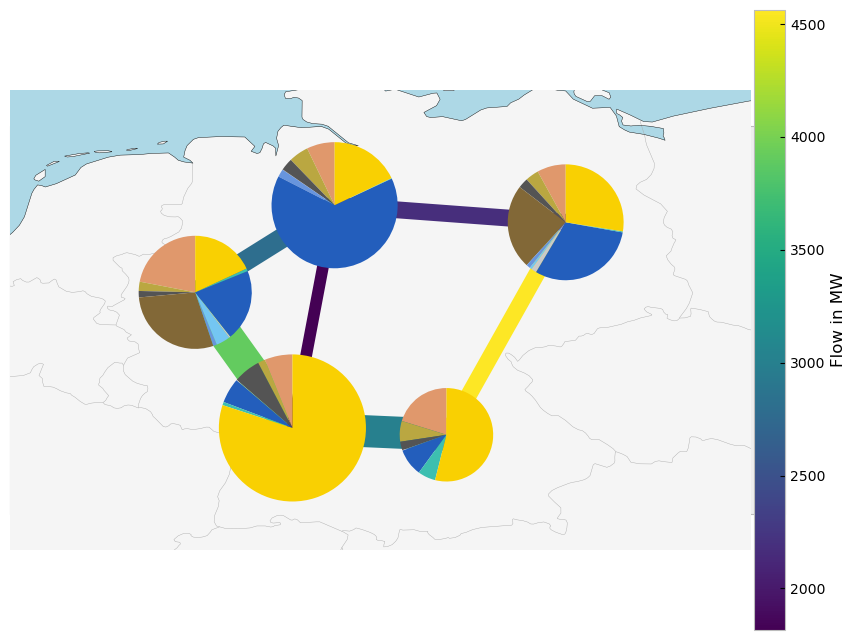

In [18]:
fig, ax = plt.subplots(
    figsize=(10,10),
    subplot_kw={"projection": ccrs.PlateCarree()}
)

collection = n.plot(
    bus_sizes=cap / 5e4,
    bus_colors = color_cap,
    margin=0.5,
    #flow="mean",
    line_widths=n.lines.s_nom_opt/1e3, #GW
    link_widths=0,
    color_geomap=True,
    line_colors=n.lines_t.p0.mean().abs(),
)
        
plt.colorbar(collection[2], fraction=0.04, pad=0.004, label="Flow in MW")
plt.show()

## Generation Map Plot

In [19]:
#color list for energy generated 
tech_list_gen_table = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().unstack().columns.tolist()
colors_gen_table = []

for i in range(len(tech_list_gen_table)):
    for j in range(len(n.carriers.index)):
        if tech_list_gen_table[i] == n.carriers.index[j]:
            colors_gen_table.append(n.carriers.color[j])
            break  # break the inner loop once a match is found 

#Adjust Load shedding's unit to MW from kW
#for column in n.generators_t.p.columns:
#    if column.endswith('load') and not column.endswith('H2 load'):
#        n.generators_t.p[column]/=1e3
        

gen = n.generators.assign(g=n.generators_t.p.mean()).groupby(["bus", "carrier"]).g.sum()

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\971004373.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  colors_gen_table.append(n.carriers.color[j])


c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


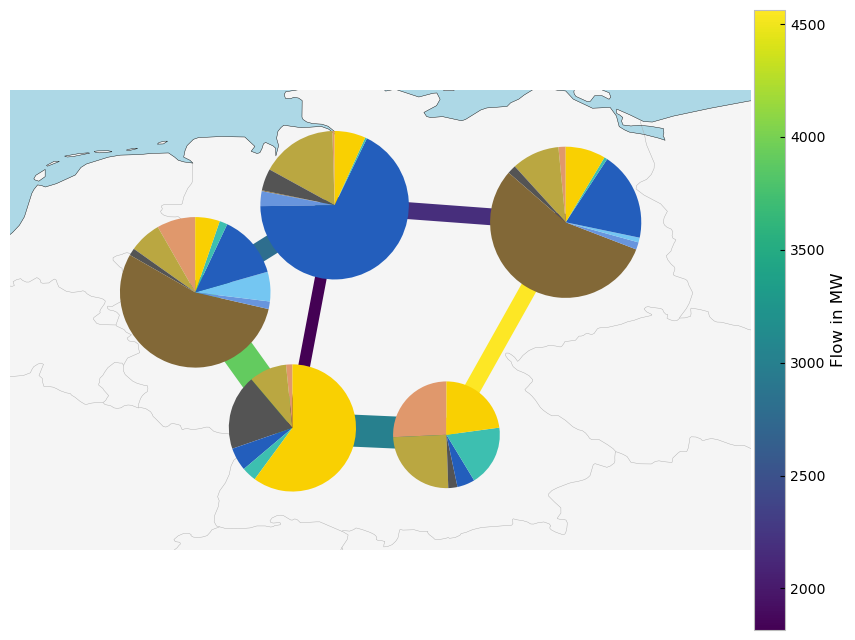

In [20]:
carriers = n.generators.carrier.unique()

plt.figure(figsize =(10,10))

collection = n.plot(
    bus_sizes=gen / 1e4,
    bus_colors = colors_gen_table,
    margin=0.5,
    #flow="mean",
    line_widths=n.lines.s_nom_opt/1e3, #GW
    link_widths=0,
    color_geomap=True,
    line_colors=n.lines_t.p0.mean().abs(),
)
plt.colorbar(collection[2], fraction=0.04, pad=0.004, label="Flow in MW")
plt.show()

## Installed Capacity

<Figure size 640x480 with 0 Axes>

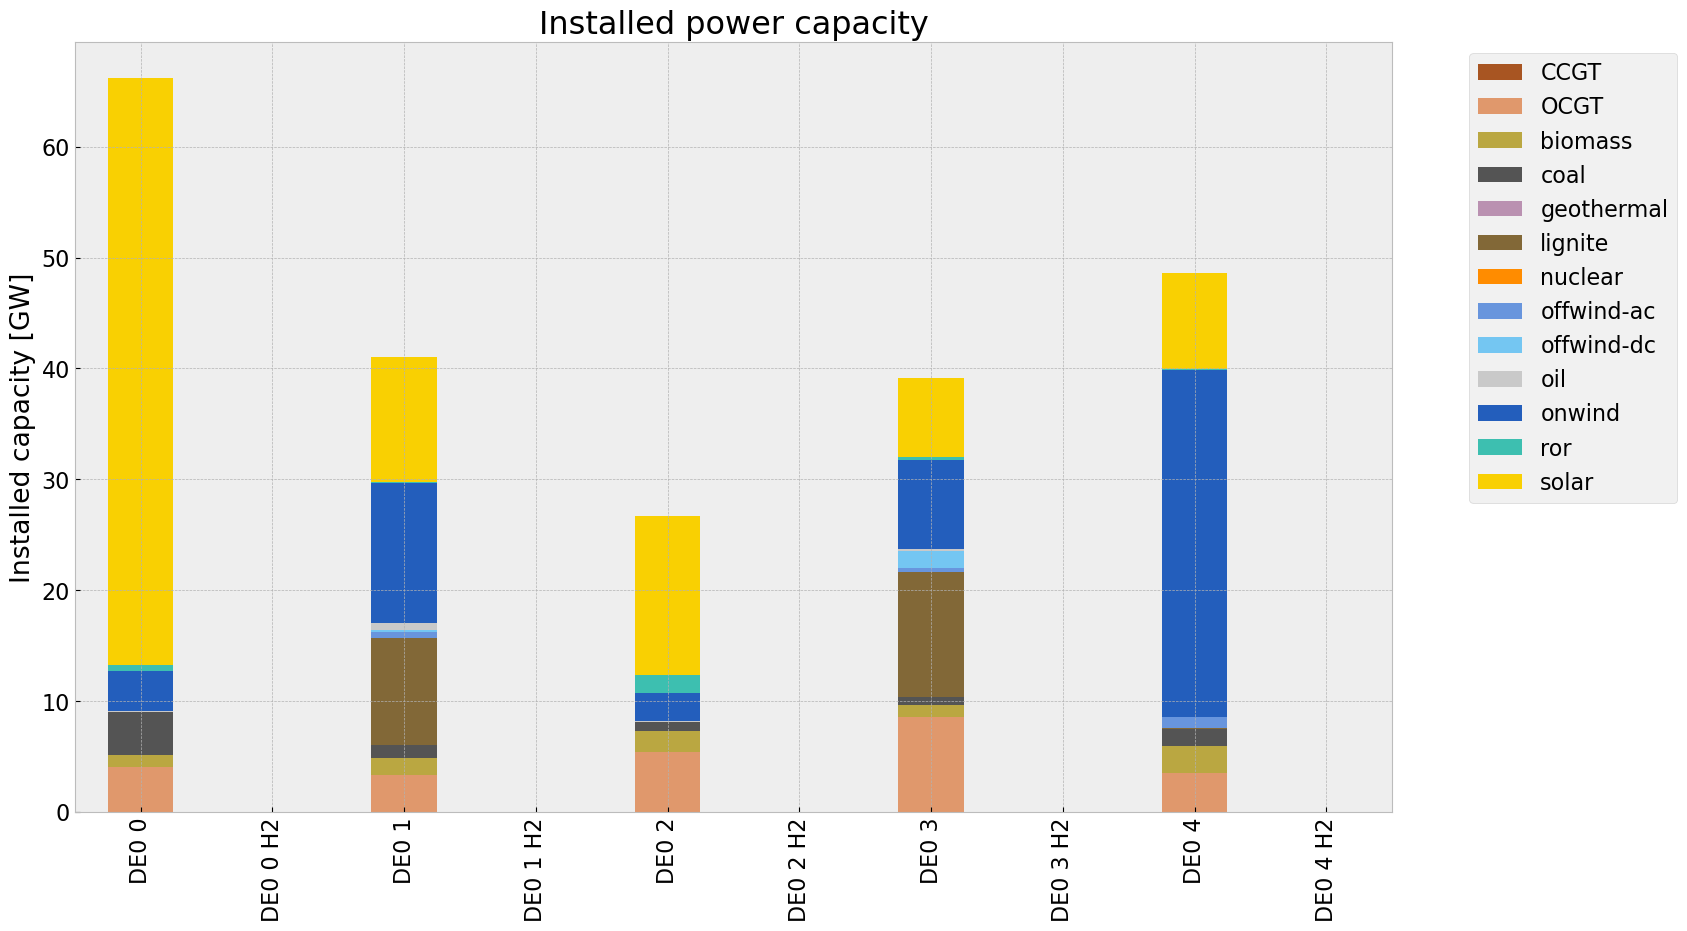

In [111]:
def inst_cap_table(n,colors):

    capacities = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum()
    capacities.fillna(0, inplace=True)
    gen = (capacities.unstack()/1000).drop(columns=['load'],inplace=False)
    gen.fillna(0, inplace=True)

    plt.figure()
    plt.rcParams.update({'font.size': 16})

    gen.plot.bar(figsize=(17,10),
                                stacked=True,
                                color=colors,
                                grid=True,
                                xlabel="",
                                ylabel="Installed capacity [GW]",
                                title=f"Installed power capacity"
    )
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    return capacities

# consolidated istalled cap without load_shedding

#capacities_base = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum()
#capacities_base.fillna(0, inplace=True)
#gen = (capacities_base.unstack()/1000).drop(columns=['load'],inplace=False)

capacities_base = inst_cap_table(n, color_cap)

## Generation

<Figure size 640x480 with 0 Axes>

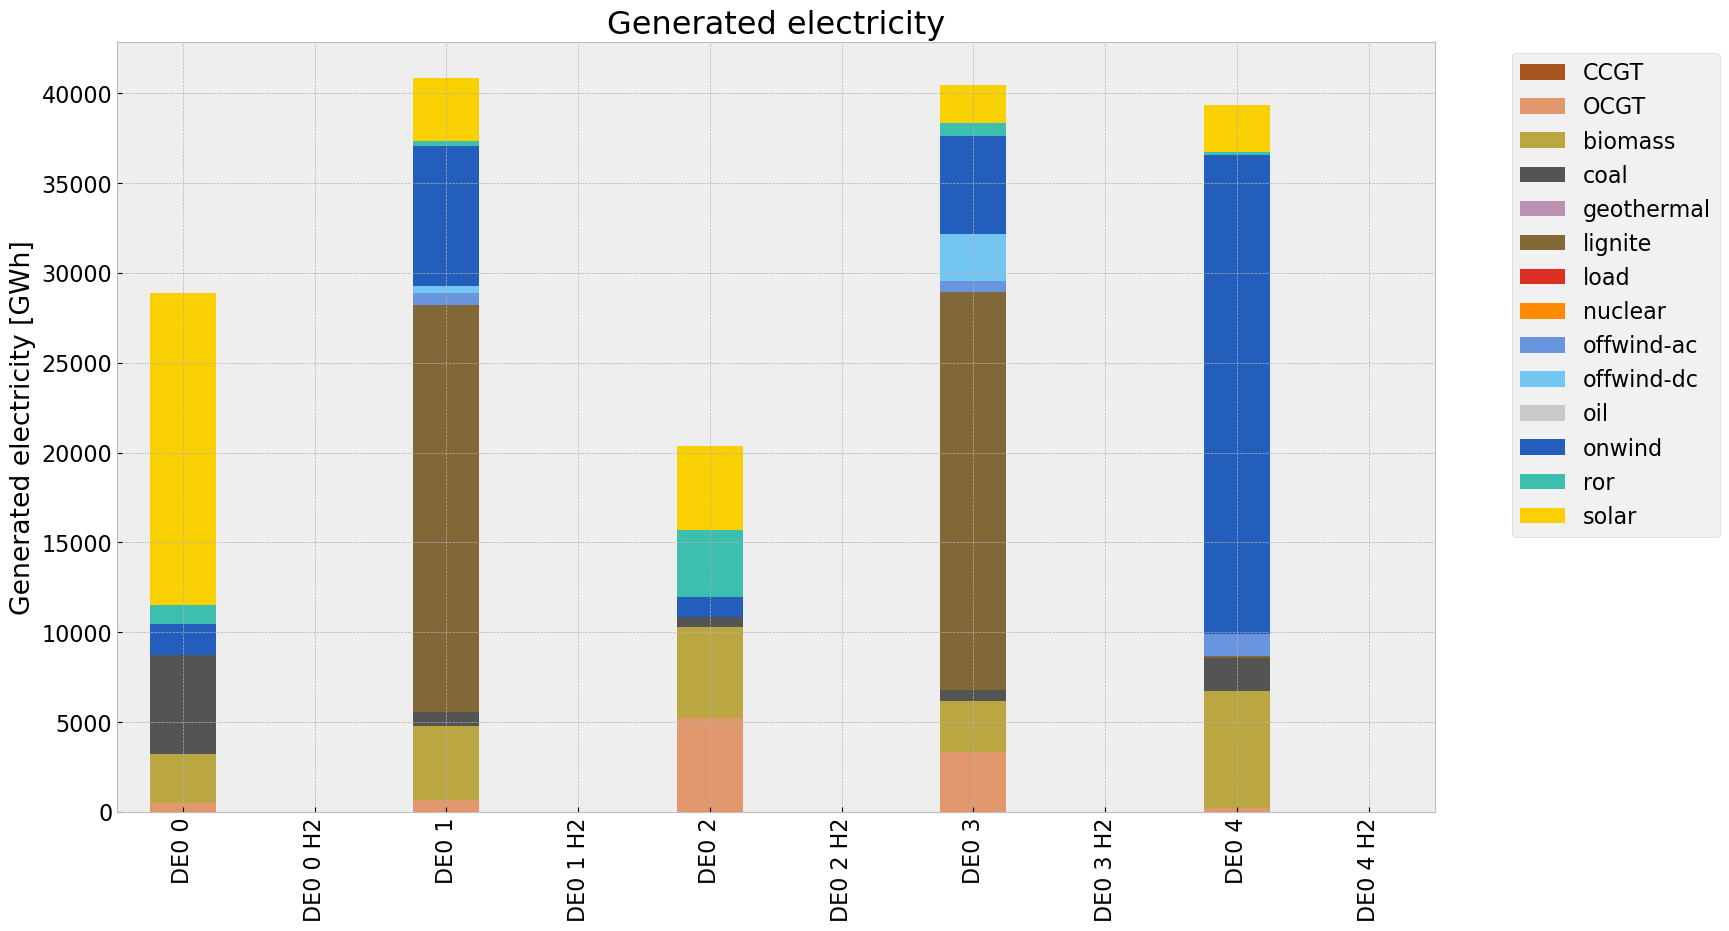

In [109]:
def gen_power_table(n, color):

    carrier = n.generators.carrier.unique()
    df_tot_generation = n.generators_t.p.sum()

    generations = pd.Series(index = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().index)

    for r in region:
        for tech in carrier:
            key = f"{r} {tech}"
            if key in df_tot_generation.index:
                try:
                    generations.loc[r, tech] = df_tot_generation[key]
                    #print(generations.loc[r, tech])
                except KeyError:
                    print('error')
    generations.fillna(0, inplace=True)

    generations = (generations.unstack()/1000)#GWh
    #generations['load']/=1e3


    plt.figure()
    plt.rcParams.update({'font.size': 16})

    generations.plot.bar(figsize=(17,10),
                                stacked=True,
                                color=color,
                                grid=True,
                                xlabel="",
                                ylabel="Generated electricity [GWh]",
                                title=f"Generated electricity"
    )
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    return generations

gen_base = gen_power_table(n,colors_gen_table)

## Snapshot

In [24]:
sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
tech_list_gen = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum()
links = n.links_t.p0.groupby(n.links.carrier, axis =1).sum().drop(['DC','H2 electrolysis'], axis=1, inplace =False).head()
tech_list_gen = pd.concat([tech_list_gen, sto], axis=1).columns.tolist()

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\3551839577.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\3551839577.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  tech_list_gen = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum()
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\3551839577.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  links = n.links_t.p0.groupby(n.links.carrier, axis =1).sum().drop(['DC','H2 electrolysis'], axis=1, inplace =False).head()


In [25]:
colors_gen = []

for i in range(len(tech_list_gen)):
    for j in range(len(n.carriers.index)):
        if tech_list_gen[i] == n.carriers.index[j]:
            colors_gen.append(n.carriers.color[j])
            break  # break the inner loop once a match is found  


C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\3660868222.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  colors_gen.append(n.carriers.color[j])


In [26]:
def gen_curve(n, start, end, colors):

    plt.rcParams.update({'font.size': 16})


    p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
    #p_by_carrier['load'] /= 1e3

    #links fuel cell
    links = n.links_t.p1.groupby(n.links.carrier, axis=1).sum().div(1e3)
    links = links.drop(columns='DC', inplace=False)
    links['H2 fuel cell']*=-1
       
    # join generator, links, and storage unit
    if not n.storage_units.empty:
        sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)     
        p_by_carrier = pd.concat([p_by_carrier, sto, links], axis=1)
        
    p_by_carrier.index = pd.date_range(start='2030-01-01', end='2030-12-31 21:00:00', freq='3H')

    start_date = start
    end_date = end
    
    # Create a date range for the specified time range
    time = pd.date_range(start=start_date, end=end_date, freq='3H')
    
    fig, ax = plt.subplots(figsize=(20, 10))
    
    p_no_H = p_by_carrier.drop(columns = 'H2 electrolysis', inplace = False)
    p_no_H.where(p_no_H>0).loc[time].plot.area(
        ax=ax,
        linewidth=0,
        color=colors,
        grid=True,

    )
    
    charge = p_by_carrier.where(p_by_carrier<0).dropna(how='all', axis=1).loc[time]
    
    
    if not charge.empty:

        charge.plot.area(
            ax=ax,
            linewidth=0,
            color=["yellowgreen", "magenta", "purple", "grey"],
            grid=True,
        )
    
    loads = n.loads_t.p_set.sum(axis=1).div(1e3)
    loads.index = pd.date_range(start='2030-01-01', end='2030-12-31 21:00:00', freq='3H')
    
    loads.loc[time].plot(ax=ax, c='k',grid=True)


    plt.legend(loc=(1.05,0))
    
    ax.set_ylabel("Power [GW]")
    ax.set_title(f"Hourly electricity production")


    ax.set_ylim(-100,150)

In [27]:
#e_balance = n.statistics.energy_balance(aggregate_time=False, aggregate_bus=False).loc[:, :, "AC",:].droplevel(2)
#e_balance.to_excel('energybalance.xlsx', index=True) 


In [28]:
#tes = n.statistics.energy_balance(aggregate_time=False, aggregate_bus=False).loc[:, :, "AC", :].droplevel(2)
#tes.to_csv('energybalance.csv', index=True)

In [29]:
#n.loads_t.p_set.sum(axis=1).loc[pd.date_range(start='2013-01-08', end='2013-01-14', freq='3H')].div(1e3).plot(ax=ax, c='k',grid=True)


In [30]:
#p_by_carrier.where(p_by_carrier>0).loc[pd.date_range(start='2013-01-08', end='2013-01-14', freq='3H')].sum(axis=1)

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\1422613485.py:6: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\1422613485.py:10: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  links = n.links_t.p1.groupby(n.links.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\1422613485.py:16: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\1422613485.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  p_by_carrier.index = pd.date_range(start='2030-01-01', end=

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1794: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\1422613485.py:51: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  loads.index = pd.date_range(start='2030-01-01', end='2030-12-31 21:00:00', freq='3H')


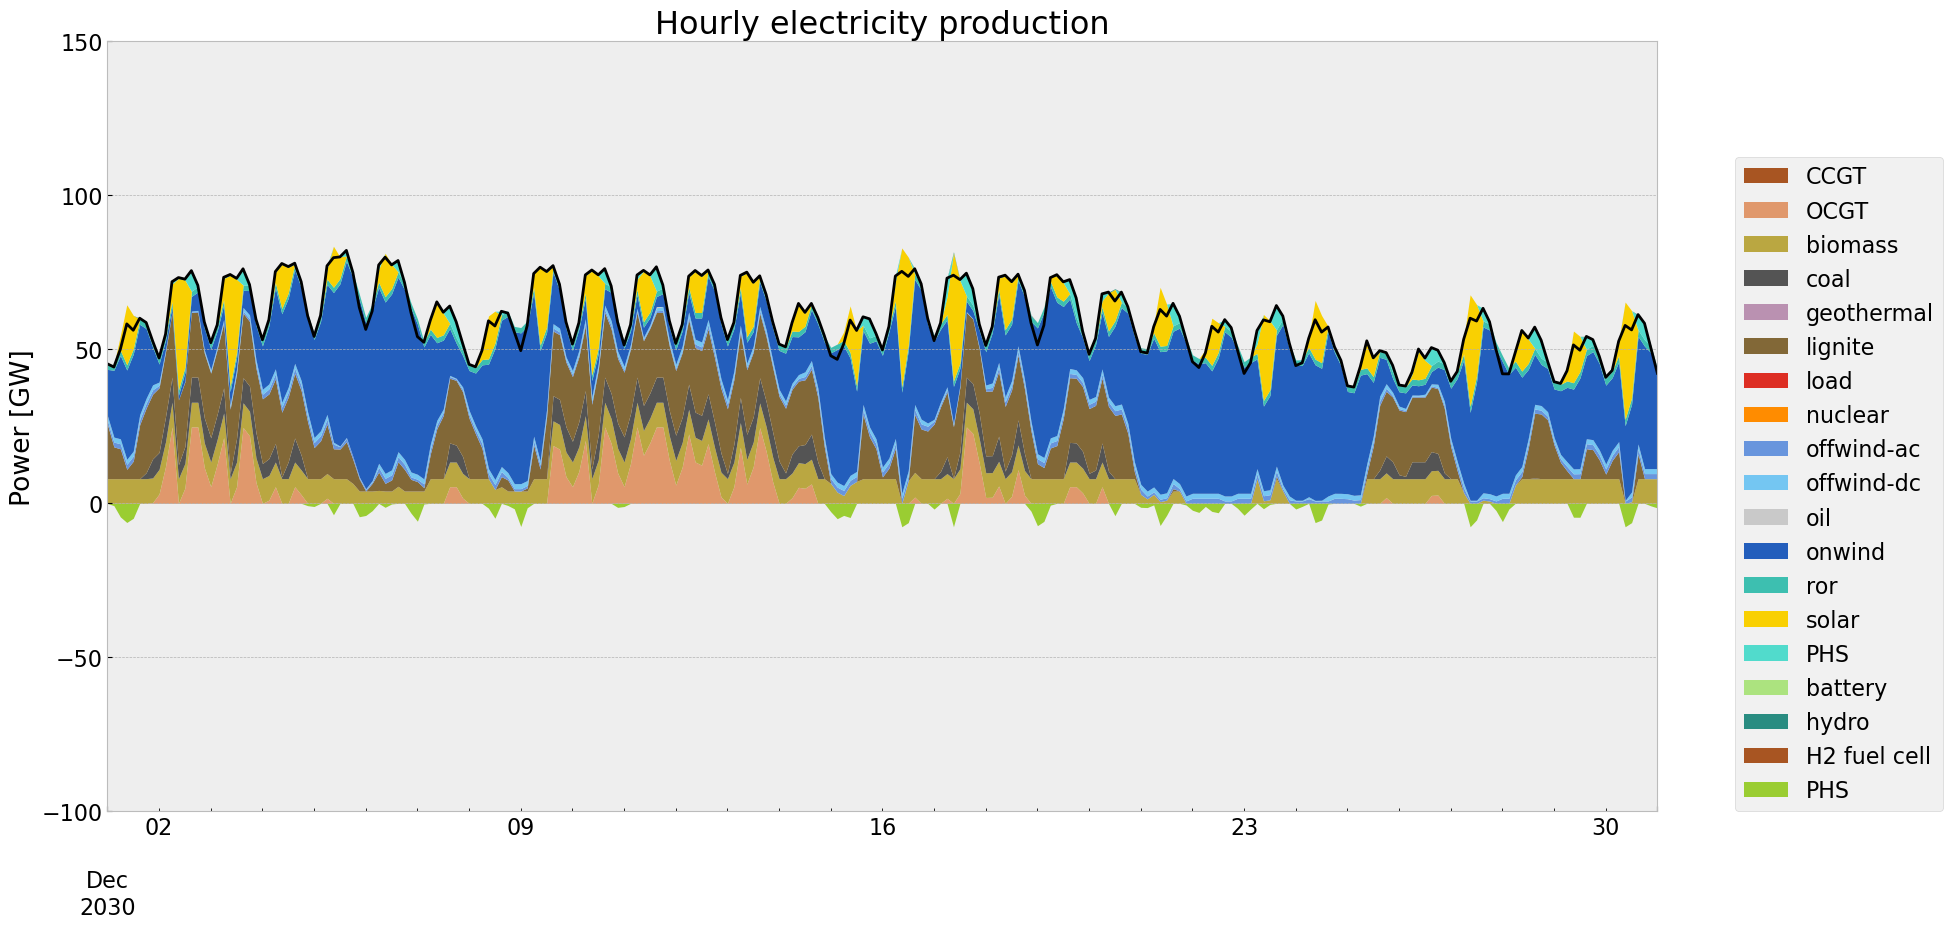

In [31]:
# winter
gen_curve(n, '2030-12-01', '2030-12-31', colors_gen)

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\1422613485.py:6: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\1422613485.py:10: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  links = n.links_t.p1.groupby(n.links.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\1422613485.py:16: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\1422613485.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  p_by_carrier.index = pd.date_range(start='2030-01-01', end=

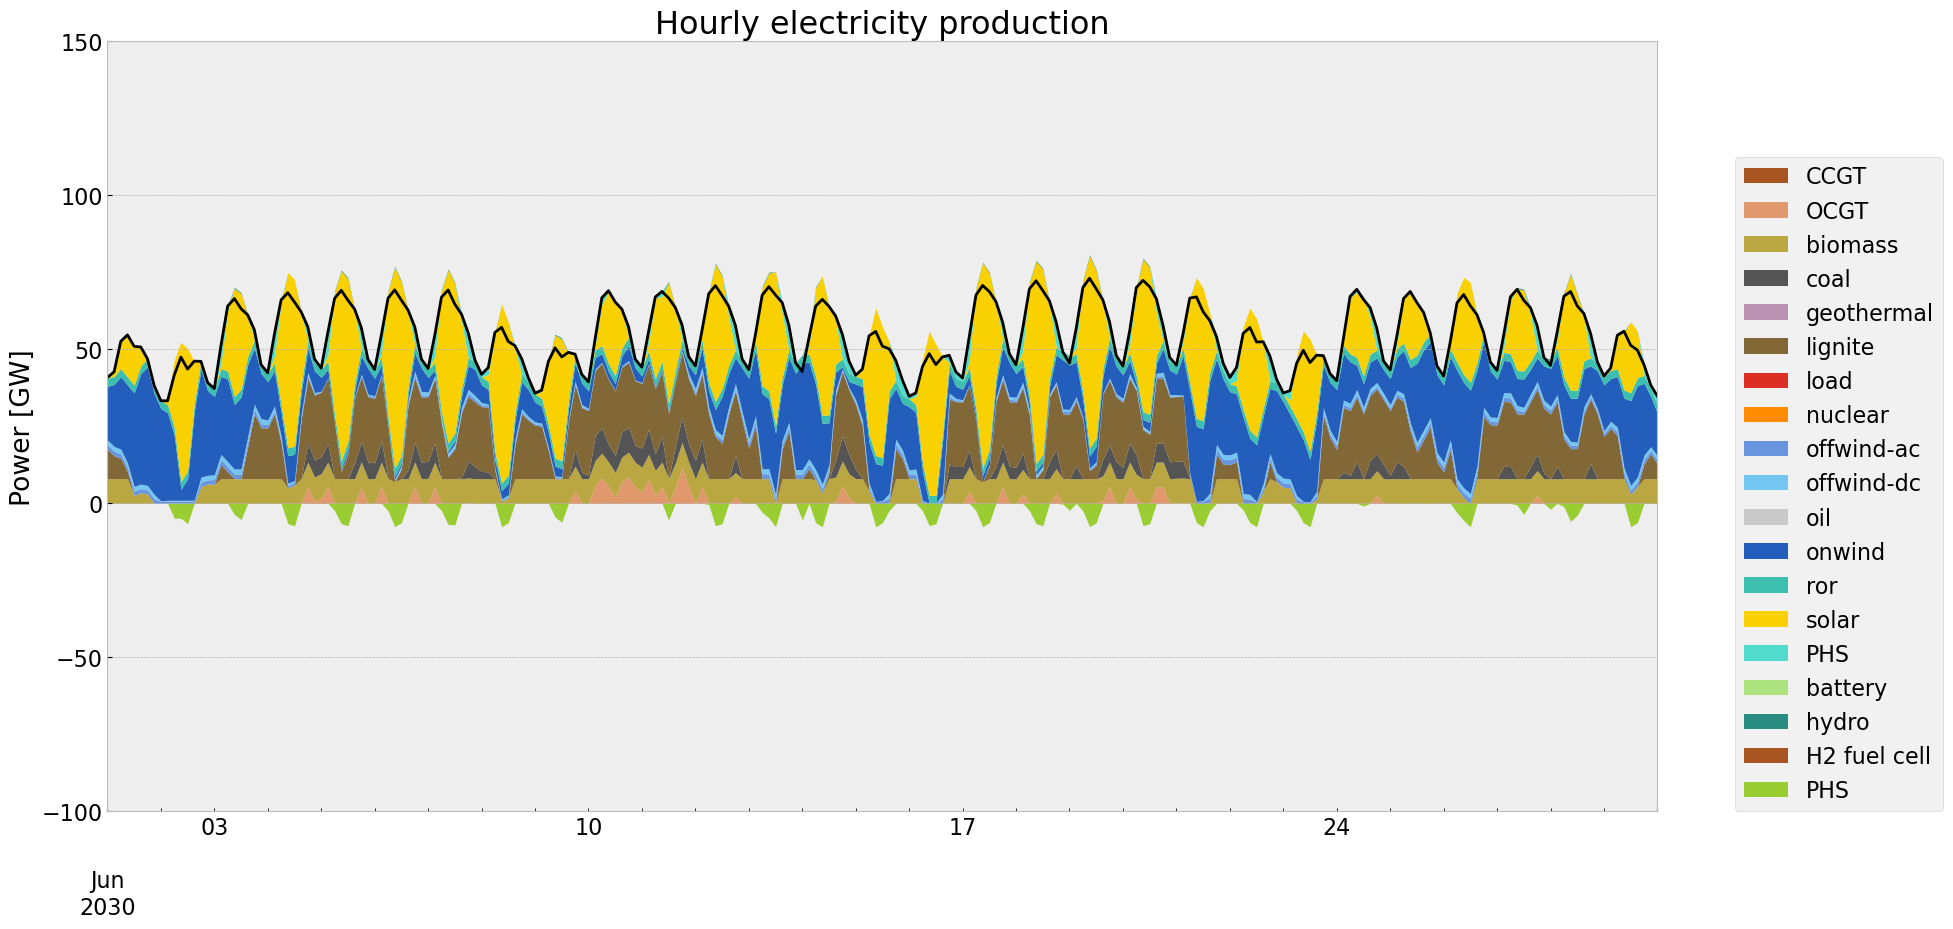

In [32]:
#summer
gen_curve(n, '2030-06-01', '2030-06-30', colors_gen)

## Storage

In [33]:
def inst_store_table(n):
    
    plt.rcParams.update({'font.size': 16})

    (n.storage_units.groupby(['bus','carrier']).p_nom_opt.sum().unstack()/1000).plot.bar(figsize=(17,10),
                                stacked=True,
                                color=["yellowgreen","magenta","red","blue"],
                                grid=True,
                                xlabel="",
                                ylabel="Installed capacity [GW]",
                                #title=f"Installed power capacities of storage systems in Italy in {year}",
                                ylim=[0,20]
    )

    return n.storage_units.groupby(['bus','carrier']).p_nom_opt.sum().unstack()/1000

carrier      PHS  battery   hydro
bus                              
DE0 0    2.10300      0.0  0.1200
DE0 1    0.99980      0.0     NaN
DE0 2    1.85500      0.0  0.1695
DE0 3    1.74142      0.0     NaN
DE0 4    0.90000      0.0     NaN

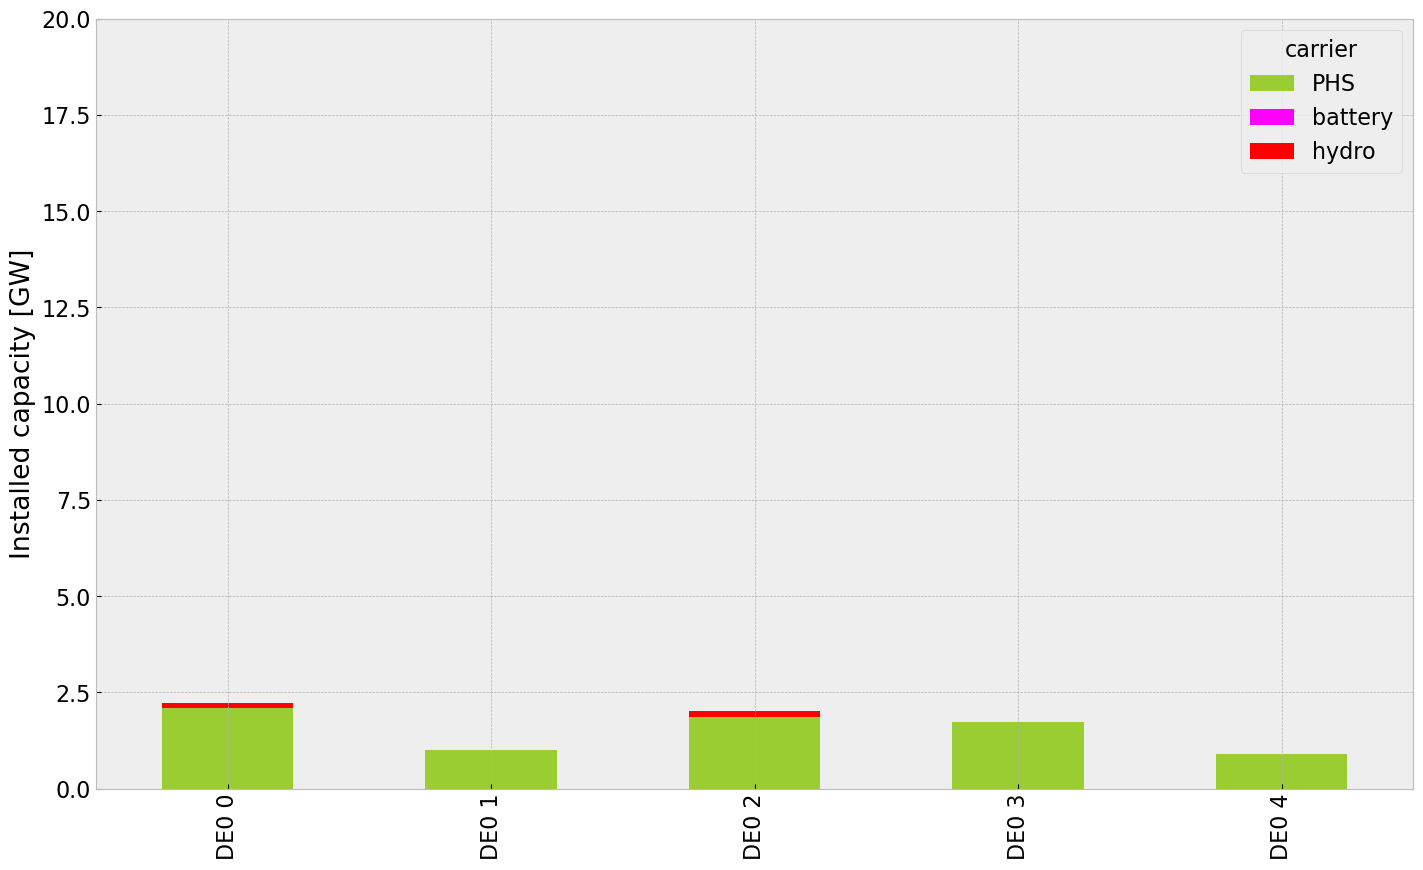

In [34]:
inst_store_table(n)

In [35]:
n.stores.groupby(['bus','carrier']).e_nom_opt.sum().unstack()/1000

carrier    H2
bus          
DE0 0 H2  0.0
DE0 1 H2  0.0
DE0 2 H2  0.0
DE0 3 H2  0.0
DE0 4 H2  0.0

carrier    H2
bus          
DE0 0 H2  0.0
DE0 1 H2  0.0
DE0 2 H2  0.0
DE0 3 H2  0.0
DE0 4 H2  0.0

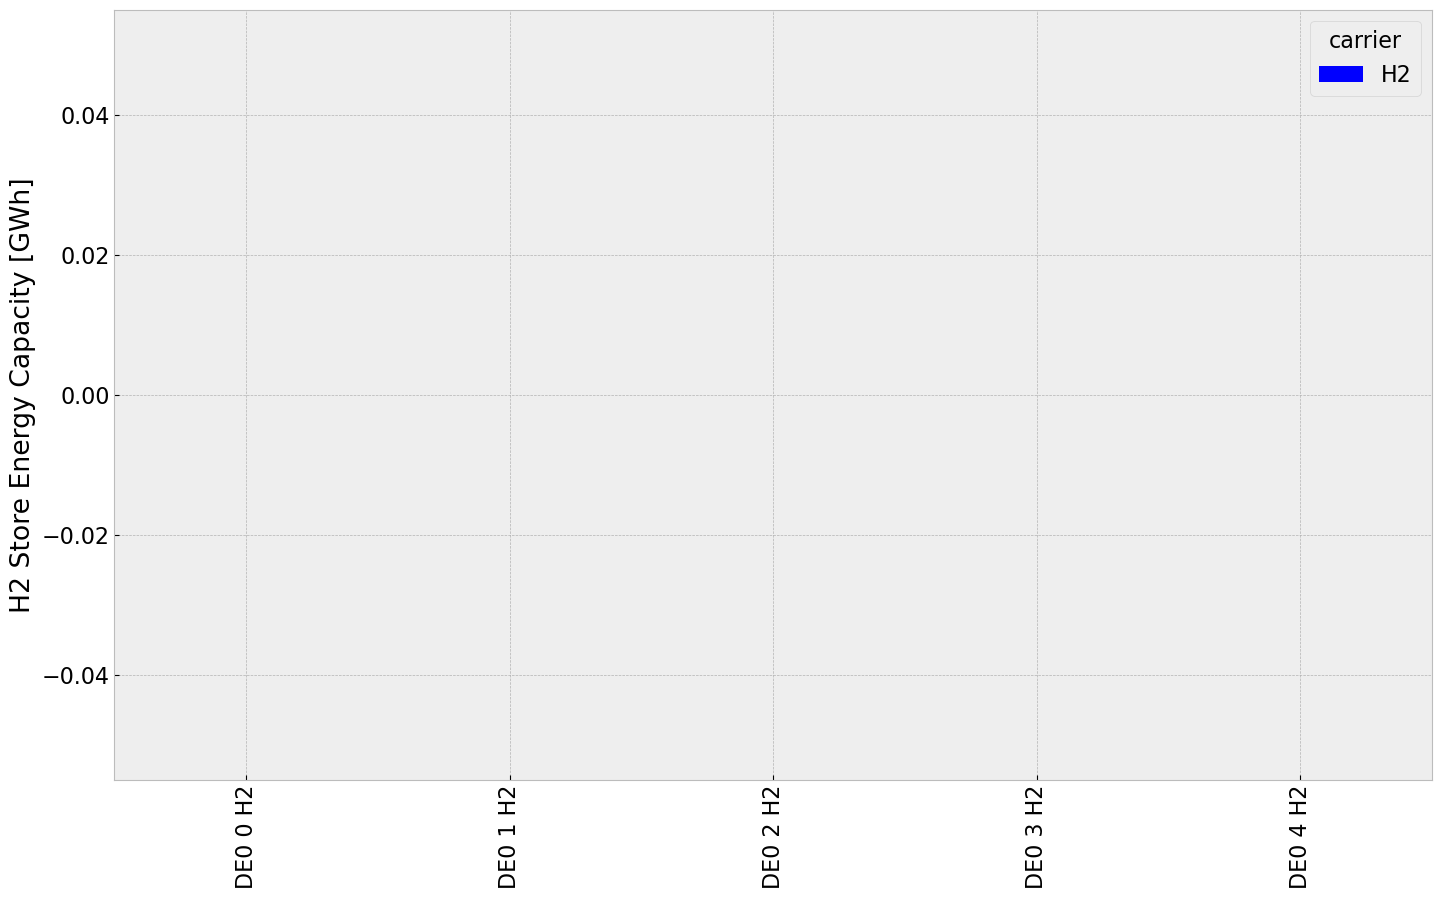

In [36]:
def inst_storeh2_table(n):
    
    plt.rcParams.update({'font.size': 16})

    (n.stores.groupby(['bus','carrier']).e_nom_opt.sum().unstack()/1000).plot.bar(figsize=(17,10),
                                stacked=True,
                                color=["blue"],
                                grid=True,
                                xlabel="",
                                ylabel="H2 Store Energy Capacity [GWh]",
                                #title=f"Installed power capacities of storage systems in Italy in {year}",
                                #ylim=[0,7500]
    )

    return n.stores.groupby(['bus','carrier']).e_nom_opt.sum().unstack()/1000

inst_storeh2_table(n)

In [37]:
n.stores

bus carrier  e_nom_extendable  e_cyclic  capital_cost  \
Store                                                                  
DE0 0 H2  DE0 0 H2      H2              True      True     148.31893   
DE0 1 H2  DE0 1 H2      H2              True      True     148.31893   
DE0 2 H2  DE0 2 H2      H2              True      True     148.31893   
DE0 3 H2  DE0 3 H2      H2              True      True     148.31893   
DE0 4 H2  DE0 4 H2      H2              True      True     148.31893   

          marginal_cost  build_year  e_nom_opt type  e_nom  e_nom_mod  \
Store                                                                   
DE0 0 H2       0.010393           0        0.0         0.0        0.0   
DE0 1 H2       0.009572           0        0.0         0.0        0.0   
DE0 2 H2       0.009454           0        0.0         0.0        0.0   
DE0 3 H2       0.010103           0        0.0         0.0        0.0   
DE0 4 H2       0.010439           0        0.0         0.0        0.0   

          e_nom_min  e_nom_max  e_min_pu  e_max_pu  e_initial  \
Store                                                           
DE0 0 H2        0.0        inf       0.0       1.0        0.0   
DE0 1 H2        0.0        inf       0.0       1.0        0.0   
DE0 2 H2        0.0        inf       0.0       1.0        0.0   
DE0 3 H2        0.0        inf       0.0       1.0        0.0   
DE0 4 H2        0.0        inf       0.0       1.0        0.0   

          e_initial_per_period  e_cyclic_per_period  p_set  q_set  sign  \
Store                                                                     
DE0 0 H2                 False                 True    0.0    0.0   1.0   
DE0 1 H2                 False                 True    0.0    0.0   1.0   
DE0 2 H2                 False                 True    0.0    0.0   1.0   
DE0 3 H2                 False                 True    0.0    0.0   1.0   
DE0 4 H2                 False                 True    0.0    0.0   1.0   

          marginal_cost_quadratic  standing_loss  lifetime  
Store                                                       
DE0 0 H2                      0.0            0.0       inf  
DE0 1 H2                      0.0            0.0       inf  
DE0 2 H2                      0.0            0.0       inf  
DE0 3 H2                      0.0            0.0       inf  
DE0 4 H2                      0.0            0.0       inf

In [38]:
def state_of_charge_plot(n):
    
    soc = n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)

    soc.index = pd.date_range(start='2030-01-01', end='2030-12-31 21:00:00', freq='3H')

    plt.rcParams.update({'font.size': 16})

    fig, ax = plt.subplots(figsize=(17,10))

    soc.plot(ax=ax,
        grid=True,
        ylabel="State of charge [GWh]",
        xlabel="Time",
        #title=f"State of charge of aggregated storage systems in Italy in {year}",
        linewidth=1.5,
)

plt.show(n)

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\440258284.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  soc = n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\440258284.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  soc.index = pd.date_range(start='2030-01-01', end='2030-12-31 21:00:00', freq='3H')


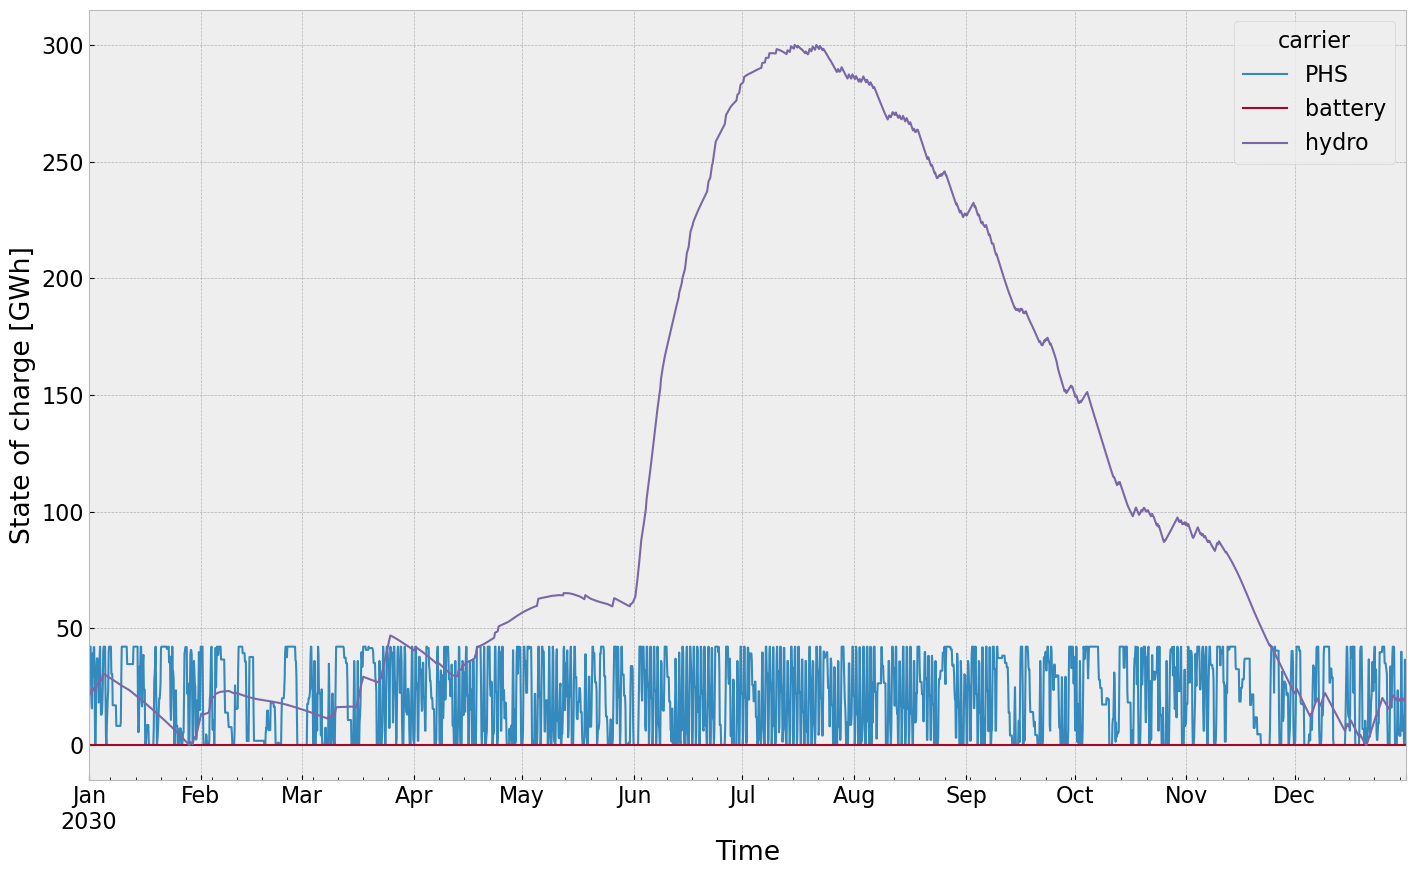

In [39]:
state_of_charge_plot(n)

## Electricity Price

In [40]:
def price_dur_curve_plot(n):

    #buses without store
    columns_to_keep =[]

    for i in n.buses_t.marginal_price.columns.tolist():
        if not i.endswith('H2'):
            columns_to_keep.append(i)
    
    price_dur_curve = pd.DataFrame()
    for region in columns_to_keep:
        price_dur_curve[region] = n.buses_t.marginal_price[region].sort_values(ascending=False).reset_index(drop=True)

    plt.rcParams.update({'font.size': 16})

    fig, ax = plt.subplots(figsize=(17,10))

    price_dur_curve.plot(ax=ax,
                    grid=True,
                    ylabel="Marginal price [€/MWh]",
                    xlabel="Time steps",
                    #title=f"Duration curves of the marginal price in the Italian regions in {year}",
                    linewidth=3,
)

plt.show()

In [41]:
columns_to_keep =[]

for i in n.buses_t.marginal_price.columns.tolist():
    if not i.endswith('H2'):
        columns_to_keep.append(i)
    


#buses without store
columns_to_keep =[]

price_dur_curve = pd.DataFrame()
for region in columns_to_keep:
    price_dur_curve[region] = n.buses_t.marginal_price[region].sort_values(ascending=False).reset_index(drop=True)


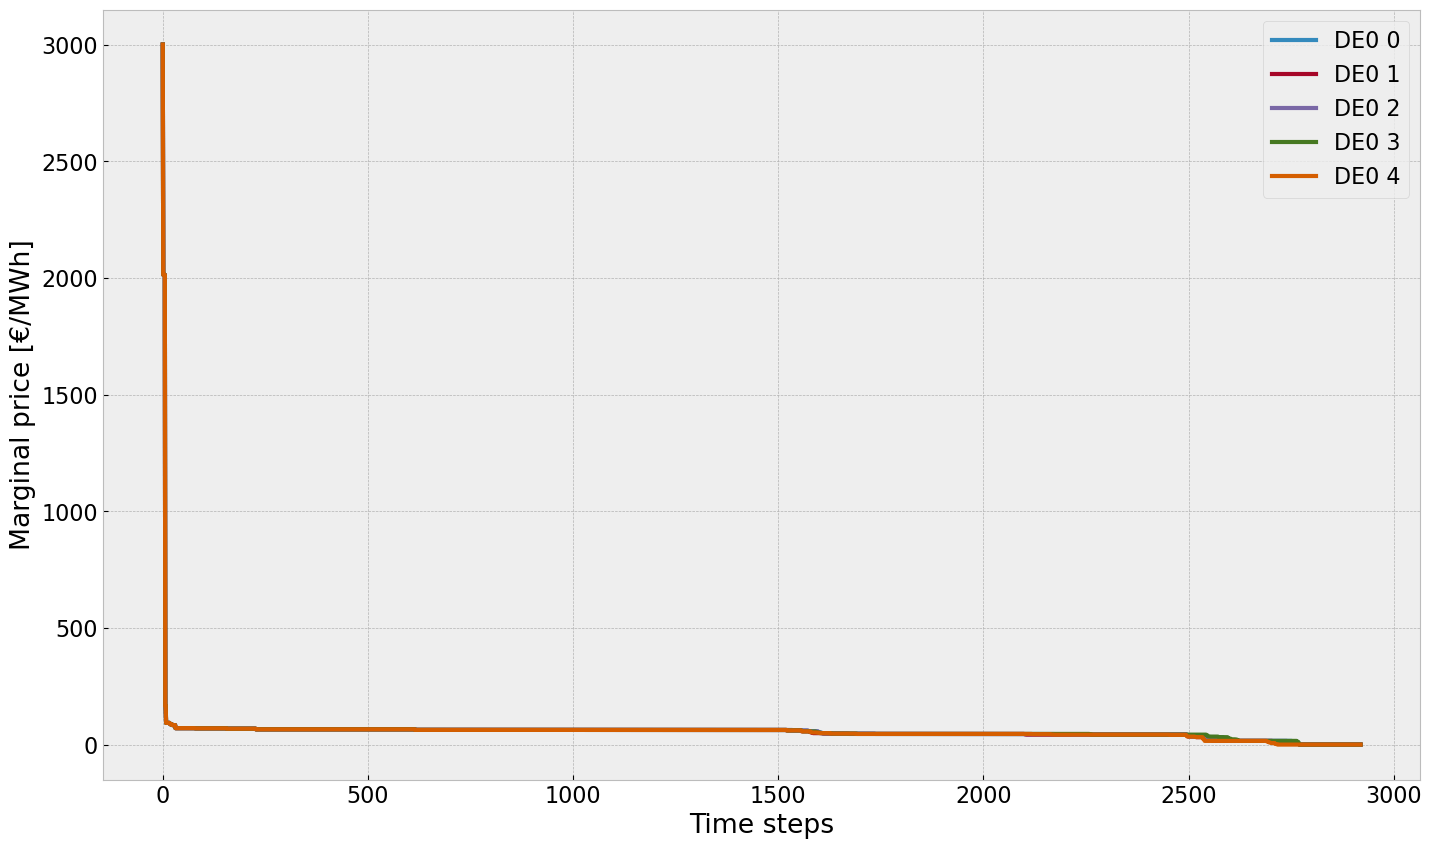

In [42]:
price_dur_curve_plot(n)

In [43]:
def price_regions_table(n):

    plt.rcParams.update({'font.size': 16})

    fig, ax = plt.subplots(figsize=(17,10))

    
    region = n.buses_t.marginal_price.mean()
    #for index, value in region.items():
    #    if index.endswith('H2'):
     #       region = region.drop(index)
    
    region.plot.bar(ax=ax,
                    grid=True,
                    ylabel="Marginal price [€/MWh]",
                    xlabel="Region",
                    title=f"Average marginal price",
                    linewidth=3,
    
    )

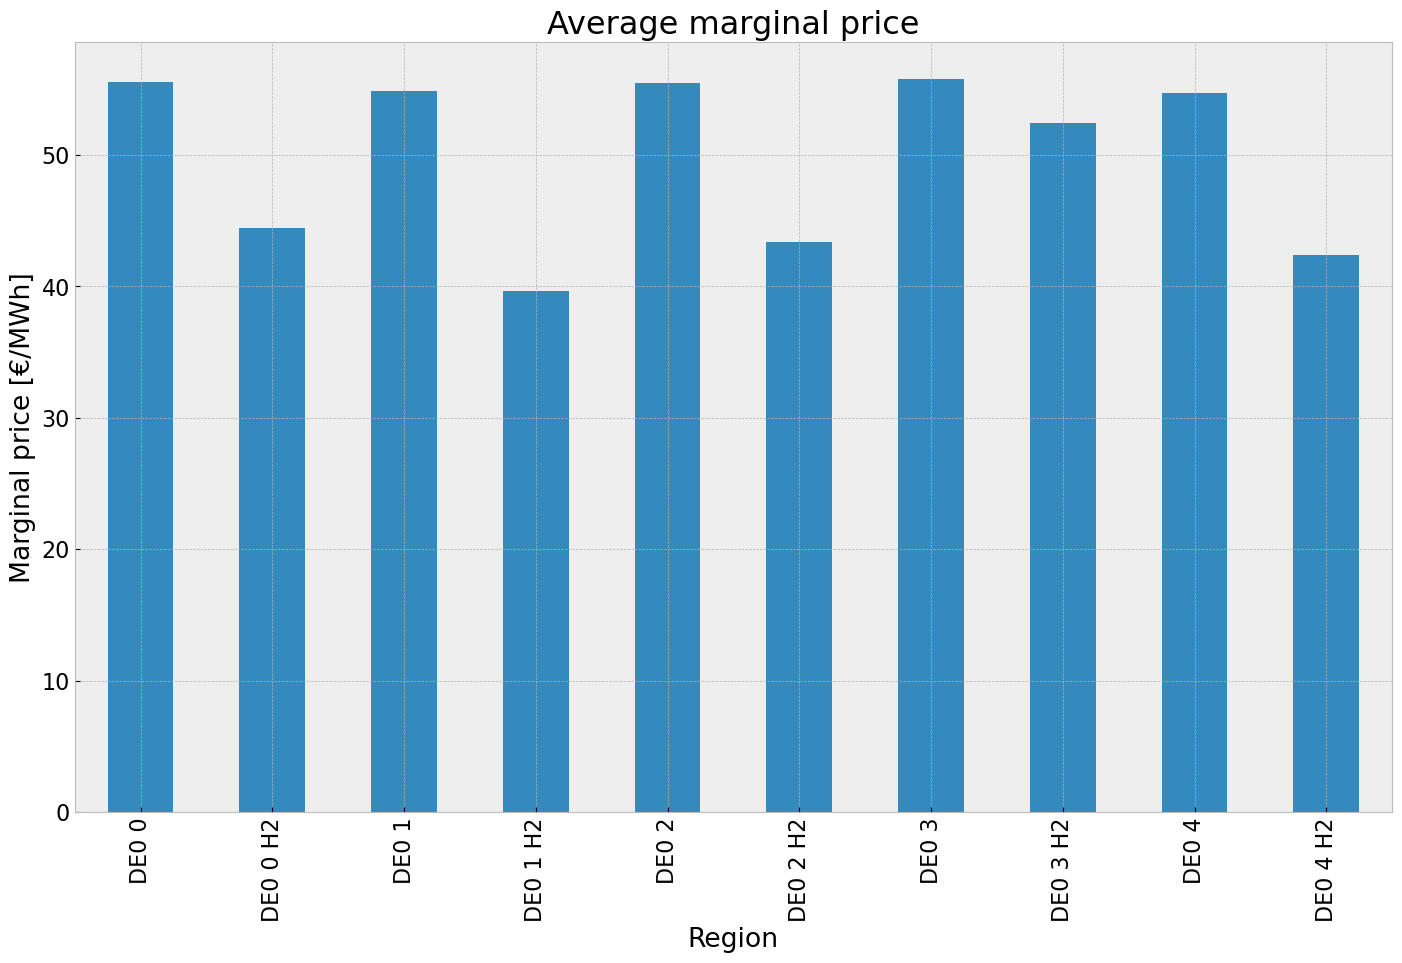

In [44]:
price_regions_table(n)

In [45]:
def price_regions(n):
    # Assuming 'n.buses_t.marginal_price' returns a DataFrame or similar structure with 'mean()' method
    mean_p = n.buses_t.marginal_price.mean()

    hprice = mean_p.filter(like='H2')
    eprice = mean_p.drop(hprice.index)

    # Setup figure and subplots with 1 row and 2 columns
    fig, axs = plt.subplots(1, 2, subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(16, 8))
    
    # Plot for hprice
    hprice_plot = axs[0].hexbin(
        n.buses.x.filter(like='H2'),  # Assuming n.buses.x and n.buses.y hold the coordinates
        n.buses.y.filter(like='H2'),
        gridsize=20,
        C=hprice,
        cmap=plt.cm.jet,
        zorder=3,
    )
    n.plot(ax=axs[0], line_widths=pd.Series(0.5, n.lines.index), bus_sizes=0)  # Plot network on the first subplot
    cb = fig.colorbar(hprice_plot, ax=axs[0], location="bottom")
    cb.set_label("Mean H2 Marginal Price (EUR/MWh) for H2")

    # Plot for eprice
    eprice_plot = axs[1].hexbin(
        n.buses.x[~n.buses.x.index.str.contains('H2')],
        n.buses.y[~n.buses.x.index.str.contains('H2')],
        gridsize=20,
        C=eprice,
        cmap=plt.cm.jet,
        zorder=3,
    )
    n.plot(ax=axs[1], line_widths=pd.Series(0.5, n.lines.index), bus_sizes=0)  # Plot network on the second subplot
    cb = fig.colorbar(eprice_plot, ax=axs[1], location="bottom")
    cb.set_label("Mean Electricity Marginal Price (EUR/MWh)")

    fig.tight_layout()

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


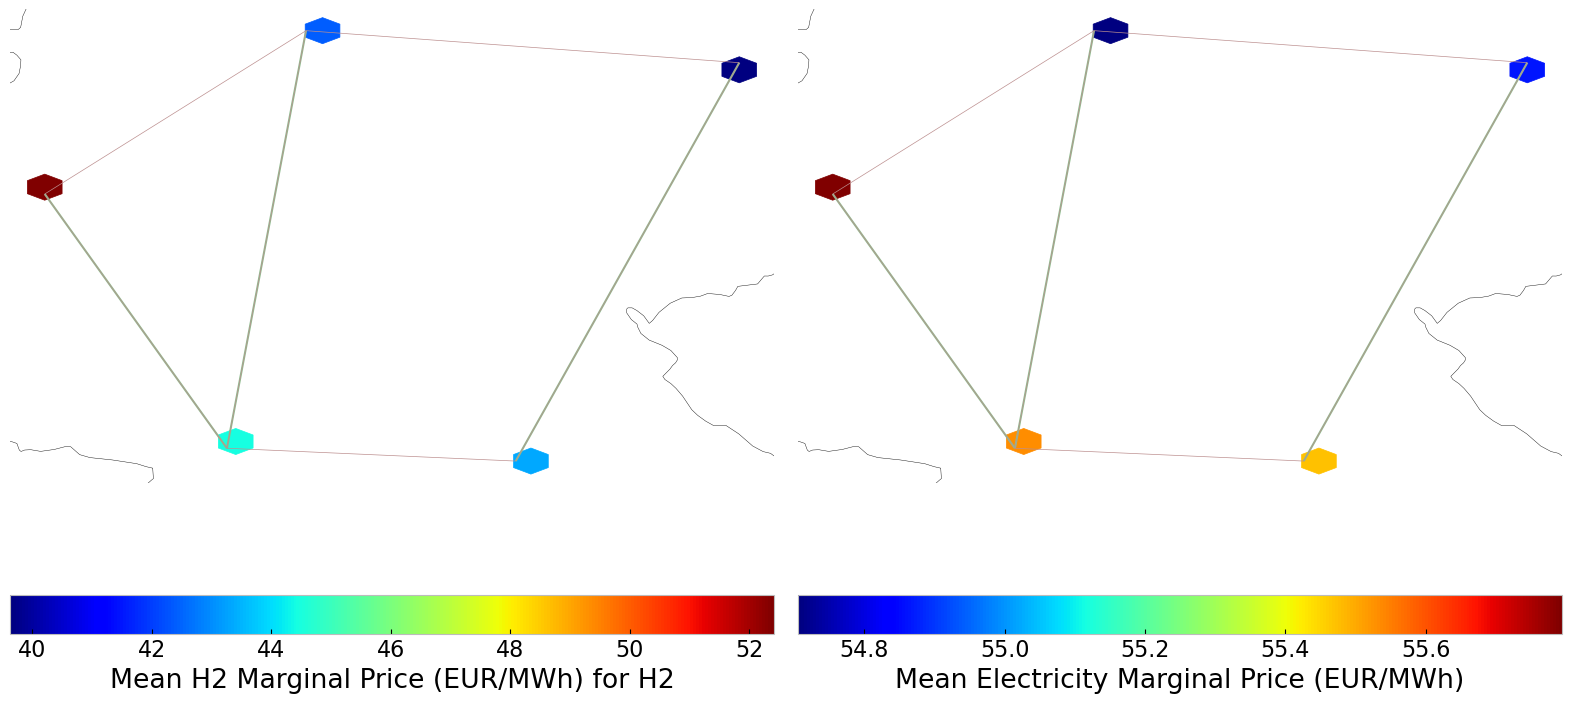

In [46]:
price_regions(n)

## Emission

In [47]:
def em_table(n):
    carrier = n.generators.carrier.unique()
    df_tot_generation = n.generators_t.p.sum()

    generations = pd.Series(index = n.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().index)

    for r in region:
        for tech in carrier:
            key = f"{r} {tech}"
            if key in df_tot_generation.index:
                try:
                    generations.loc[r, tech] = df_tot_generation[key]
                    #print(generations.loc[r, tech])
                except KeyError:
                    print('error')
    generations.fillna(0, inplace=True)

    generations = (generations.unstack())#MWh

    #mean efficiency of each carrier
    eff = n.generators.groupby('carrier').efficiency.mean()

    e = generations.sum()
    emission = []

    for index in e.index:
        for index_c in n.carriers.index:
            for index_eff in eff.index:
                if index == index_c == index_eff:
                    em = n.carriers.loc[index_c,"co2_emissions"]
                    emission.append(em)

    df = e.to_frame()
    df.rename(columns={0: 'Generation in MWh'}, inplace=True)
    df['efficiency'] = eff
    df['emissions in Tonnes CO2/MWh'] = emission
    df['emissions in Tonnes CO2']= df['Generation in MWh']/df['efficiency']*df['emissions in Tonnes CO2/MWh']
    df['emissions in Tonnes CO2'].sum() 
    return df

em_base =em_table(n)
em_base

Generation in MWh  efficiency  emissions in Tonnes CO2/MWh  \
carrier                                                                  
CCGT             0.000000e+00    0.580000                       0.1980   
OCGT             9.867183e+06    0.499437                       0.1980   
biomass          2.128740e+07    0.468000                       0.0000   
coal             9.354981e+06    0.329632                       0.3361   
geothermal       0.000000e+00    1.000000                       0.1200   
lignite          4.488131e+07    0.358368                       0.4069   
load             4.852068e+02    1.000000                       0.0000   
nuclear          0.000000e+00    0.328400                       0.0000   
offwind-ac       2.567539e+06    1.000000                       0.0000   
offwind-dc       2.985549e+06    1.000000                       0.0000   
oil              5.717234e+03    0.368808                       0.2571   
onwind           4.268259e+07    1.000000                       0.0000   
ror              5.951822e+06    0.900000                       0.0000   
solar            3.031600e+07    1.000000                       0.0000   

            emissions in Tonnes CO2  
carrier                              
CCGT                   0.000000e+00  
OCGT                   3.911810e+06  
biomass                0.000000e+00  
coal                   9.538540e+06  
geothermal             0.000000e+00  
lignite                5.095943e+07  
load                   0.000000e+00  
nuclear                0.000000e+00  
offwind-ac             0.000000e+00  
offwind-dc             0.000000e+00  
oil                    3.985546e+03  
onwind                 0.000000e+00  
ror                    0.000000e+00  
solar                  0.000000e+00

# Offwind Cut Scenario
Cut start: 01.01.2013
reduction on capacity: 50%, source:
duration : 9 months

In [48]:
#copy network
n1=n.copy()

#p_max_pu of offwind generators across all regions are subtracted by 10% from 01.06.2013 to 31.12.13
cut_start=pd.to_datetime('2013-01-01 00:00:00')
cut_end = pd.to_datetime('2013-12-31 00:00:00')

for column in n1.generators_t.p_max_pu.columns:
        if column.endswith('offwind-ac') or column.endswith('offwind-dc'):
                for index,row in n1.generators_t.p_max_pu[column].items():
                        if index >= cut_start and index < cut_end:
                                new_p_max_pu = n1.generators_t.p_max_pu.at[index, column] * 0.0 #0.9
                                n1.generators_t.p_max_pu.at[index, column] = new_p_max_pu
                                if new_p_max_pu<0:
                                    n1.generators_t.p_max_pu.at[index, column] = 0


#set the optimal capacity of generators from the base scenario as the new minimum capacity 
for index, value in n1.generators.p_nom_extendable.items():
    if value:  
        n1.generators.at[index, 'p_nom_min'] = n.generators.at[index, 'p_nom_opt']


#set the optimal capacity of storage units from the base scenario as the new minimum capacity 
for index, value in n1.storage_units.p_nom_extendable.items():
    if value:  
        n1.storage_units.at[index, 'p_nom_min'] = n.storage_units.at[index, 'p_nom_opt']

#set the optimal capacity of lines from the base scenario as the new minimum capacity 
for index, value in n1.lines.s_nom_extendable.items():
    if value:  
        n1.lines.at[index, 's_nom_min'] = n.lines.at[index, 's_nom_opt']

                        

## 1. Scenario: allow additional investment of extendable generators and storage

In [49]:
n1.optimize.create_model()


Index(['DE0 1 offwind-dc', 'DE0 3 offwind-ac'], dtype='object', name='Generator')


Linopy LP model

Variables:
----------
 * Generator-p_nom (Generator-ext)
 * Line-s_nom (Line-ext)
 * Link-p_nom (Link-ext)
 * Store-e_nom (Store-ext)
 * StorageUnit-p_nom (StorageUnit-ext)
 * Generator-p (snapshot, Generator)
 * Line-s (snapshot, Line)
 * Link-p (snapshot, Link)
 * Store-e (snapshot, Store)
 * StorageUnit-p_dispatch (snapshot, StorageUnit)
 * StorageUnit-p_store (snapshot, StorageUnit)
 * StorageUnit-state_of_charge (snapshot, StorageUnit)
 * StorageUnit-spill (snapshot, StorageUnit)
 * Store-p (snapshot, Store)
 * objective_constant

Constraints:
------------
 * Generator-ext-p_nom-lower (Generator-ext)
 * Generator-ext-p_nom-upper (Generator-ext)
 * Line-ext-s_nom-lower (Line-ext)
 * Line-ext-s_nom-upper (Line-ext)
 * Link-ext-p_nom-lower (Link-ext)
 * Link-ext-p_nom-upper (Link-ext)
 * Store-ext-e_nom-lower (Store-ext)
 * Store-ext-e_nom-upper (Store-ext)
 * StorageUnit-ext-p_nom-lower (StorageUnit-ext)
 * StorageUnit-ext-p_nom-upper (StorageUnit-ext)
 * Generator-

In [50]:
#solve network

n1.optimize(solver_name='gurobi')

Index(['DE0 1 offwind-dc', 'DE0 3 offwind-ac'], dtype='object', name='Generator')


Index(['DE0 1 offwind-dc', 'DE0 3 offwind-ac'], dtype='object', name='Generator')
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 15/15 [00:01<00:00, 10.08it/s]
INFO:linopy.io: Writing time: 10.34s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-f29hufw0.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-f29hufw0.lp


Reading time = 2.98 seconds


INFO:gurobipy:Reading time = 2.98 seconds


obj: 849797 rows, 402989 columns, 1635451 nonzeros


INFO:gurobipy:obj: 849797 rows, 402989 columns, 1635451 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 849797 rows, 402989 columns and 1635451 nonzeros


INFO:gurobipy:Optimize a model with 849797 rows, 402989 columns and 1635451 nonzeros


Model fingerprint: 0x27029bbc


INFO:gurobipy:Model fingerprint: 0x27029bbc


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 2e+05]


INFO:gurobipy:  Objective range  [3e-02, 2e+05]


  Bounds range     [1e+01, 9e+09]


INFO:gurobipy:  Bounds range     [1e+01, 9e+09]


  RHS range        [7e+00, 1e+09]


INFO:gurobipy:  RHS range        [7e+00, 1e+09]


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 610198 rows and 105005 columns


INFO:gurobipy:Presolve removed 610198 rows and 105005 columns


Presolve time: 1.45s


INFO:gurobipy:Presolve time: 1.45s


Presolved: 239599 rows, 297984 columns, 914395 nonzeros


INFO:gurobipy:Presolved: 239599 rows, 297984 columns, 914395 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.38s


INFO:gurobipy:Ordering time: 0.38s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 44


INFO:gurobipy: Dense cols : 44


 AA' NZ     : 8.501e+05


INFO:gurobipy: AA' NZ     : 8.501e+05


 Factor NZ  : 4.175e+06 (roughly 250 MB of memory)


INFO:gurobipy: Factor NZ  : 4.175e+06 (roughly 250 MB of memory)


 Factor Ops : 2.280e+08 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.280e+08 (less than 1 second per iteration)


 Threads    : 3


INFO:gurobipy: Threads    : 3


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   3.09011103e+19 -1.33968624e+20  4.43e+13 2.06e+06  3.56e+15     3s


INFO:gurobipy:   0   3.09011103e+19 -1.33968624e+20  4.43e+13 2.06e+06  3.56e+15     3s


   1   2.57620384e+19 -4.22715037e+19  3.80e+13 5.59e+05  2.05e+15     3s


INFO:gurobipy:   1   2.57620384e+19 -4.22715037e+19  3.80e+13 5.59e+05  2.05e+15     3s


   2   2.06727747e+19 -2.78648107e+19  3.01e+13 2.84e+05  1.50e+15     3s


INFO:gurobipy:   2   2.06727747e+19 -2.78648107e+19  3.01e+13 2.84e+05  1.50e+15     3s


   3   9.16851677e+18 -1.30764249e+19  1.24e+13 4.32e+04  6.10e+14     4s


INFO:gurobipy:   3   9.16851677e+18 -1.30764249e+19  1.24e+13 4.32e+04  6.10e+14     4s


   4   4.84736429e+18 -4.28872326e+18  6.48e+12 9.66e+03  3.08e+14     4s


INFO:gurobipy:   4   4.84736429e+18 -4.28872326e+18  6.48e+12 9.66e+03  3.08e+14     4s


   5   9.79069217e+17 -1.58493052e+18  1.18e+12 2.11e+03  5.79e+13     4s


INFO:gurobipy:   5   9.79069217e+17 -1.58493052e+18  1.18e+12 2.11e+03  5.79e+13     4s


   6   3.11503464e+17 -4.28720012e+17  2.69e+11 3.72e+02  1.34e+13     5s


INFO:gurobipy:   6   3.11503464e+17 -4.28720012e+17  2.69e+11 3.72e+02  1.34e+13     5s


   7   8.75489054e+16 -7.97212871e+16  7.47e+09 2.60e+01  6.08e+11     5s


INFO:gurobipy:   7   8.75489054e+16 -7.97212871e+16  7.47e+09 2.60e+01  6.08e+11     5s


   8   2.26545581e+16 -1.13912010e+16  7.62e+08 4.25e+00  8.74e+10     5s


INFO:gurobipy:   8   2.26545581e+16 -1.13912010e+16  7.62e+08 4.25e+00  8.74e+10     5s


   9   5.62615823e+15 -3.32824757e+15  1.72e+08 4.26e-01  2.03e+10     6s


INFO:gurobipy:   9   5.62615823e+15 -3.32824757e+15  1.72e+08 4.26e-01  2.03e+10     6s


  10   1.71128009e+15 -1.12946784e+15  6.17e+07 1.87e-02  6.05e+09     6s


INFO:gurobipy:  10   1.71128009e+15 -1.12946784e+15  6.17e+07 1.87e-02  6.05e+09     6s


  11   5.46745752e+14 -2.24766039e+14  1.93e+07 9.35e-04  1.47e+09     6s


INFO:gurobipy:  11   5.46745752e+14 -2.24766039e+14  1.93e+07 9.35e-04  1.47e+09     6s


  12   1.82261991e+13 -9.87928715e+13  5.59e+05 3.05e-04  1.91e+08     7s


INFO:gurobipy:  12   1.82261991e+13 -9.87928715e+13  5.59e+05 3.05e-04  1.91e+08     7s


  13   6.98827044e+12 -2.30409591e+13  1.47e+05 5.76e-05  4.81e+07     7s


INFO:gurobipy:  13   6.98827044e+12 -2.30409591e+13  1.47e+05 5.76e-05  4.81e+07     7s


  14   2.70125060e+12 -7.99210303e+12  4.89e+04 1.97e-05  1.71e+07     7s


INFO:gurobipy:  14   2.70125060e+12 -7.99210303e+12  4.89e+04 1.97e-05  1.71e+07     7s


  15   1.04153074e+12 -2.23021332e+12  1.16e+04 5.02e-06  5.21e+06     8s


INFO:gurobipy:  15   1.04153074e+12 -2.23021332e+12  1.16e+04 5.02e-06  5.21e+06     8s


  16   5.09952731e+11 -1.82015838e+12  2.49e+02 4.09e-06  3.71e+06     8s


INFO:gurobipy:  16   5.09952731e+11 -1.82015838e+12  2.49e+02 4.09e-06  3.71e+06     8s


  17   2.46502571e+11 -1.08633186e+12  3.32e-01 2.40e-06  2.12e+06     8s


INFO:gurobipy:  17   2.46502571e+11 -1.08633186e+12  3.32e-01 2.40e-06  2.12e+06     8s


  18   1.04687089e+11 -3.52399157e+11  9.07e-02 7.04e-07  7.28e+05     9s


INFO:gurobipy:  18   1.04687089e+11 -3.52399157e+11  9.07e-02 7.04e-07  7.28e+05     9s


  19   8.65676964e+10 -1.78919165e+11  6.98e-02 3.77e-07  4.23e+05     9s


INFO:gurobipy:  19   8.65676964e+10 -1.78919165e+11  6.98e-02 3.77e-07  4.23e+05     9s


  20   5.18735963e+10 -5.64929704e+10  3.57e-02 1.24e-07  1.72e+05     9s


INFO:gurobipy:  20   5.18735963e+10 -5.64929704e+10  3.57e-02 1.24e-07  1.72e+05     9s


  21   4.63210715e+10 -4.16657022e+10  3.02e-02 9.73e-08  1.40e+05    10s


INFO:gurobipy:  21   4.63210715e+10 -4.16657022e+10  3.02e-02 9.73e-08  1.40e+05    10s


  22   3.98808213e+10 -3.09501330e+10  2.43e-02 7.77e-08  1.13e+05    10s


INFO:gurobipy:  22   3.98808213e+10 -3.09501330e+10  2.43e-02 7.77e-08  1.13e+05    10s


  23   2.84808215e+10 -2.42478116e+09  1.45e-02 2.09e-08  4.92e+04    11s


INFO:gurobipy:  23   2.84808215e+10 -2.42478116e+09  1.45e-02 2.09e-08  4.92e+04    11s


  24   2.53642900e+10  5.00448029e+09  1.21e-02 6.86e-09  3.24e+04    11s


INFO:gurobipy:  24   2.53642900e+10  5.00448029e+09  1.21e-02 6.86e-09  3.24e+04    11s


  25   1.92822158e+10  7.59926265e+09  7.30e-03 2.59e-09  1.86e+04    11s


INFO:gurobipy:  25   1.92822158e+10  7.59926265e+09  7.30e-03 2.59e-09  1.86e+04    11s


  26   1.75559505e+10  8.24479122e+09  5.83e-03 1.80e-09  1.48e+04    12s


INFO:gurobipy:  26   1.75559505e+10  8.24479122e+09  5.83e-03 1.80e-09  1.48e+04    12s


  27   1.70546128e+10  8.50259029e+09  5.41e-03 1.47e-09  1.36e+04    12s


INFO:gurobipy:  27   1.70546128e+10  8.50259029e+09  5.41e-03 1.47e-09  1.36e+04    12s


  28   1.41770209e+10  9.00465832e+09  3.29e-03 8.43e-10  8.23e+03    12s


INFO:gurobipy:  28   1.41770209e+10  9.00465832e+09  3.29e-03 8.43e-10  8.23e+03    12s


  29   1.29461211e+10  9.33179877e+09  2.39e-03 8.66e-10  5.75e+03    13s


INFO:gurobipy:  29   1.29461211e+10  9.33179877e+09  2.39e-03 8.66e-10  5.75e+03    13s


  30   1.20359778e+10  9.53935524e+09  1.74e-03 9.38e-10  3.97e+03    13s


INFO:gurobipy:  30   1.20359778e+10  9.53935524e+09  1.74e-03 9.38e-10  3.97e+03    13s


  31   1.09840993e+10  9.58022304e+09  9.84e-04 1.01e-09  2.23e+03    13s


INFO:gurobipy:  31   1.09840993e+10  9.58022304e+09  9.84e-04 1.01e-09  2.23e+03    13s


  32   1.06562381e+10  9.61348103e+09  7.27e-04 1.16e-09  1.66e+03    14s


INFO:gurobipy:  32   1.06562381e+10  9.61348103e+09  7.27e-04 1.16e-09  1.66e+03    14s


  33   1.05292541e+10  9.63302734e+09  6.30e-04 1.01e-09  1.43e+03    14s


INFO:gurobipy:  33   1.05292541e+10  9.63302734e+09  6.30e-04 1.01e-09  1.43e+03    14s


  34   1.04134526e+10  9.63655711e+09  5.41e-04 1.03e-09  1.24e+03    14s


INFO:gurobipy:  34   1.04134526e+10  9.63655711e+09  5.41e-04 1.03e-09  1.24e+03    14s


  35   1.02810902e+10  9.65368909e+09  4.37e-04 8.64e-10  9.99e+02    15s


INFO:gurobipy:  35   1.02810902e+10  9.65368909e+09  4.37e-04 8.64e-10  9.99e+02    15s


  36   1.01441559e+10  9.66403483e+09  3.38e-04 8.56e-10  7.64e+02    15s


INFO:gurobipy:  36   1.01441559e+10  9.66403483e+09  3.38e-04 8.56e-10  7.64e+02    15s


  37   1.01108150e+10  9.67027141e+09  3.14e-04 8.70e-10  7.01e+02    16s


INFO:gurobipy:  37   1.01108150e+10  9.67027141e+09  3.14e-04 8.70e-10  7.01e+02    16s


  38   1.00243990e+10  9.68082193e+09  2.55e-04 9.12e-10  5.47e+02    16s


INFO:gurobipy:  38   1.00243990e+10  9.68082193e+09  2.55e-04 9.12e-10  5.47e+02    16s


  39   1.00165121e+10  9.68510937e+09  2.48e-04 9.57e-10  5.28e+02    16s


INFO:gurobipy:  39   1.00165121e+10  9.68510937e+09  2.48e-04 9.57e-10  5.28e+02    16s


  40   9.98434318e+09  9.69108140e+09  2.22e-04 8.89e-10  4.67e+02    17s


INFO:gurobipy:  40   9.98434318e+09  9.69108140e+09  2.22e-04 8.89e-10  4.67e+02    17s


  41   9.96627503e+09  9.69477170e+09  4.11e-04 9.40e-10  4.32e+02    17s


INFO:gurobipy:  41   9.96627503e+09  9.69477170e+09  4.11e-04 9.40e-10  4.32e+02    17s


  42   9.92099493e+09  9.69946057e+09  7.05e-04 9.20e-10  3.53e+02    18s


INFO:gurobipy:  42   9.92099493e+09  9.69946057e+09  7.05e-04 9.20e-10  3.53e+02    18s


  43   9.89117377e+09  9.70161489e+09  7.46e-04 1.00e-09  3.02e+02    18s


INFO:gurobipy:  43   9.89117377e+09  9.70161489e+09  7.46e-04 1.00e-09  3.02e+02    18s


  44   9.87956179e+09  9.70716153e+09  6.99e-04 9.20e-10  2.74e+02    19s


INFO:gurobipy:  44   9.87956179e+09  9.70716153e+09  6.99e-04 9.20e-10  2.74e+02    19s


  45   9.86512129e+09  9.70959709e+09  6.07e-04 9.76e-10  2.48e+02    19s


INFO:gurobipy:  45   9.86512129e+09  9.70959709e+09  6.07e-04 9.76e-10  2.48e+02    19s


  46   9.81073736e+09  9.71090079e+09  5.91e-04 1.20e-09  1.59e+02    20s


INFO:gurobipy:  46   9.81073736e+09  9.71090079e+09  5.91e-04 1.20e-09  1.59e+02    20s


  47   9.78279206e+09  9.71160073e+09  4.91e-04 9.80e-10  1.13e+02    20s


INFO:gurobipy:  47   9.78279206e+09  9.71160073e+09  4.91e-04 9.80e-10  1.13e+02    20s


  48   9.77811553e+09  9.71234800e+09  4.59e-04 9.82e-10  1.05e+02    21s


INFO:gurobipy:  48   9.77811553e+09  9.71234800e+09  4.59e-04 9.82e-10  1.05e+02    21s


  49   9.76919687e+09  9.71298688e+09  4.14e-04 9.83e-10  8.95e+01    21s


INFO:gurobipy:  49   9.76919687e+09  9.71298688e+09  4.14e-04 9.83e-10  8.95e+01    21s


  50   9.74477282e+09  9.71423532e+09  2.89e-04 7.93e-10  4.86e+01    22s


INFO:gurobipy:  50   9.74477282e+09  9.71423532e+09  2.89e-04 7.93e-10  4.86e+01    22s


  51   9.73735352e+09  9.71576543e+09  1.77e-04 8.46e-10  3.44e+01    22s


INFO:gurobipy:  51   9.73735352e+09  9.71576543e+09  1.77e-04 8.46e-10  3.44e+01    22s


  52   9.73012515e+09  9.71667281e+09  1.17e-04 8.20e-10  2.14e+01    23s


INFO:gurobipy:  52   9.73012515e+09  9.71667281e+09  1.17e-04 8.20e-10  2.14e+01    23s


  53   9.72859227e+09  9.71685907e+09  1.64e-04 9.65e-10  1.87e+01    23s


INFO:gurobipy:  53   9.72859227e+09  9.71685907e+09  1.64e-04 9.65e-10  1.87e+01    23s


  54   9.72502576e+09  9.71702360e+09  1.13e-04 6.92e-10  1.27e+01    23s


INFO:gurobipy:  54   9.72502576e+09  9.71702360e+09  1.13e-04 6.92e-10  1.27e+01    23s


  55   9.72192807e+09  9.71718900e+09  6.49e-05 7.93e-10  7.54e+00    23s


INFO:gurobipy:  55   9.72192807e+09  9.71718900e+09  6.49e-05 7.93e-10  7.54e+00    23s


  56   9.71963607e+09  9.71737295e+09  4.85e-05 1.43e-09  3.60e+00    24s


INFO:gurobipy:  56   9.71963607e+09  9.71737295e+09  4.85e-05 1.43e-09  3.60e+00    24s


  57   9.71868915e+09  9.71744411e+09  2.03e-05 8.53e-10  1.98e+00    24s


INFO:gurobipy:  57   9.71868915e+09  9.71744411e+09  2.03e-05 8.53e-10  1.98e+00    24s


  58   9.71815586e+09  9.71749636e+09  2.61e-05 6.41e-10  1.05e+00    24s


INFO:gurobipy:  58   9.71815586e+09  9.71749636e+09  2.61e-05 6.41e-10  1.05e+00    24s


  59   9.71784965e+09  9.71751280e+09  2.13e-05 6.95e-10  5.36e-01    25s


INFO:gurobipy:  59   9.71784965e+09  9.71751280e+09  2.13e-05 6.95e-10  5.36e-01    25s


  60   9.71776937e+09  9.71751856e+09  1.56e-05 8.20e-10  3.99e-01    25s


INFO:gurobipy:  60   9.71776937e+09  9.71751856e+09  1.56e-05 8.20e-10  3.99e-01    25s


  61   9.71763149e+09  9.71753080e+09  1.86e-05 9.37e-10  1.60e-01    25s


INFO:gurobipy:  61   9.71763149e+09  9.71753080e+09  1.86e-05 9.37e-10  1.60e-01    25s


  62   9.71759660e+09  9.71753934e+09  1.09e-05 8.59e-10  9.11e-02    26s


INFO:gurobipy:  62   9.71759660e+09  9.71753934e+09  1.09e-05 8.59e-10  9.11e-02    26s


  63   9.71757210e+09  9.71754458e+09  5.78e-06 9.22e-10  4.38e-02    26s


INFO:gurobipy:  63   9.71757210e+09  9.71754458e+09  5.78e-06 9.22e-10  4.38e-02    26s


  64   9.71756417e+09  9.71754718e+09  3.73e-06 9.12e-10  2.70e-02    27s


INFO:gurobipy:  64   9.71756417e+09  9.71754718e+09  3.73e-06 9.12e-10  2.70e-02    27s


  65   9.71755543e+09  9.71754821e+09  1.61e-06 9.02e-10  1.15e-02    27s


INFO:gurobipy:  65   9.71755543e+09  9.71754821e+09  1.61e-06 9.02e-10  1.15e-02    27s


  66   9.71755336e+09  9.71754854e+09  1.21e-06 6.00e-10  7.67e-03    27s


INFO:gurobipy:  66   9.71755336e+09  9.71754854e+09  1.21e-06 6.00e-10  7.67e-03    27s


  67   9.71755097e+09  9.71754894e+09  5.57e-07 7.00e-10  3.23e-03    28s


INFO:gurobipy:  67   9.71755097e+09  9.71754894e+09  5.57e-07 7.00e-10  3.23e-03    28s


  68   9.71755008e+09  9.71754909e+09  2.71e-07 1.03e-09  1.57e-03    28s


INFO:gurobipy:  68   9.71755008e+09  9.71754909e+09  2.71e-07 1.03e-09  1.57e-03    28s


  69   9.71754930e+09  9.71754918e+09  3.40e-08 9.51e-10  1.99e-04    29s


INFO:gurobipy:  69   9.71754930e+09  9.71754918e+09  3.40e-08 9.51e-10  1.99e-04    29s


  70   9.71754920e+09  9.71754920e+09  3.77e-06 1.21e-09  2.08e-06    29s


INFO:gurobipy:  70   9.71754920e+09  9.71754920e+09  3.77e-06 1.21e-09  2.08e-06    29s


  71   9.71754920e+09  9.71754920e+09  2.15e-08 7.81e-09  1.96e-10    29s


INFO:gurobipy:  71   9.71754920e+09  9.71754920e+09  2.15e-08 7.81e-09  1.96e-10    29s


INFO:gurobipy:


Barrier solved model in 71 iterations and 29.43 seconds (10.64 work units)


INFO:gurobipy:Barrier solved model in 71 iterations and 29.43 seconds (10.64 work units)


Optimal objective 9.71754920e+09


INFO:gurobipy:Optimal objective 9.71754920e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


  129407 DPushes remaining with DInf 8.9077106e-02                30s


INFO:gurobipy:  129407 DPushes remaining with DInf 8.9077106e-02                30s


   21404 DPushes remaining with DInf 8.7149632e-02                30s


INFO:gurobipy:   21404 DPushes remaining with DInf 8.7149632e-02                30s


       0 DPushes remaining with DInf 8.0584662e-02                31s


INFO:gurobipy:       0 DPushes remaining with DInf 8.0584662e-02                31s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


    5204 PPushes remaining with PInf 5.4927569e-05                31s


INFO:gurobipy:    5204 PPushes remaining with PInf 5.4927569e-05                31s


       0 PPushes remaining with PInf 0.0000000e+00                34s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                34s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 8.9167887e-02     34s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 8.9167887e-02     34s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   73043    9.7175492e+09   0.000000e+00   8.916789e-02     34s


INFO:gurobipy:   73043    9.7175492e+09   0.000000e+00   8.916789e-02     34s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


   73236    9.7175492e+09   0.000000e+00   2.000000e-06     35s


INFO:gurobipy:   73236    9.7175492e+09   0.000000e+00   2.000000e-06     35s


Extra simplex iterations after uncrush: 1


INFO:gurobipy:Extra simplex iterations after uncrush: 1


   73237    9.7175492e+09   0.000000e+00   0.000000e+00     36s


INFO:gurobipy:   73237    9.7175492e+09   0.000000e+00   0.000000e+00     36s


INFO:gurobipy:


Solved in 73237 iterations and 35.51 seconds (14.49 work units)


INFO:gurobipy:Solved in 73237 iterations and 35.51 seconds (14.49 work units)


Optimal objective  9.717549196e+09


INFO:gurobipy:Optimal objective  9.717549196e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 402989 primals, 849797 duals
Objective: 9.72e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

('ok', 'optimal')

In [51]:
tot_cos_inv=n1.objective/1e9 # billion €
system_cost_inv = system_cost(n1) #million€/a
marg_price_region_inv = n1.buses_t.marginal_price.mean()
stat_inv = n1.statistics()

## Installed Capacity

<Figure size 640x480 with 0 Axes>

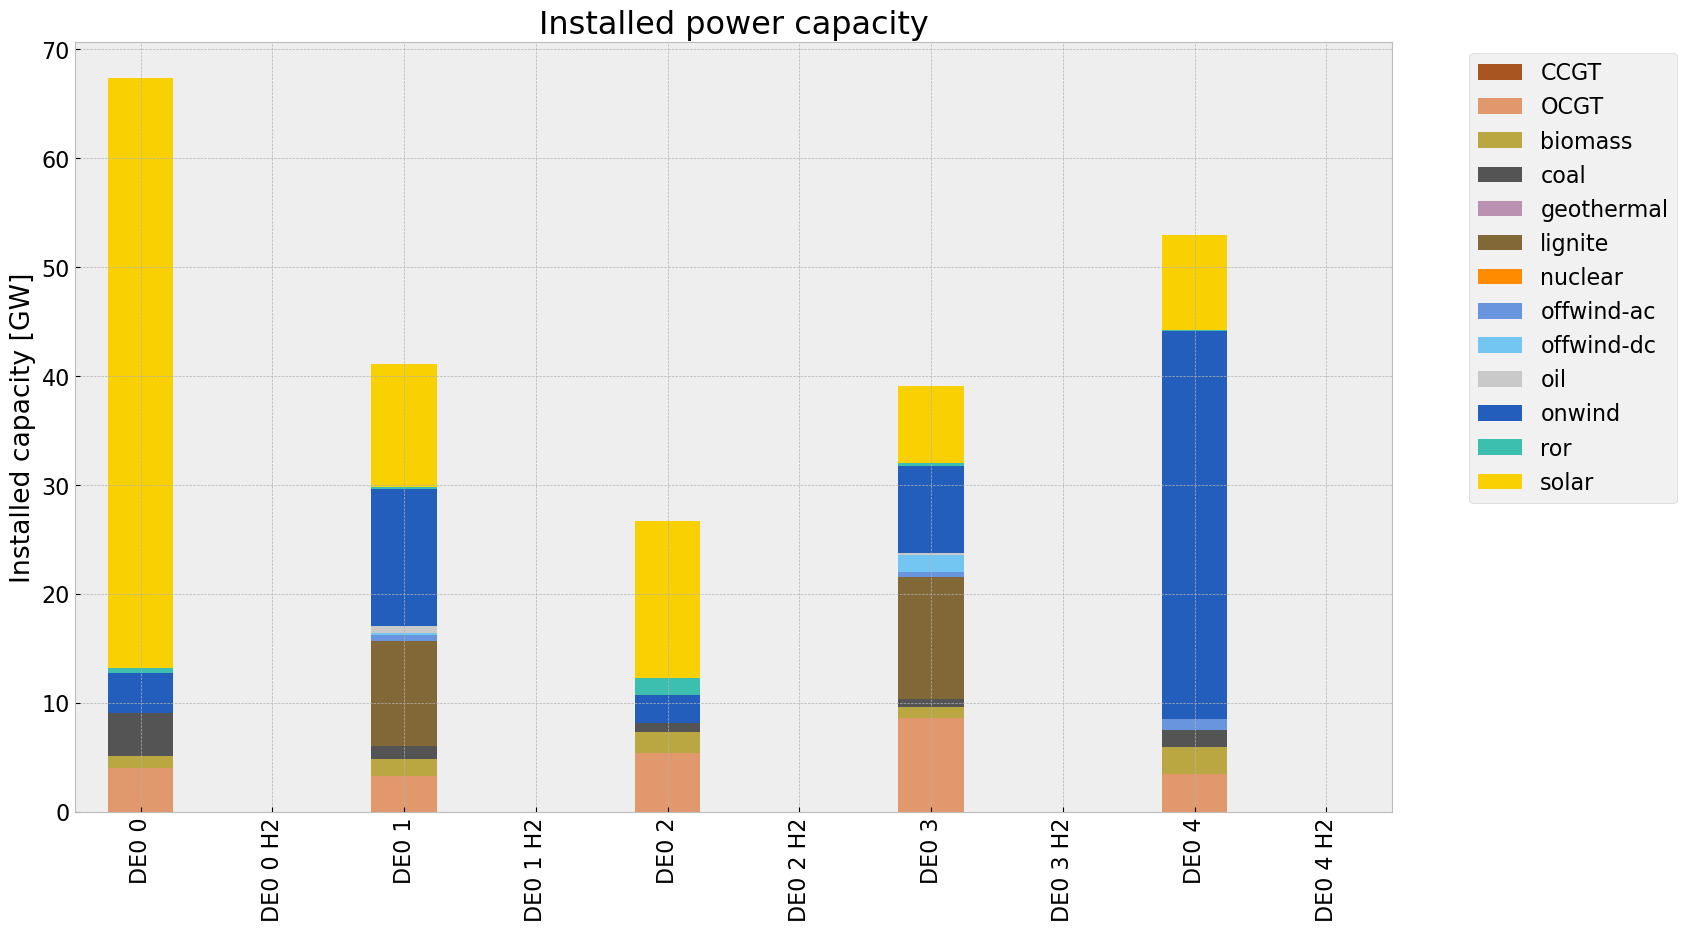

In [112]:
# consolidated istalled cap without load_shedding

capacities_inv = n1.generators.groupby(['bus', 'carrier']).p_nom_opt.sum()
capacities_inv.fillna(0, inplace=True)
gen_1 = (capacities_inv.unstack()/1000).drop(columns=['load'],inplace=False)


cap_inv = inst_cap_table(n1, color_cap)


## Generation

<Figure size 640x480 with 0 Axes>

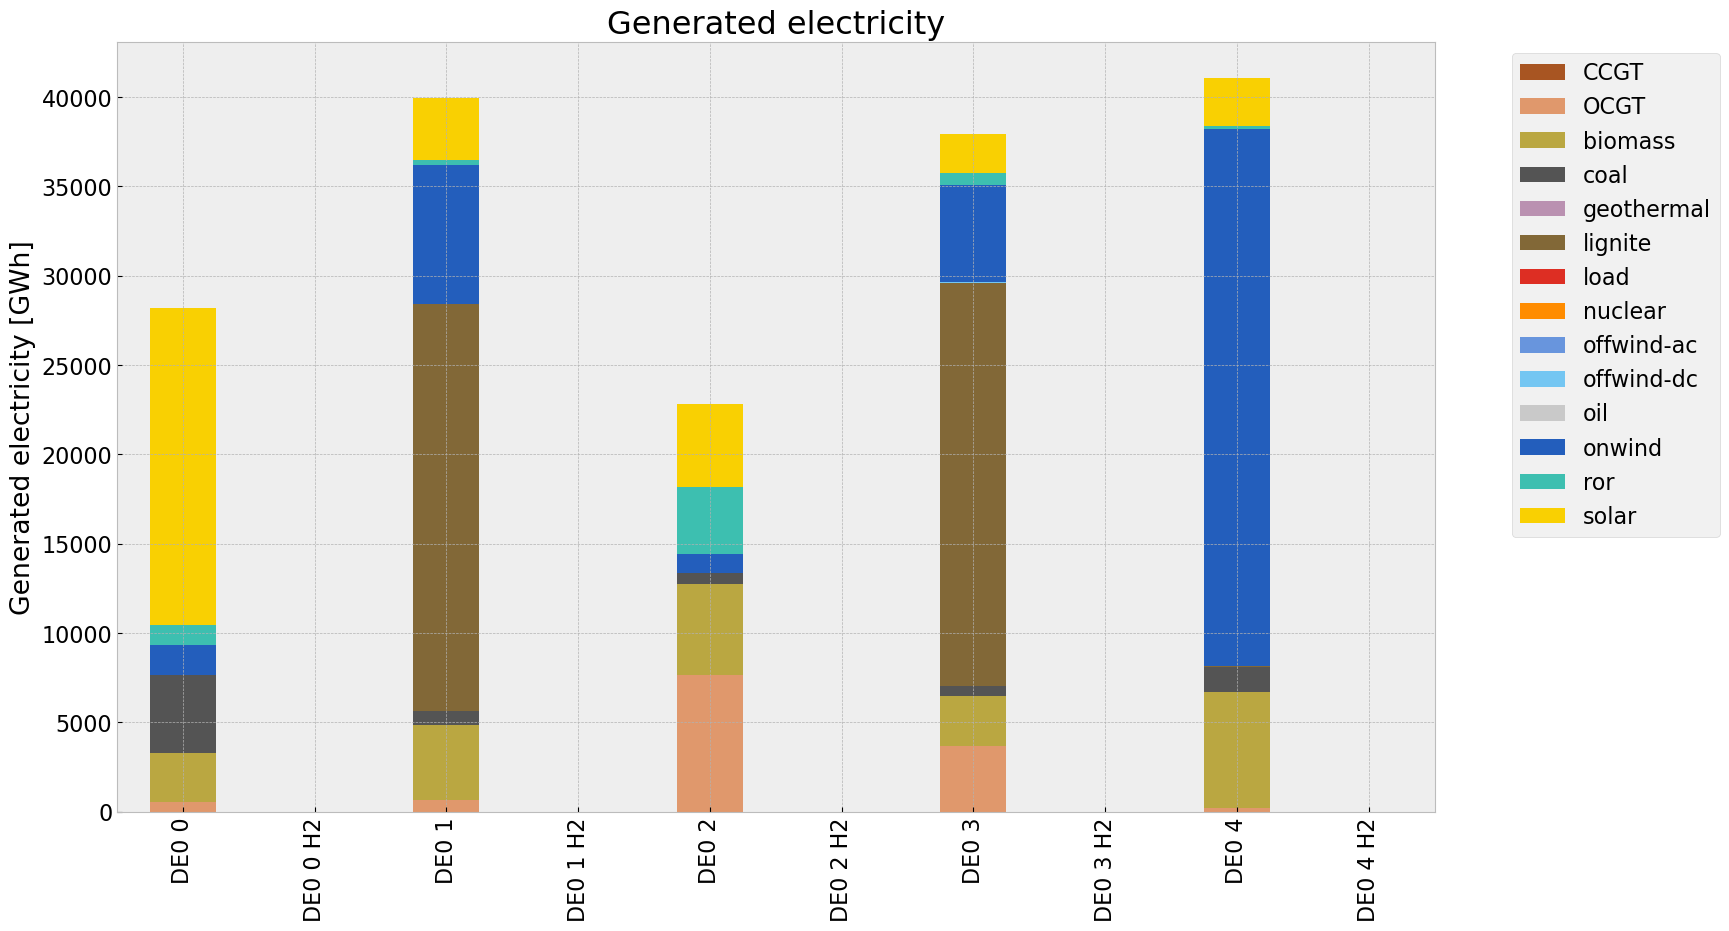

In [113]:
# consolidated generation table
carrier = n1.generators.carrier.unique()
df_tot_generation = n1.generators_t.p.sum()

generations = pd.Series(index = n1.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().index)

for r in region:
    for tech in carrier:
        key = f"{r} {tech}"
        if key in df_tot_generation.index:
            try:
                generations.loc[r, tech] = df_tot_generation[key]
                #print(generations.loc[r, tech])
            except KeyError:
                print('error')
                
generations.fillna(0, inplace=True)
gen_inv = generations.unstack()/1000#Gwh


gen_inv = gen_power_table(n1,colors_gen_table)



## Snapshot

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\1422613485.py:6: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\1422613485.py:10: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  links = n.links_t.p1.groupby(n.links.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\1422613485.py:16: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\1422613485.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  p_by_carrier.index = pd.date_range(start='2030-01-01', end=

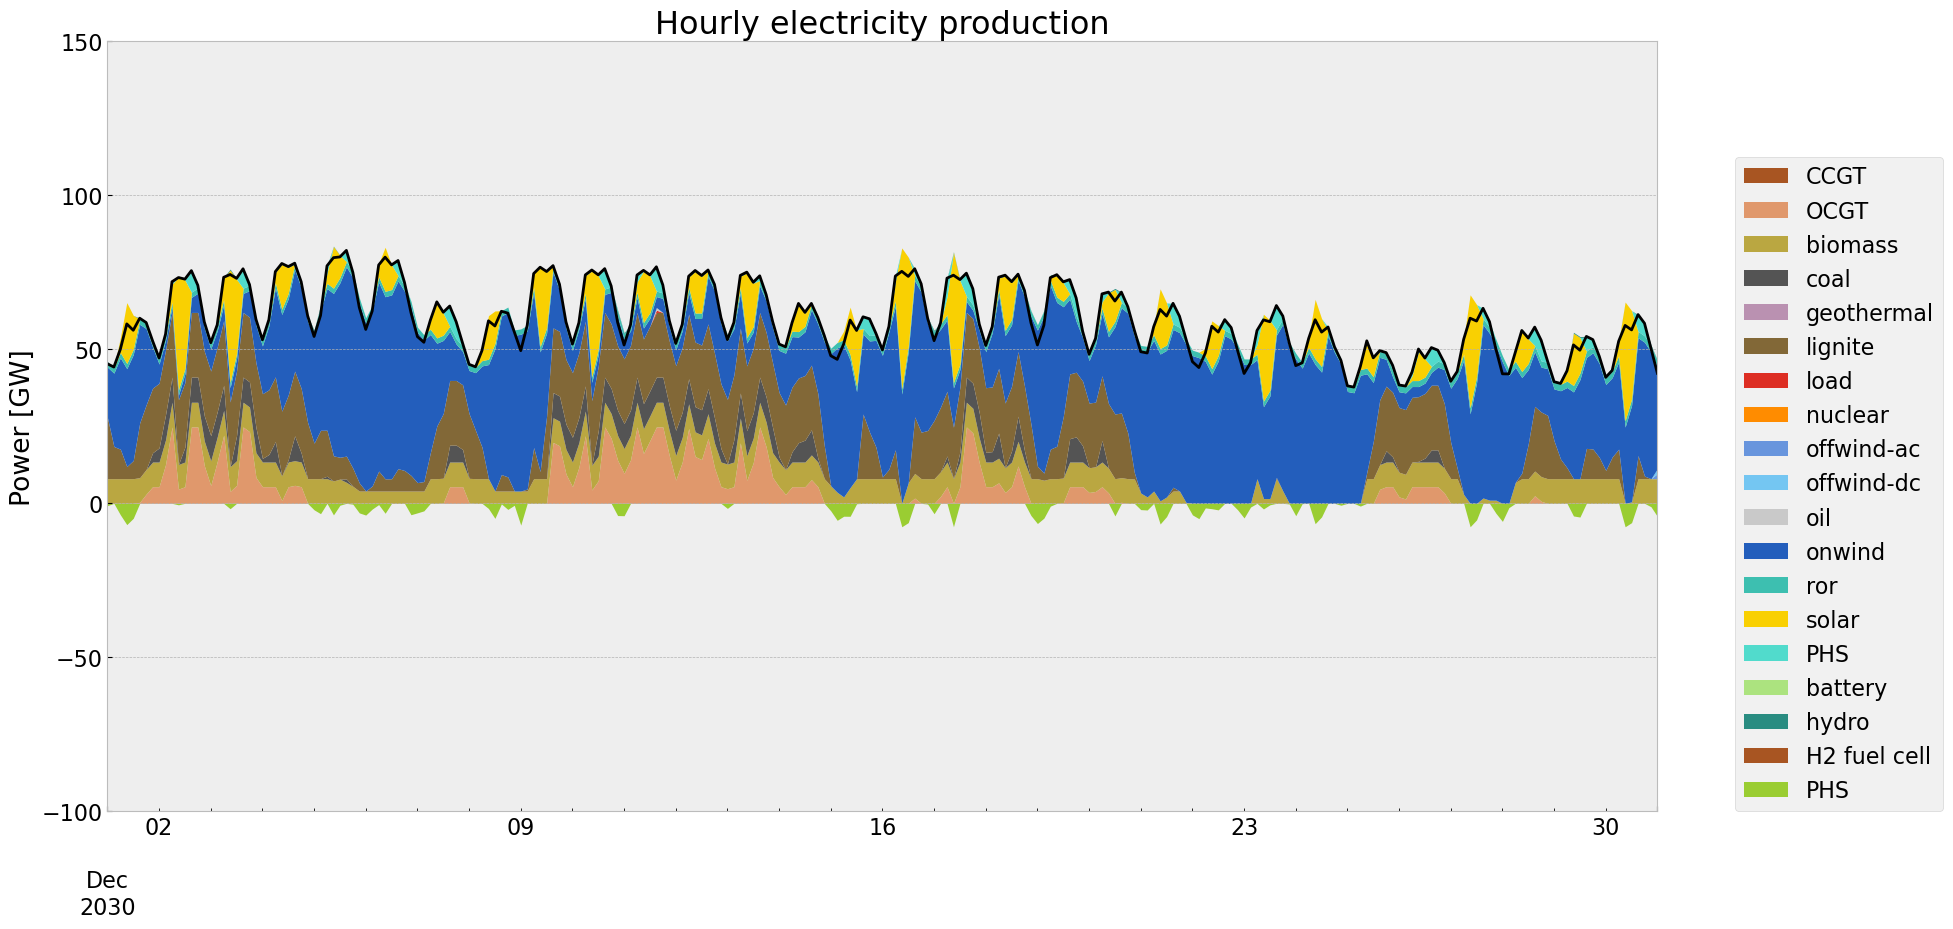

In [54]:
gen_curve(n1, '2030-12-01', '2030-12-31', colors_gen)

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\1422613485.py:6: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\1422613485.py:10: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  links = n.links_t.p1.groupby(n.links.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\1422613485.py:16: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sto = n.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\1422613485.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  p_by_carrier.index = pd.date_range(start='2030-01-01', end=

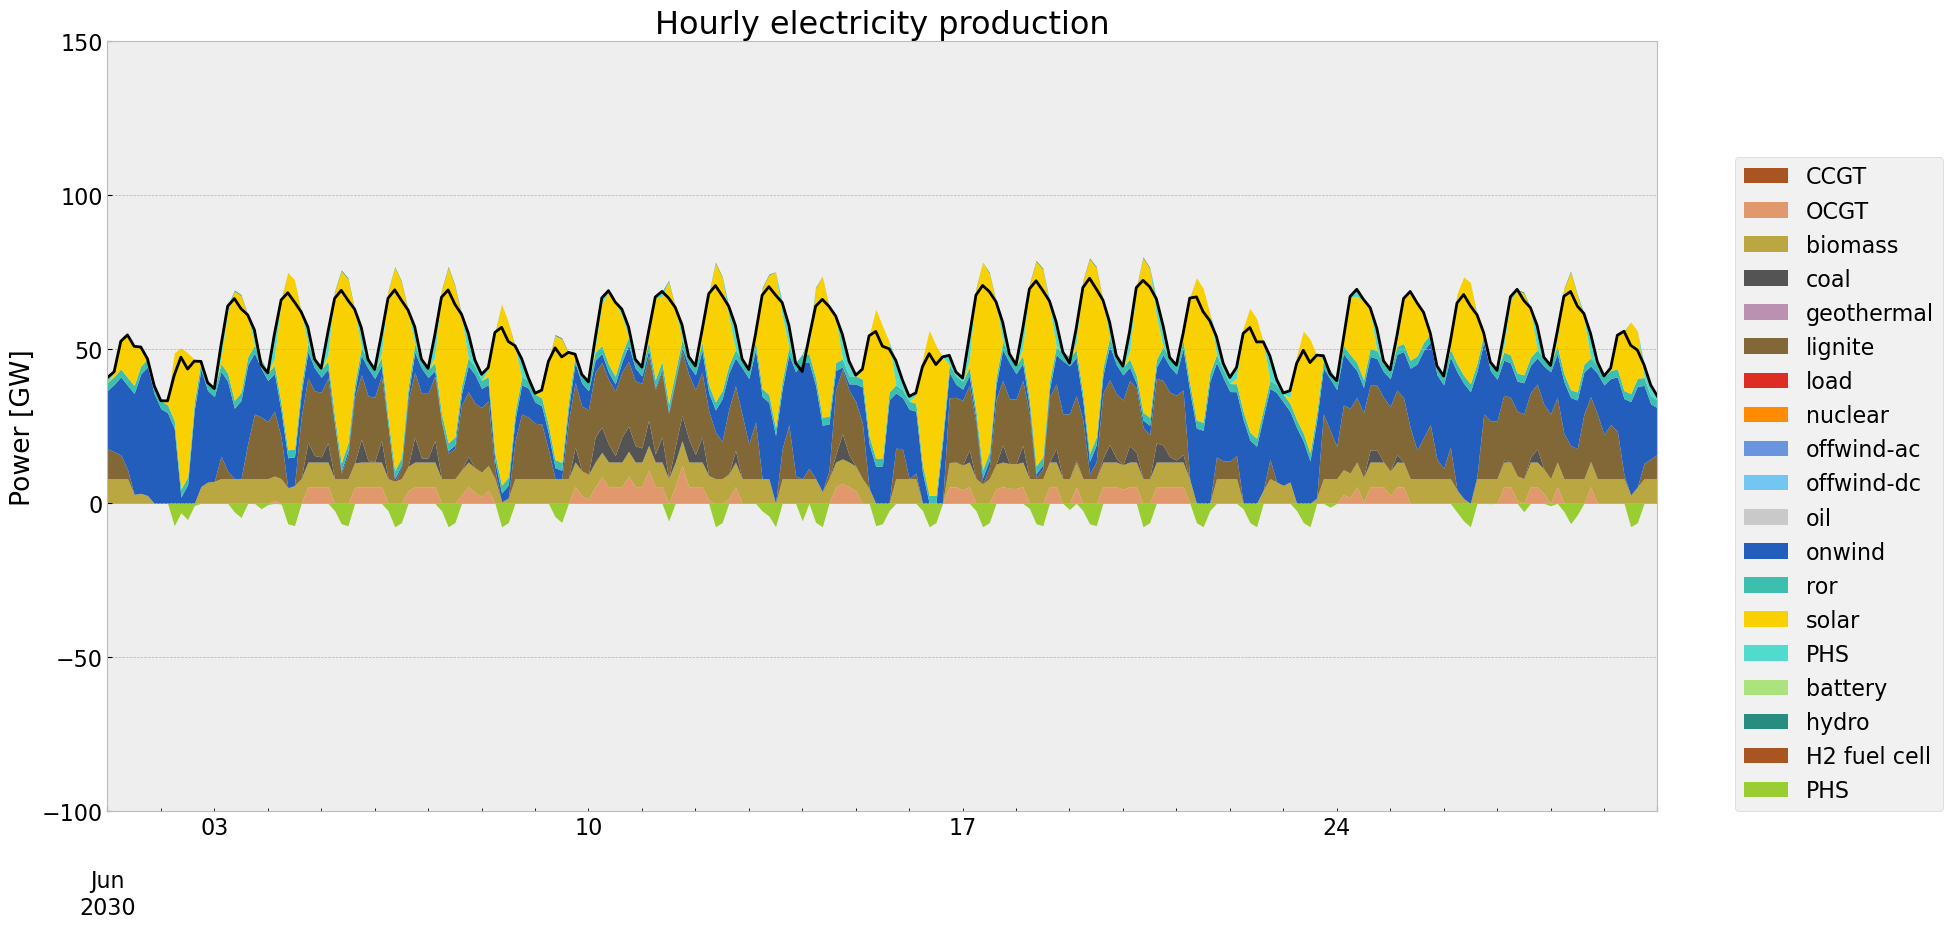

In [55]:
gen_curve(n1, '2030-06-1', '2030-06-30', colors_gen)

## Storage

carrier      PHS  battery   hydro
bus                              
DE0 0    2.10300      0.0  0.1200
DE0 1    0.99980      0.0     NaN
DE0 2    1.85500      0.0  0.1695
DE0 3    1.74142      0.0     NaN
DE0 4    0.90000      0.0     NaN

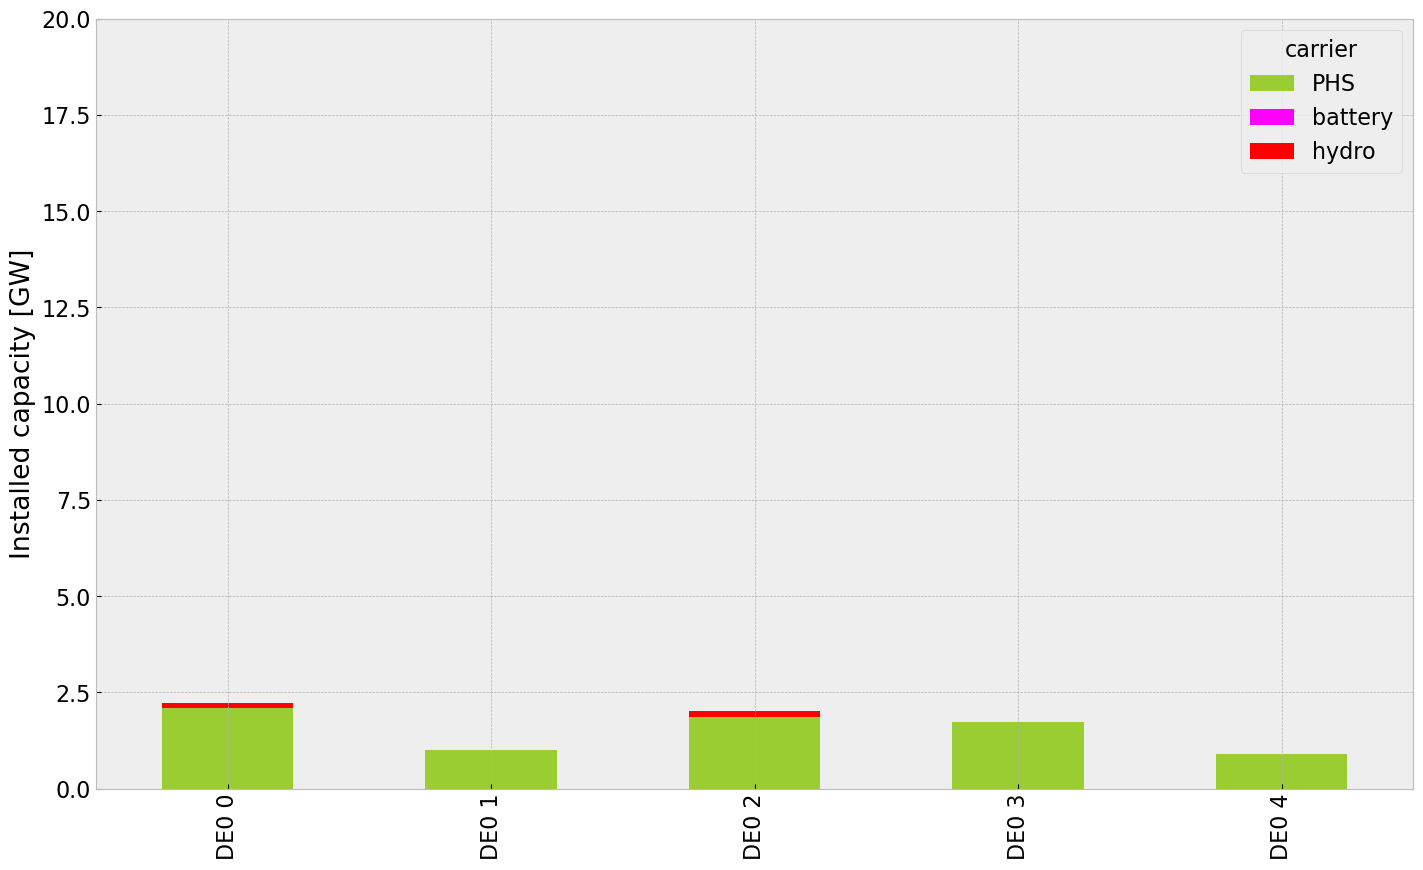

In [56]:
inst_store_table(n1)

carrier    H2
bus          
DE0 0 H2  0.0
DE0 1 H2  0.0
DE0 2 H2  0.0
DE0 3 H2  0.0
DE0 4 H2  0.0

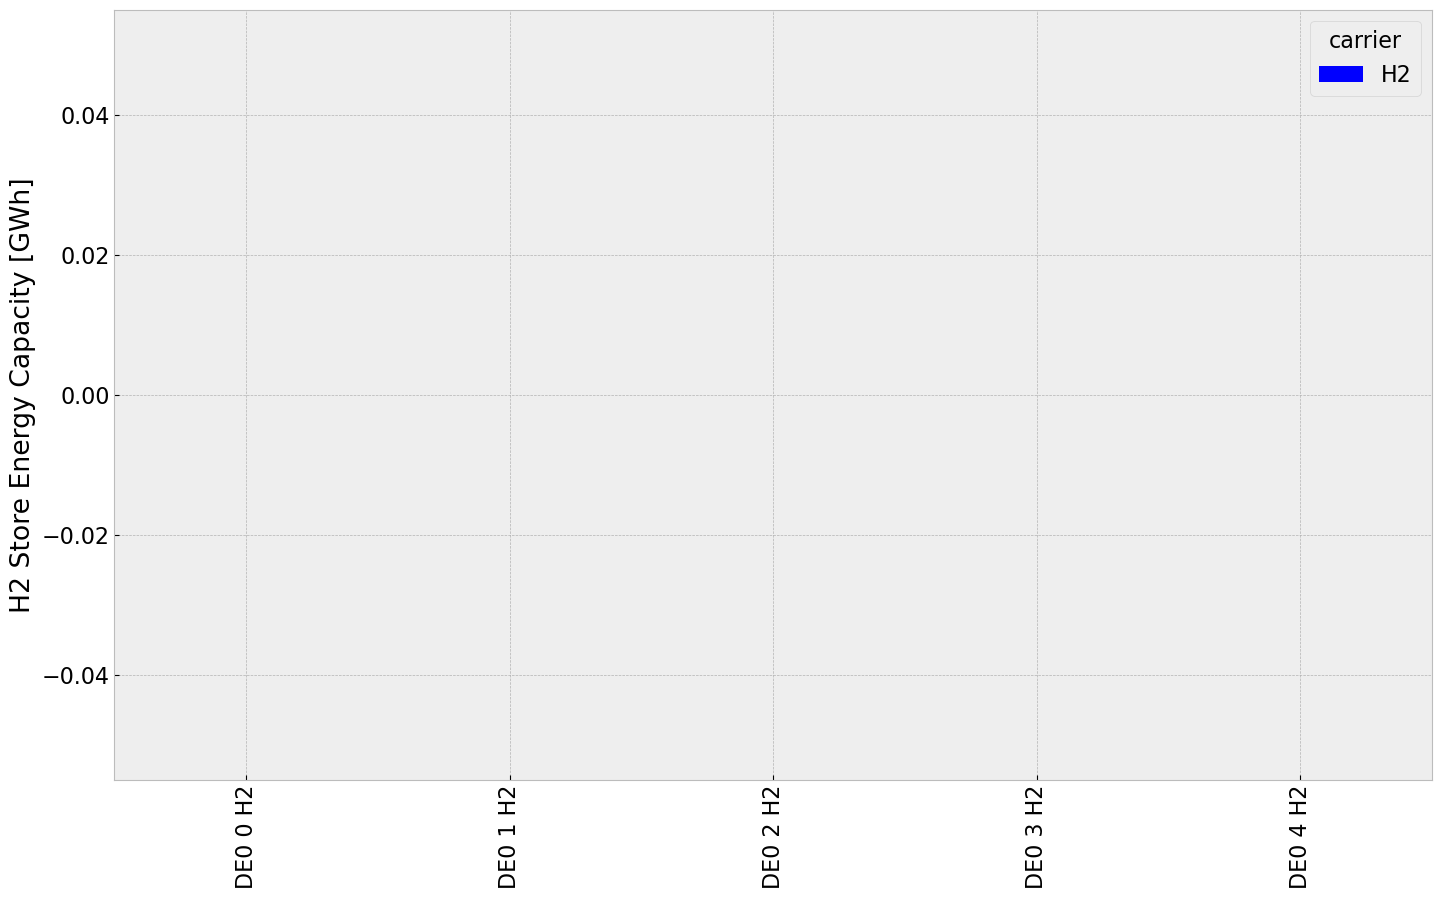

In [57]:
inst_storeh2_table(n1)

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\440258284.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  soc = n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\440258284.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  soc.index = pd.date_range(start='2030-01-01', end='2030-12-31 21:00:00', freq='3H')


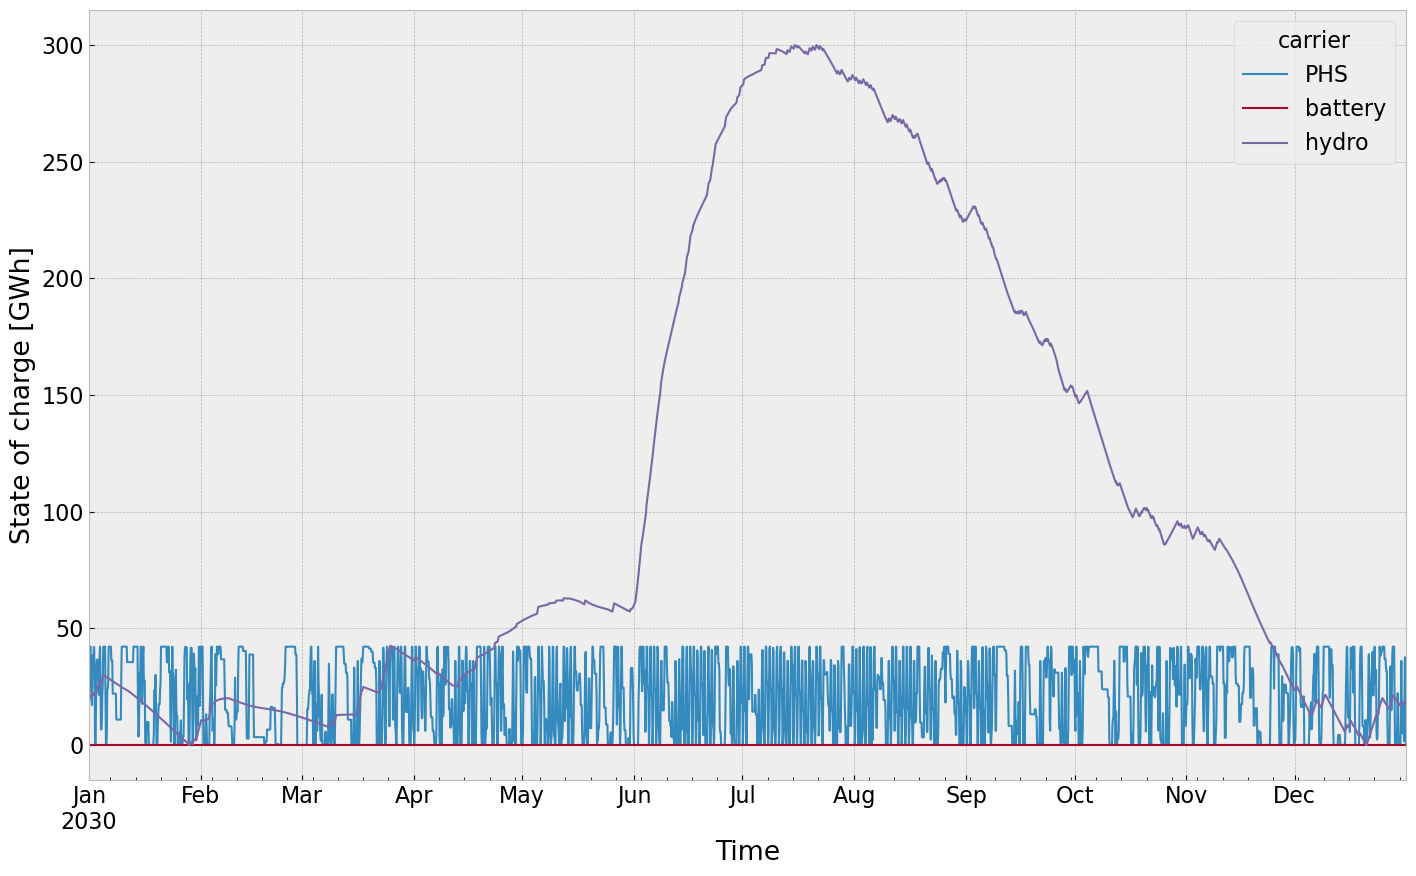

In [58]:
state_of_charge_plot(n1)


## Electricity Price


c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


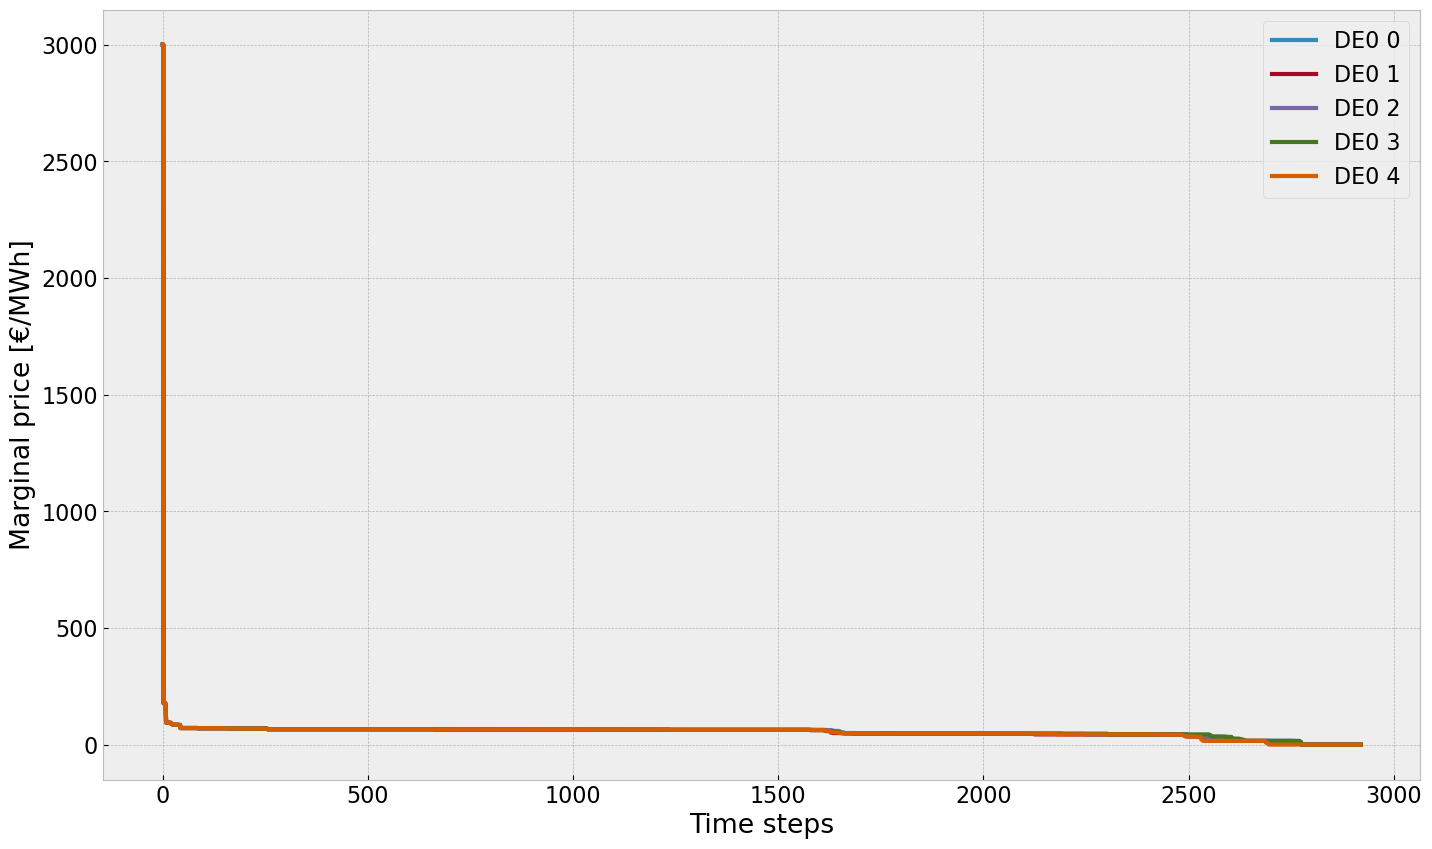

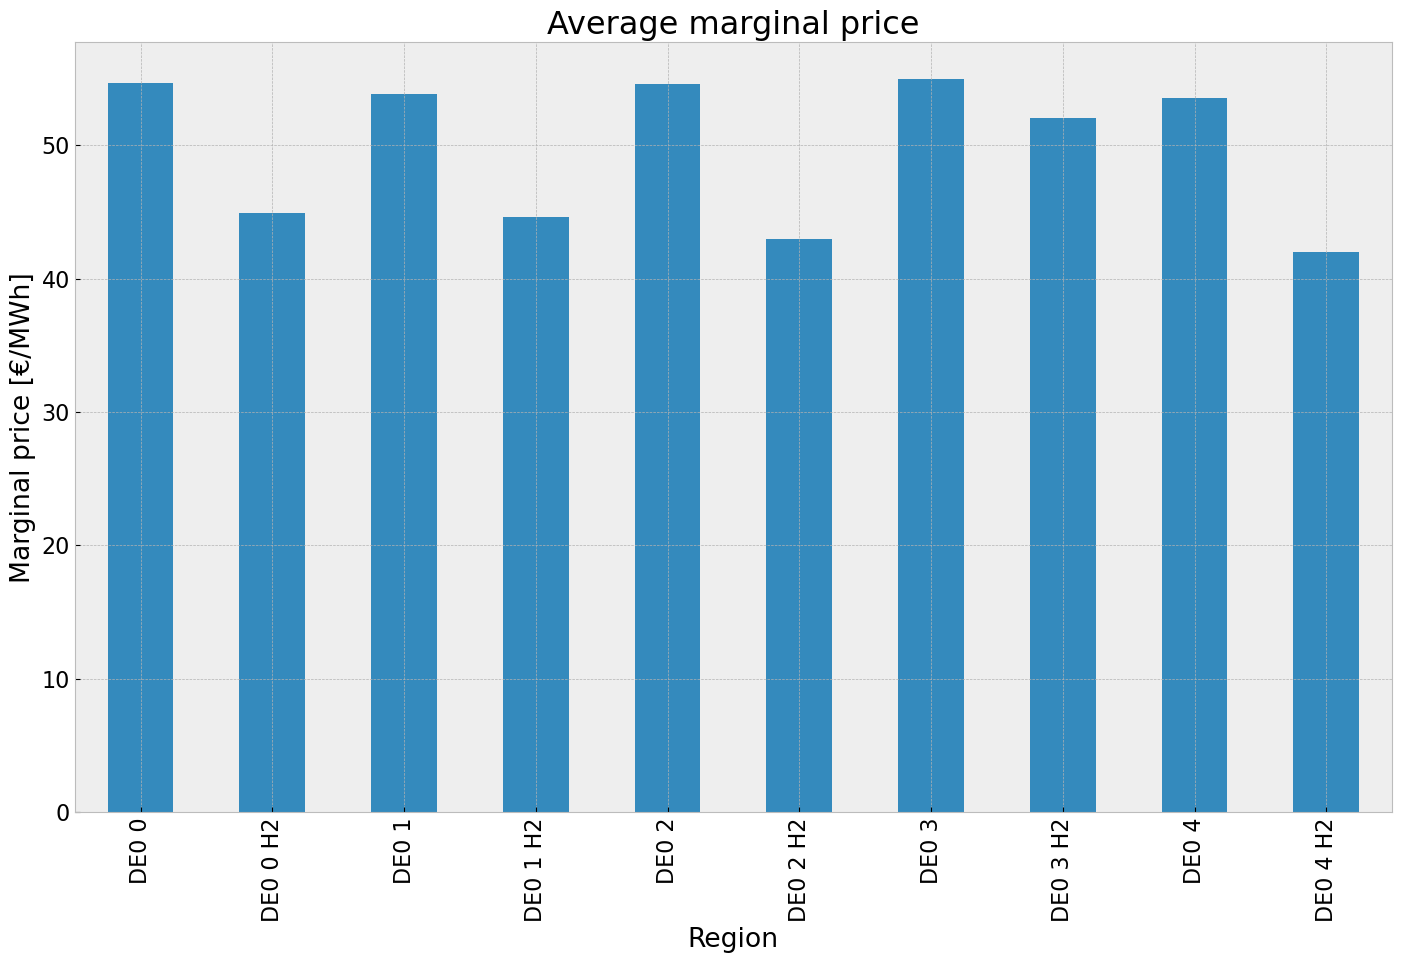

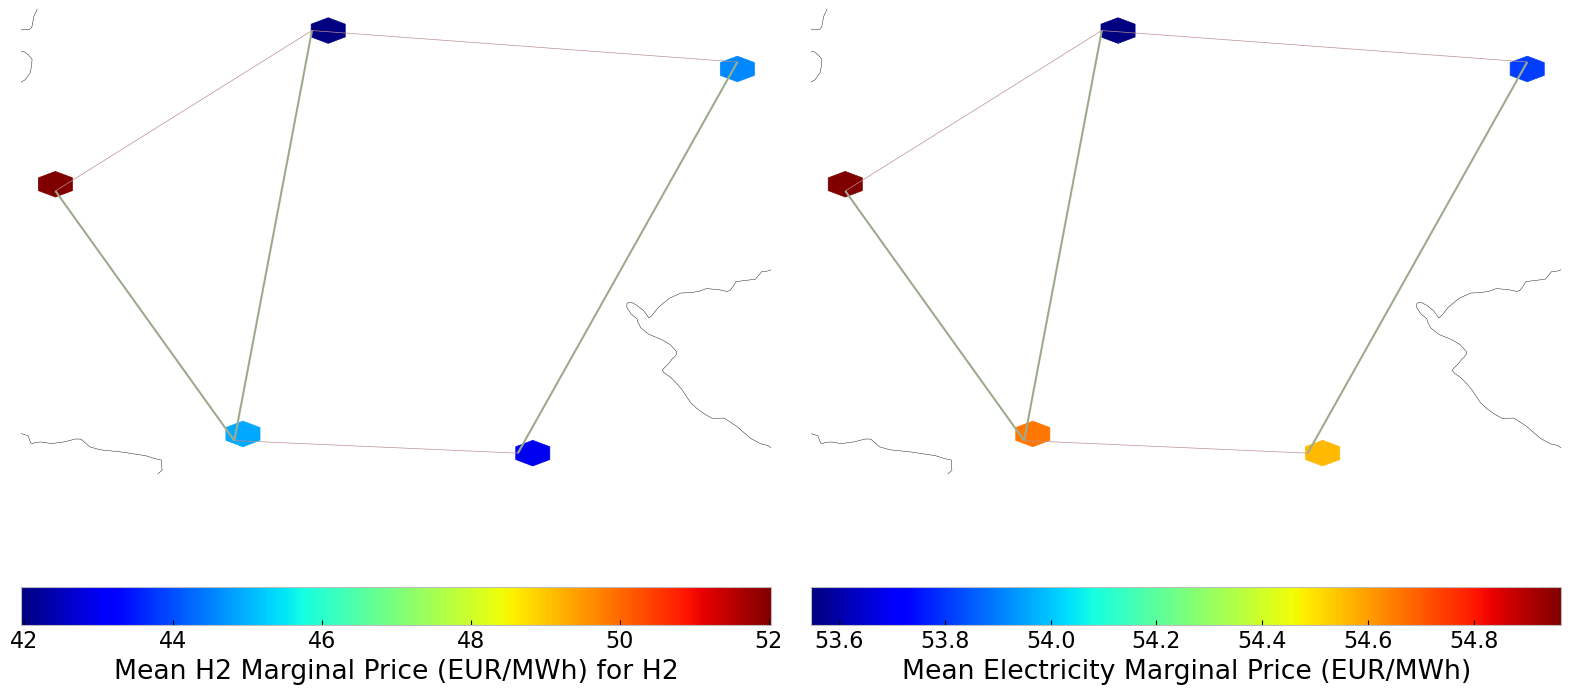

In [59]:
price_dur_curve_plot(n1)
price_regions_table(n1)
price_regions(n1)


## Emission

In [60]:
em_inv =em_table(n1)
em_inv

Generation in MWh  efficiency  emissions in Tonnes CO2/MWh  \
carrier                                                                  
CCGT             0.000000e+00    0.580000                       0.1980   
OCGT             1.275748e+07    0.499437                       0.1980   
biomass          2.129340e+07    0.468000                       0.0000   
coal             7.723452e+06    0.329632                       0.3361   
geothermal       0.000000e+00    1.000000                       0.1200   
lignite          4.541018e+07    0.358368                       0.4069   
load             1.623224e+03    1.000000                       0.0000   
nuclear          0.000000e+00    0.328400                       0.0000   
offwind-ac       1.211564e+04    1.000000                       0.0000   
offwind-dc       1.151348e+04    1.000000                       0.0000   
oil              6.762645e+03    0.368808                       0.2571   
onwind           4.605904e+07    1.000000                       0.0000   
ror              5.951822e+06    0.900000                       0.0000   
solar            3.068251e+07    1.000000                       0.0000   

            emissions in Tonnes CO2  
carrier                              
CCGT                   0.000000e+00  
OCGT                   5.057659e+06  
biomass                0.000000e+00  
coal                   7.874997e+06  
geothermal             0.000000e+00  
lignite                5.155992e+07  
load                   0.000000e+00  
nuclear                0.000000e+00  
offwind-ac             0.000000e+00  
offwind-dc             0.000000e+00  
oil                    4.714314e+03  
onwind                 0.000000e+00  
ror                    0.000000e+00  
solar                  0.000000e+00

## 2. Scenario: perfect foresight with no additional investment

In [61]:
#copy network
n2=n.copy()

#offwind cut
for column in n2.generators_t.p_max_pu.columns:
        if column.endswith('offwind-ac') or column.endswith('offwind-dc'):
                for index,row in n2.generators_t.p_max_pu[column].items():
                        if index >= cut_start and index < cut_end:
                                new_p_max_pu = n2.generators_t.p_max_pu.at[index, column] * 0.0 #0.9
                                n2.generators_t.p_max_pu.at[index, column] = new_p_max_pu
                                #if new_p_max_pu<0:
                                #    n2.generators_t.p_max_pu.at[index, column] = 0


#set the optimal capacity of generators from the base scenario as the new minimum capacity 
for index, value in n2.generators.p_nom_extendable.items():
    if value:  
        n2.generators.at[index, 'p_nom'] = n.generators.at[index, 'p_nom_opt']
        #n2.generators.at[index, 'p_nom_max'] = n.generators.at[index, 'p_nom_opt']
        n2.generators.at[index,'p_nom_extendable'] = False

#set the optimal capacity of storage units from the base scenario as the new minimum capacity 
for index, value in n2.storage_units.p_nom_extendable.items():
    if value:  
        n2.storage_units.at[index, 'p_nom'] = n.storage_units.at[index, 'p_nom_opt']
        #n2.storage_units.at[index, 'p_nom_max'] = n.storage_units.at[index, 'p_nom_opt']
        n2.storage_units.at[index,'p_nom_extendable'] = False

#set the optimal capacity of stores from the base scenario as the new minimum capacity 
for index, value in n2.stores.e_nom_extendable.items():
    if value:  
        n2.stores.at[index, 'e_nom'] = n.stores.at[index, 'e_nom_opt']
        #n2.stores.at[index, 'e_nom_max'] = n.stores.at[index, 'e_nom_opt']
        n2.stores.at[index, 'e_nom_extendable'] =False

#set the optimal capacity of lines from the base scenario as the new minimum capacity 
for index, value in n2.lines.s_nom_extendable.items():
    if value:  
        n2.lines.at[index, 's_nom'] = n.lines.at[index, 's_nom_opt']
        #n2.lines.at[index, 's_nom_max'] = n.lines.at[index, 's_nom_opt']
        n2.lines.at[index, 's_nom_extendable'] =False

In [62]:
n2.optimize.create_model()

Linopy LP model

Variables:
----------
 * Link-p_nom (Link-ext)
 * Generator-p (snapshot, Generator)
 * Line-s (snapshot, Line)
 * Link-p (snapshot, Link)
 * Store-e (snapshot, Store)
 * StorageUnit-p_dispatch (snapshot, StorageUnit)
 * StorageUnit-p_store (snapshot, StorageUnit)
 * StorageUnit-state_of_charge (snapshot, StorageUnit)
 * StorageUnit-spill (snapshot, StorageUnit)
 * Store-p (snapshot, Store)

Constraints:
------------
 * Link-ext-p_nom-lower (Link-ext)
 * Link-ext-p_nom-upper (Link-ext)
 * Generator-fix-p-lower (snapshot, Generator-fix)
 * Generator-fix-p-upper (snapshot, Generator-fix)
 * Line-fix-s-lower (snapshot, Line-fix)
 * Line-fix-s-upper (snapshot, Line-fix)
 * Link-ext-p-lower (snapshot, Link-ext)
 * Link-ext-p-upper (snapshot, Link-ext)
 * Store-fix-e-lower (snapshot, Store-fix)
 * Store-fix-e-upper (snapshot, Store-fix)
 * StorageUnit-fix-p_dispatch-lower (snapshot, StorageUnit-fix)
 * StorageUnit-fix-p_dispatch-upper (snapshot, StorageUnit-fix)
 * StorageUni

In [63]:
n2.optimize(solver_name ='gurobi')
#optimize.optimize_with_rolling_horizon(n2, horizon=24, overlap=0, solver_name='gurobi')

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 10/10 [00:01<00:00,  6.66it/s]
INFO:linopy.io: Writing time: 9.81s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ew0y7is_.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ew0y7is_.lp


Reading time = 2.96 seconds


INFO:gurobipy:Reading time = 2.96 seconds


obj: 849738 rows, 402951 columns, 1506717 nonzeros


INFO:gurobipy:obj: 849738 rows, 402951 columns, 1506717 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 849738 rows, 402951 columns and 1506717 nonzeros


INFO:gurobipy:Optimize a model with 849738 rows, 402951 columns and 1506717 nonzeros


Model fingerprint: 0xadad2cf2


INFO:gurobipy:Model fingerprint: 0xadad2cf2


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+01, 5e+02]


INFO:gurobipy:  Bounds range     [1e+01, 5e+02]


  RHS range        [7e+00, 1e+09]


INFO:gurobipy:  RHS range        [7e+00, 1e+09]


Presolve removed 762153 rows and 172170 columns


INFO:gurobipy:Presolve removed 762153 rows and 172170 columns


Presolve time: 1.12s


INFO:gurobipy:Presolve time: 1.12s


Presolved: 87585 rows, 230781 columns, 490632 nonzeros


INFO:gurobipy:Presolved: 87585 rows, 230781 columns, 490632 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: dual simplex and barrier


INFO:gurobipy:Concurrent LP optimizer: dual simplex and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 0.12s


INFO:gurobipy:Ordering time: 0.12s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 13


INFO:gurobipy: Dense cols : 13


 AA' NZ     : 2.307e+05


INFO:gurobipy: AA' NZ     : 2.307e+05


 Factor NZ  : 1.445e+06 (roughly 140 MB of memory)


INFO:gurobipy: Factor NZ  : 1.445e+06 (roughly 140 MB of memory)


 Factor Ops : 3.145e+07 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 3.145e+07 (less than 1 second per iteration)


 Threads    : 3


INFO:gurobipy: Threads    : 3


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   3.34571025e+18 -9.47620458e+18  1.57e+12 5.18e+06  2.72e+14     2s


INFO:gurobipy:   0   3.34571025e+18 -9.47620458e+18  1.57e+12 5.18e+06  2.72e+14     2s


   1   1.72415432e+18 -4.61274720e+18  7.98e+11 1.87e+06  1.31e+14     2s


INFO:gurobipy:   1   1.72415432e+18 -4.61274720e+18  7.98e+11 1.87e+06  1.31e+14     2s


   2   1.65594134e+18 -3.16521964e+18  7.02e+11 7.89e+05  1.92e+14     2s


INFO:gurobipy:   2   1.65594134e+18 -3.16521964e+18  7.02e+11 7.89e+05  1.92e+14     2s


   3   1.19828953e+17 -1.04832040e+18  3.40e+10 2.67e+05  1.27e+13     2s


INFO:gurobipy:   3   1.19828953e+17 -1.04832040e+18  3.40e+10 2.67e+05  1.27e+13     2s


   4   3.25766282e+16 -2.30663799e+16  2.11e+09 1.70e+03  6.62e+11     3s


INFO:gurobipy:   4   3.25766282e+16 -2.30663799e+16  2.11e+09 1.70e+03  6.62e+11     3s


   5   1.08356330e+15 -5.10863956e+15  1.45e+07 1.16e+02  1.72e+10     3s


INFO:gurobipy:   5   1.08356330e+15 -5.10863956e+15  1.45e+07 1.16e+02  1.72e+10     3s


   6   3.50673921e+14 -4.76498416e+14  3.56e+06 4.21e+00  2.19e+09     3s


INFO:gurobipy:   6   3.50673921e+14 -4.76498416e+14  3.56e+06 4.21e+00  2.19e+09     3s


   7   7.10141193e+12 -7.24656826e+13  2.35e+01 2.09e-01  1.71e+08     3s


INFO:gurobipy:   7   7.10141193e+12 -7.24656826e+13  2.35e+01 2.09e-01  1.71e+08     3s


   8   3.74857565e+12 -2.06816821e+13  1.22e+01 5.59e-02  5.20e+07     3s


INFO:gurobipy:   8   3.74857565e+12 -2.06816821e+13  1.22e+01 5.59e-02  5.20e+07     3s


   9   1.97310305e+12 -6.41038367e+12  5.92e+00 1.57e-02  1.77e+07     3s


INFO:gurobipy:   9   1.97310305e+12 -6.41038367e+12  5.92e+00 1.57e-02  1.77e+07     3s


  10   7.47406769e+11 -1.94881944e+12  2.05e+00 4.43e-03  5.68e+06     3s


INFO:gurobipy:  10   7.47406769e+11 -1.94881944e+12  2.05e+00 4.43e-03  5.68e+06     3s


  11   1.35127993e+11 -5.84851802e+11  3.51e-01 1.14e-03  1.51e+06     4s


INFO:gurobipy:  11   1.35127993e+11 -5.84851802e+11  3.51e-01 1.14e-03  1.51e+06     4s


  12   6.11510778e+10 -2.51182226e+11  1.51e-01 4.74e-04  6.56e+05     4s


INFO:gurobipy:  12   6.11510778e+10 -2.51182226e+11  1.51e-01 4.74e-04  6.56e+05     4s


  13   3.37066631e+10 -7.91878920e+10  6.38e-02 1.59e-04  2.37e+05     4s


INFO:gurobipy:  13   3.37066631e+10 -7.91878920e+10  6.38e-02 1.59e-04  2.37e+05     4s


  14   2.07921149e+10 -2.90596821e+10  2.44e-02 6.87e-05  1.05e+05     4s


INFO:gurobipy:  14   2.07921149e+10 -2.90596821e+10  2.44e-02 6.87e-05  1.05e+05     4s


  15   1.31980078e+10 -1.30525664e+10  7.94e-03 3.67e-05  5.51e+04     4s


INFO:gurobipy:  15   1.31980078e+10 -1.30525664e+10  7.94e-03 3.67e-05  5.51e+04     4s


  16   9.51535689e+09 -1.95045520e+09  2.74e-03 1.50e-05  2.41e+04     4s


INFO:gurobipy:  16   9.51535689e+09 -1.95045520e+09  2.74e-03 1.50e-05  2.41e+04     4s


  17   8.53361546e+09  7.34796174e+08  1.76e-03 1.01e-05  1.64e+04     4s


INFO:gurobipy:  17   8.53361546e+09  7.34796174e+08  1.76e-03 1.01e-05  1.64e+04     4s


  18   7.37091352e+09  2.36928843e+09  7.72e-04 6.99e-06  1.05e+04     5s


INFO:gurobipy:  18   7.37091352e+09  2.36928843e+09  7.72e-04 6.99e-06  1.05e+04     5s


  19   6.85915130e+09  3.82875115e+09  4.22e-04 4.14e-06  6.36e+03     5s


INFO:gurobipy:  19   6.85915130e+09  3.82875115e+09  4.22e-04 4.14e-06  6.36e+03     5s


  20   6.52597830e+09  4.55620515e+09  2.33e-04 2.75e-06  4.14e+03     5s


INFO:gurobipy:  20   6.52597830e+09  4.55620515e+09  2.33e-04 2.75e-06  4.14e+03     5s


  21   6.33805991e+09  5.15140937e+09  1.39e-04 1.57e-06  2.49e+03     5s


INFO:gurobipy:  21   6.33805991e+09  5.15140937e+09  1.39e-04 1.57e-06  2.49e+03     5s


  22   6.19976037e+09  5.53005650e+09  7.66e-05 8.58e-07  1.41e+03     5s


INFO:gurobipy:  22   6.19976037e+09  5.53005650e+09  7.66e-05 8.58e-07  1.41e+03     5s


  23   6.13141575e+09  5.71574706e+09  4.85e-05 4.98e-07  8.73e+02     5s


INFO:gurobipy:  23   6.13141575e+09  5.71574706e+09  4.85e-05 4.98e-07  8.73e+02     5s


  24   6.08334051e+09  5.82210243e+09  2.97e-05 3.00e-07  5.49e+02     5s


INFO:gurobipy:  24   6.08334051e+09  5.82210243e+09  2.97e-05 3.00e-07  5.49e+02     5s


  25   6.04725458e+09  5.90575943e+09  1.62e-05 1.55e-07  2.97e+02     6s


INFO:gurobipy:  25   6.04725458e+09  5.90575943e+09  1.62e-05 1.55e-07  2.97e+02     6s


  26   6.03398186e+09  5.94044386e+09  1.15e-05 9.39e-08  1.96e+02     6s


INFO:gurobipy:  26   6.03398186e+09  5.94044386e+09  1.15e-05 9.39e-08  1.96e+02     6s


  27   6.01634861e+09  5.95959557e+09  5.58e-06 6.24e-08  1.19e+02     6s


INFO:gurobipy:  27   6.01634861e+09  5.95959557e+09  5.58e-06 6.24e-08  1.19e+02     6s


  28   6.00748447e+09  5.98041957e+09  2.54e-06 2.90e-08  5.68e+01     6s


INFO:gurobipy:  28   6.00748447e+09  5.98041957e+09  2.54e-06 2.90e-08  5.68e+01     6s


  29   6.00446375e+09  5.98635508e+09  1.56e-06 1.96e-08  3.80e+01     6s


INFO:gurobipy:  29   6.00446375e+09  5.98635508e+09  1.56e-06 1.96e-08  3.80e+01     6s


  30   6.00293092e+09  5.99086343e+09  1.08e-06 1.25e-08  2.53e+01     6s


INFO:gurobipy:  30   6.00293092e+09  5.99086343e+09  1.08e-06 1.25e-08  2.53e+01     6s


  31   6.00127238e+09  5.99420680e+09  5.73e-07 7.35e-09  1.48e+01     7s


INFO:gurobipy:  31   6.00127238e+09  5.99420680e+09  5.73e-07 7.35e-09  1.48e+01     7s


  32   6.00017797e+09  5.99683263e+09  2.62e-07 3.26e-09  7.03e+00     7s


INFO:gurobipy:  32   6.00017797e+09  5.99683263e+09  2.62e-07 3.26e-09  7.03e+00     7s


  33   5.99963626e+09  5.99798497e+09  1.17e-07 2.02e-09  3.47e+00     7s


INFO:gurobipy:  33   5.99963626e+09  5.99798497e+09  1.17e-07 2.02e-09  3.47e+00     7s


  34   5.99923705e+09  5.99852314e+09  8.05e-08 1.88e-09  1.50e+00     7s


INFO:gurobipy:  34   5.99923705e+09  5.99852314e+09  8.05e-08 1.88e-09  1.50e+00     7s


  35   5.99918111e+09  5.99904139e+09  1.12e-07 2.59e-09  2.93e-01     7s


INFO:gurobipy:  35   5.99918111e+09  5.99904139e+09  1.12e-07 2.59e-09  2.93e-01     7s


  36   5.99915216e+09  5.99910274e+09  1.02e-07 2.19e-09  1.04e-01     7s


INFO:gurobipy:  36   5.99915216e+09  5.99910274e+09  1.02e-07 2.19e-09  1.04e-01     7s


  37   5.99914478e+09  5.99911956e+09  1.27e-07 1.91e-09  5.30e-02     7s


INFO:gurobipy:  37   5.99914478e+09  5.99911956e+09  1.27e-07 1.91e-09  5.30e-02     7s


  38   5.99914046e+09  5.99912859e+09  5.33e-08 1.28e-09  2.49e-02     8s


INFO:gurobipy:  38   5.99914046e+09  5.99912859e+09  5.33e-08 1.28e-09  2.49e-02     8s


  39   5.99913873e+09  5.99913313e+09  2.74e-08 1.30e-09  1.18e-02     8s


INFO:gurobipy:  39   5.99913873e+09  5.99913313e+09  2.74e-08 1.30e-09  1.18e-02     8s


  40   5.99913786e+09  5.99913529e+09  1.52e-08 1.47e-09  5.40e-03     8s


INFO:gurobipy:  40   5.99913786e+09  5.99913529e+09  1.52e-08 1.47e-09  5.40e-03     8s


  41   5.99913715e+09  5.99913613e+09  5.44e-09 1.92e-09  2.13e-03     8s


INFO:gurobipy:  41   5.99913715e+09  5.99913613e+09  5.44e-09 1.92e-09  2.13e-03     8s


  42   5.99913684e+09  5.99913662e+09  3.21e-07 2.04e-09  4.65e-04     8s


INFO:gurobipy:  42   5.99913684e+09  5.99913662e+09  3.21e-07 2.04e-09  4.65e-04     8s


  43   5.99913675e+09  5.99913670e+09  7.14e-08 1.90e-09  1.06e-04     9s


INFO:gurobipy:  43   5.99913675e+09  5.99913670e+09  7.14e-08 1.90e-09  1.06e-04     9s


  44   5.99913672e+09  5.99913671e+09  1.71e-07 1.87e-09  2.29e-05     9s


INFO:gurobipy:  44   5.99913672e+09  5.99913671e+09  1.71e-07 1.87e-09  2.29e-05     9s


  45   5.99913672e+09  5.99913672e+09  2.10e-08 1.86e-09  4.59e-08     9s


INFO:gurobipy:  45   5.99913672e+09  5.99913672e+09  2.10e-08 1.86e-09  4.59e-08     9s


  46   5.99913672e+09  5.99913672e+09  2.13e-06 1.86e-09  8.57e-11     9s


INFO:gurobipy:  46   5.99913672e+09  5.99913672e+09  2.13e-06 1.86e-09  8.57e-11     9s


INFO:gurobipy:


Barrier solved model in 46 iterations and 9.44 seconds (3.93 work units)


INFO:gurobipy:Barrier solved model in 46 iterations and 9.44 seconds (3.93 work units)


Optimal objective 5.99913672e+09


INFO:gurobipy:Optimal objective 5.99913672e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   42576 DPushes remaining with DInf 0.0000000e+00                10s


INFO:gurobipy:   42576 DPushes remaining with DInf 0.0000000e+00                10s


       0 DPushes remaining with DInf 0.0000000e+00                10s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                10s


INFO:gurobipy:


    5026 PPushes remaining with PInf 0.0000000e+00                10s


INFO:gurobipy:    5026 PPushes remaining with PInf 0.0000000e+00                10s


     826 PPushes remaining with PInf 0.0000000e+00                10s


INFO:gurobipy:     826 PPushes remaining with PInf 0.0000000e+00                10s


       0 PPushes remaining with PInf 0.0000000e+00                10s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                10s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.6652618e-09     10s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.6652618e-09     10s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   17872    5.9991367e+09   0.000000e+00   0.000000e+00     11s


INFO:gurobipy:   17872    5.9991367e+09   0.000000e+00   0.000000e+00     11s


INFO:gurobipy:


Solved in 17872 iterations and 10.67 seconds (4.70 work units)


INFO:gurobipy:Solved in 17872 iterations and 10.67 seconds (4.70 work units)


Optimal objective  5.999136718e+09


INFO:gurobipy:Optimal objective  5.999136718e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 402951 primals, 849738 duals
Objective: 6.00e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper,

('ok', 'optimal')

In [64]:
tot_cos_noinv=n2.objective/1e9 #billion €
system_cost_noinv = system_cost(n2) #million €/a
marg_price_region_noinv = n2.buses_t.marginal_price.mean()
stat_noinv = n2.statistics()

## Installed Capacity

Since expansion is not allowed in this scenario, the installed capacity will equal to that of the base scenario.

<Figure size 640x480 with 0 Axes>

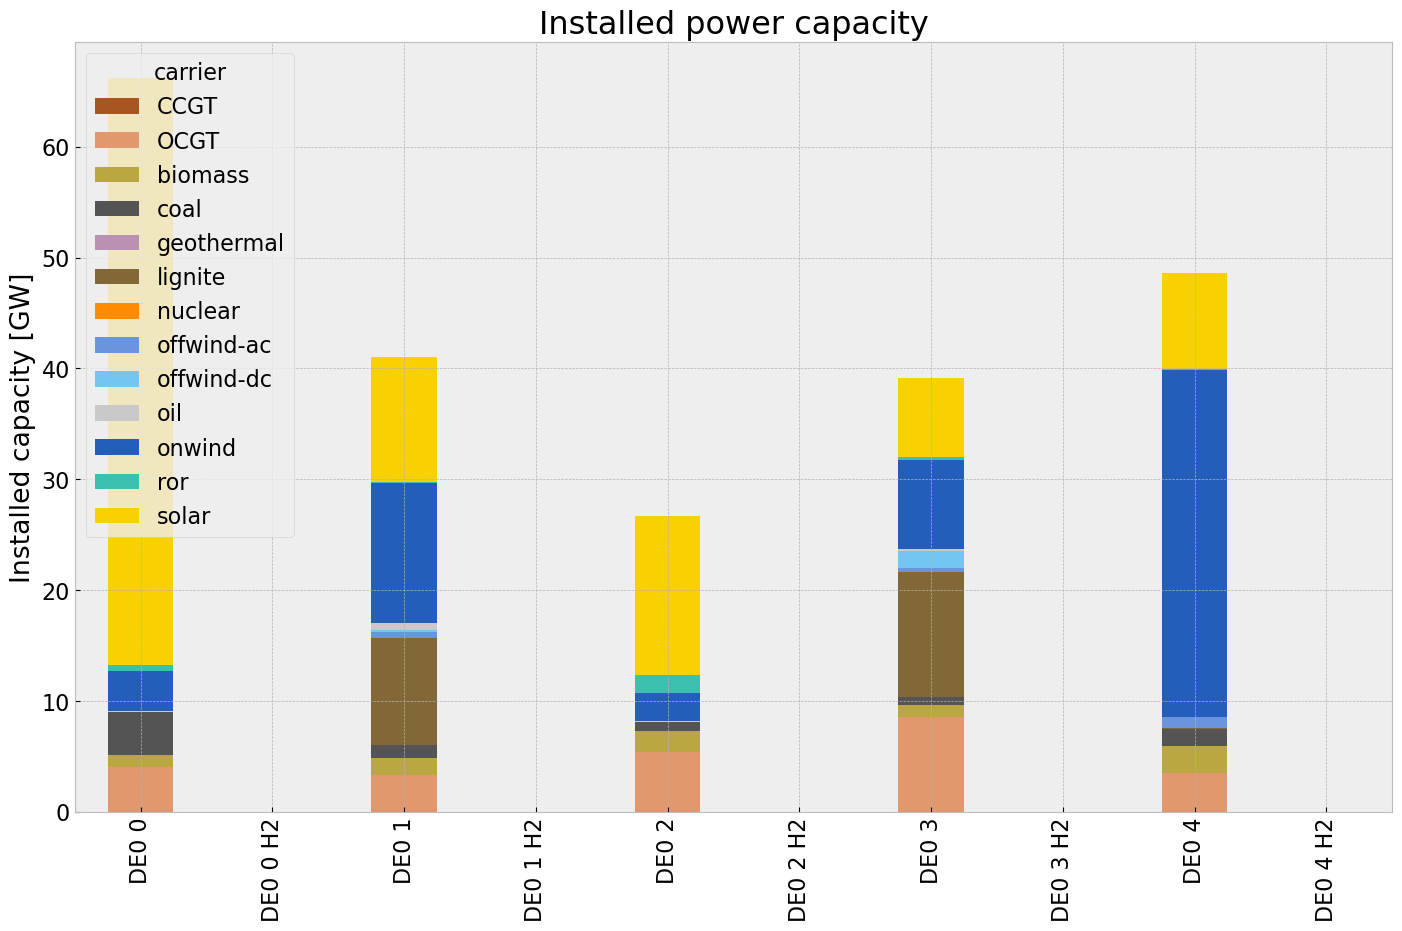

In [65]:
# consolidated istalled cap without load_shedding

capacities_noinv = n2.generators.groupby(['bus', 'carrier']).p_nom_opt.sum()
capacities_noinv.fillna(0, inplace=True)
gen = (capacities_noinv.unstack()/1000).drop(columns=['load'],inplace=False)


cap_noinv = inst_cap_table(n2, color_cap)



## Generation

<Figure size 640x480 with 0 Axes>

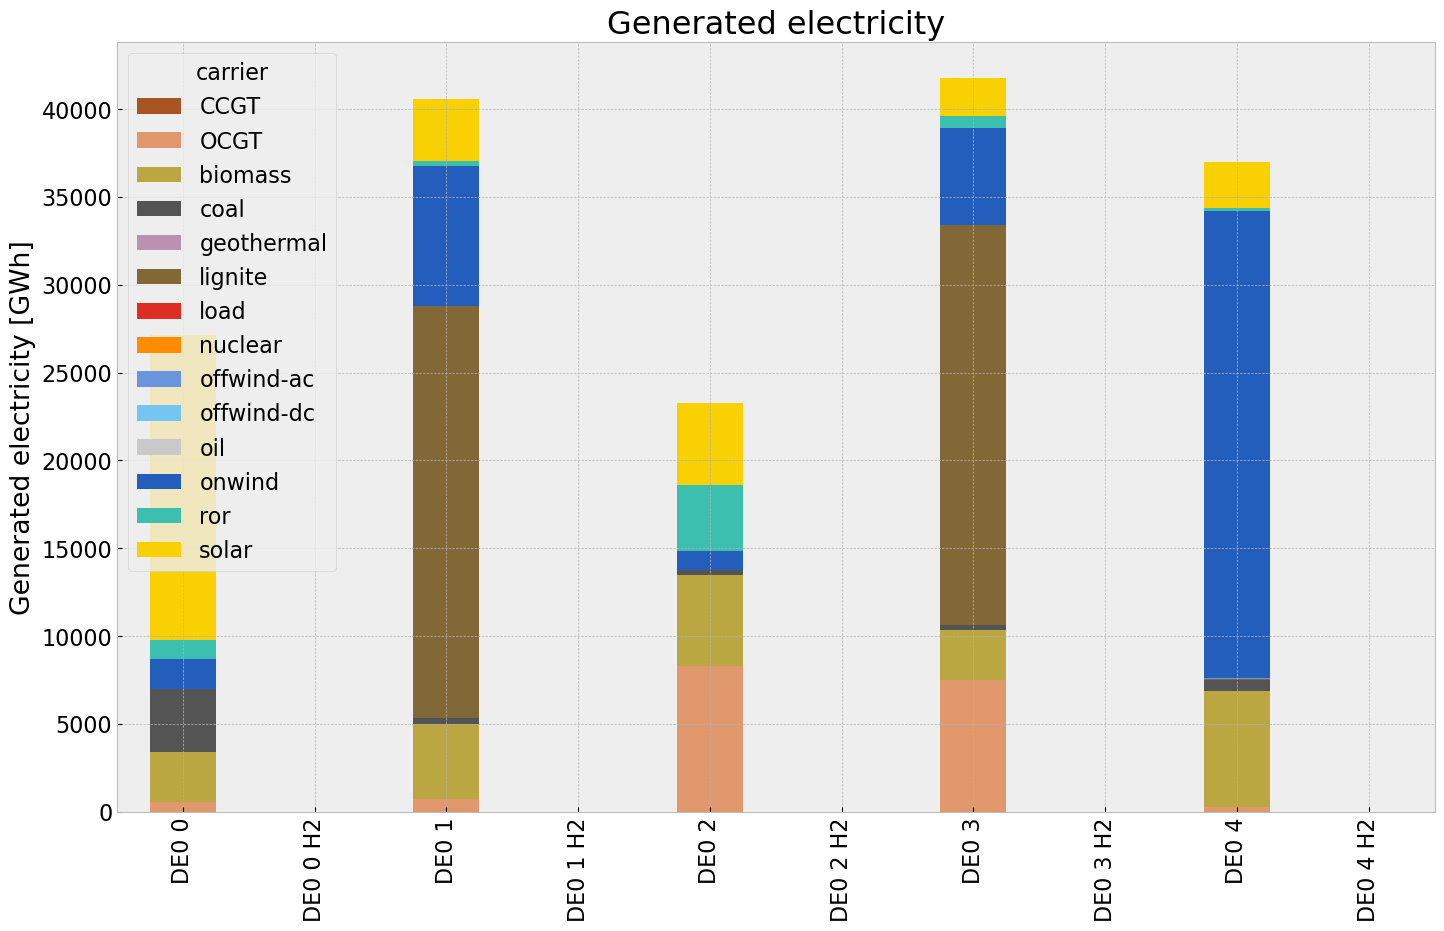

In [66]:
# consolidated generation table
carrier = n2.generators.carrier.unique()
df_tot_generation = n2.generators_t.p.sum()

generations = pd.Series(index = n2.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().index)

for r in region:
    for tech in carrier:
        key = f"{r} {tech}"
        if key in df_tot_generation.index:
            try:
                generations.loc[r, tech] = df_tot_generation[key]
                #print(generations.loc[r, tech])
            except KeyError:
                print('error')

generations.fillna(0, inplace=True)
gen_noinv = generations.unstack()/1000#GWh

gen_noinv= gen_power_table(n2,colors_gen_table)




## Snapshot

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\2615338355.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  p = n2.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\2615338355.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sto = n2.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\1422613485.py:6: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\1422613485.py:10: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  links = n.links_t.p1.groupby(n.links.carrier

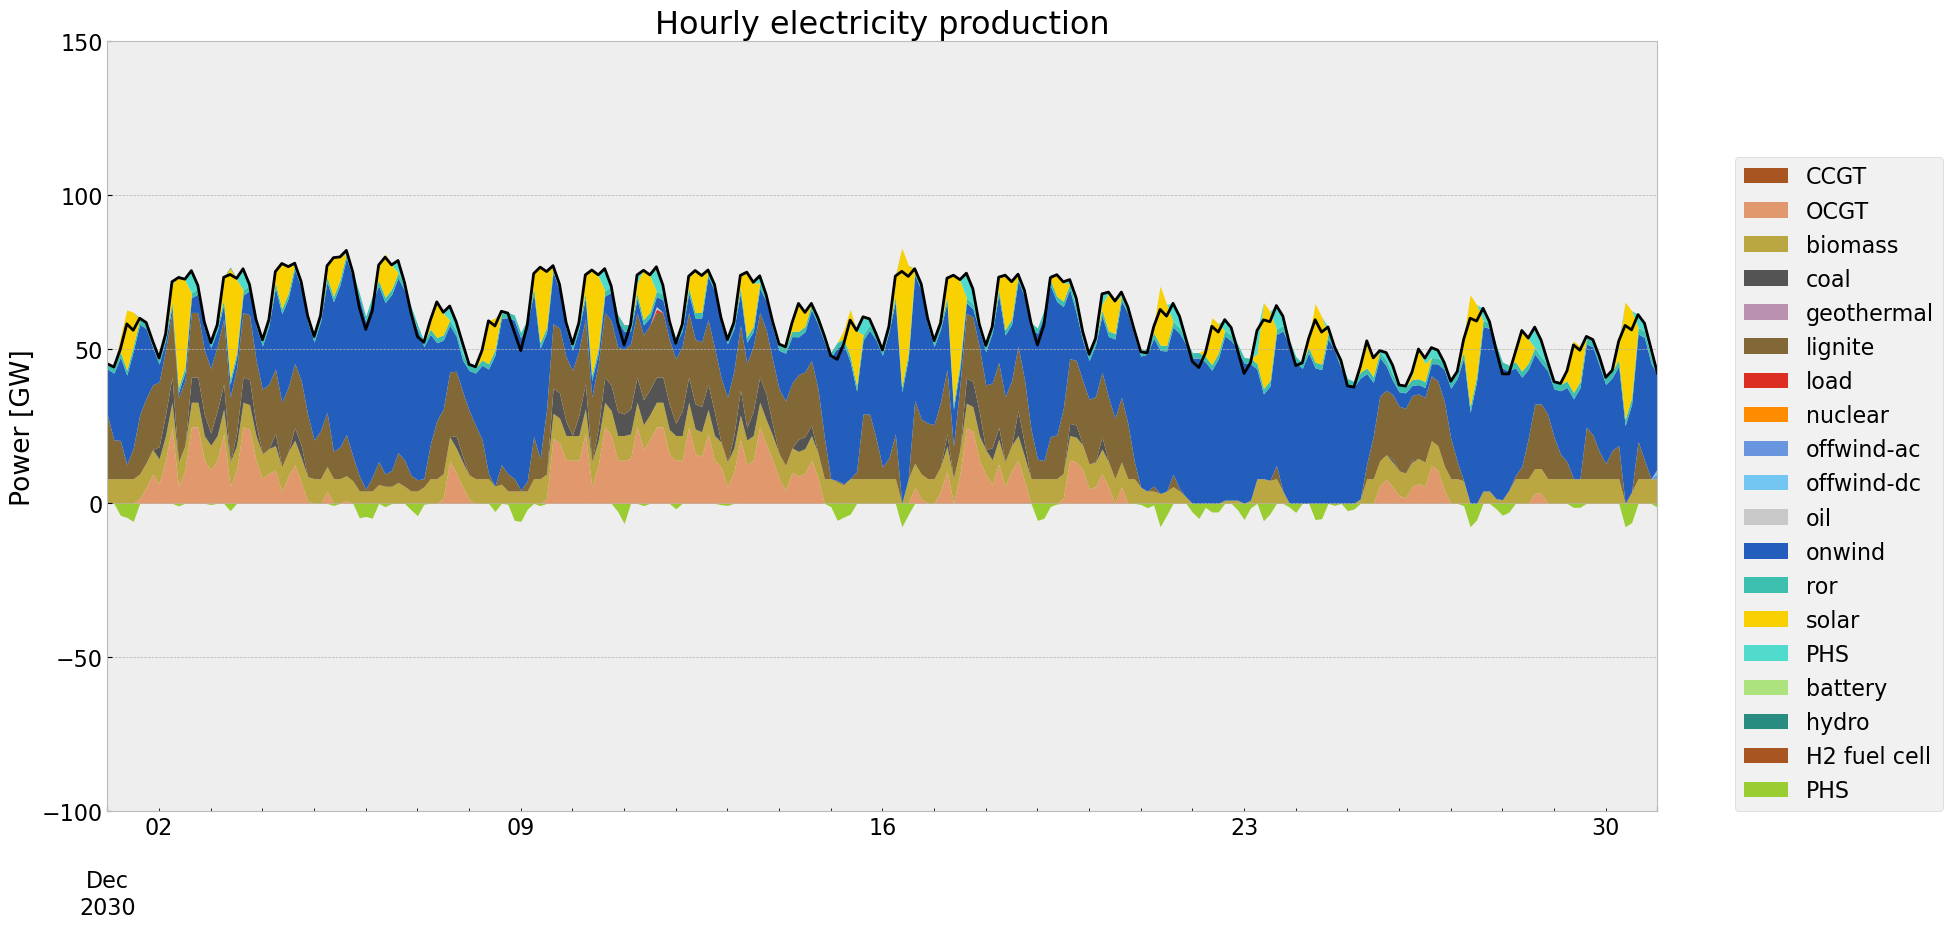

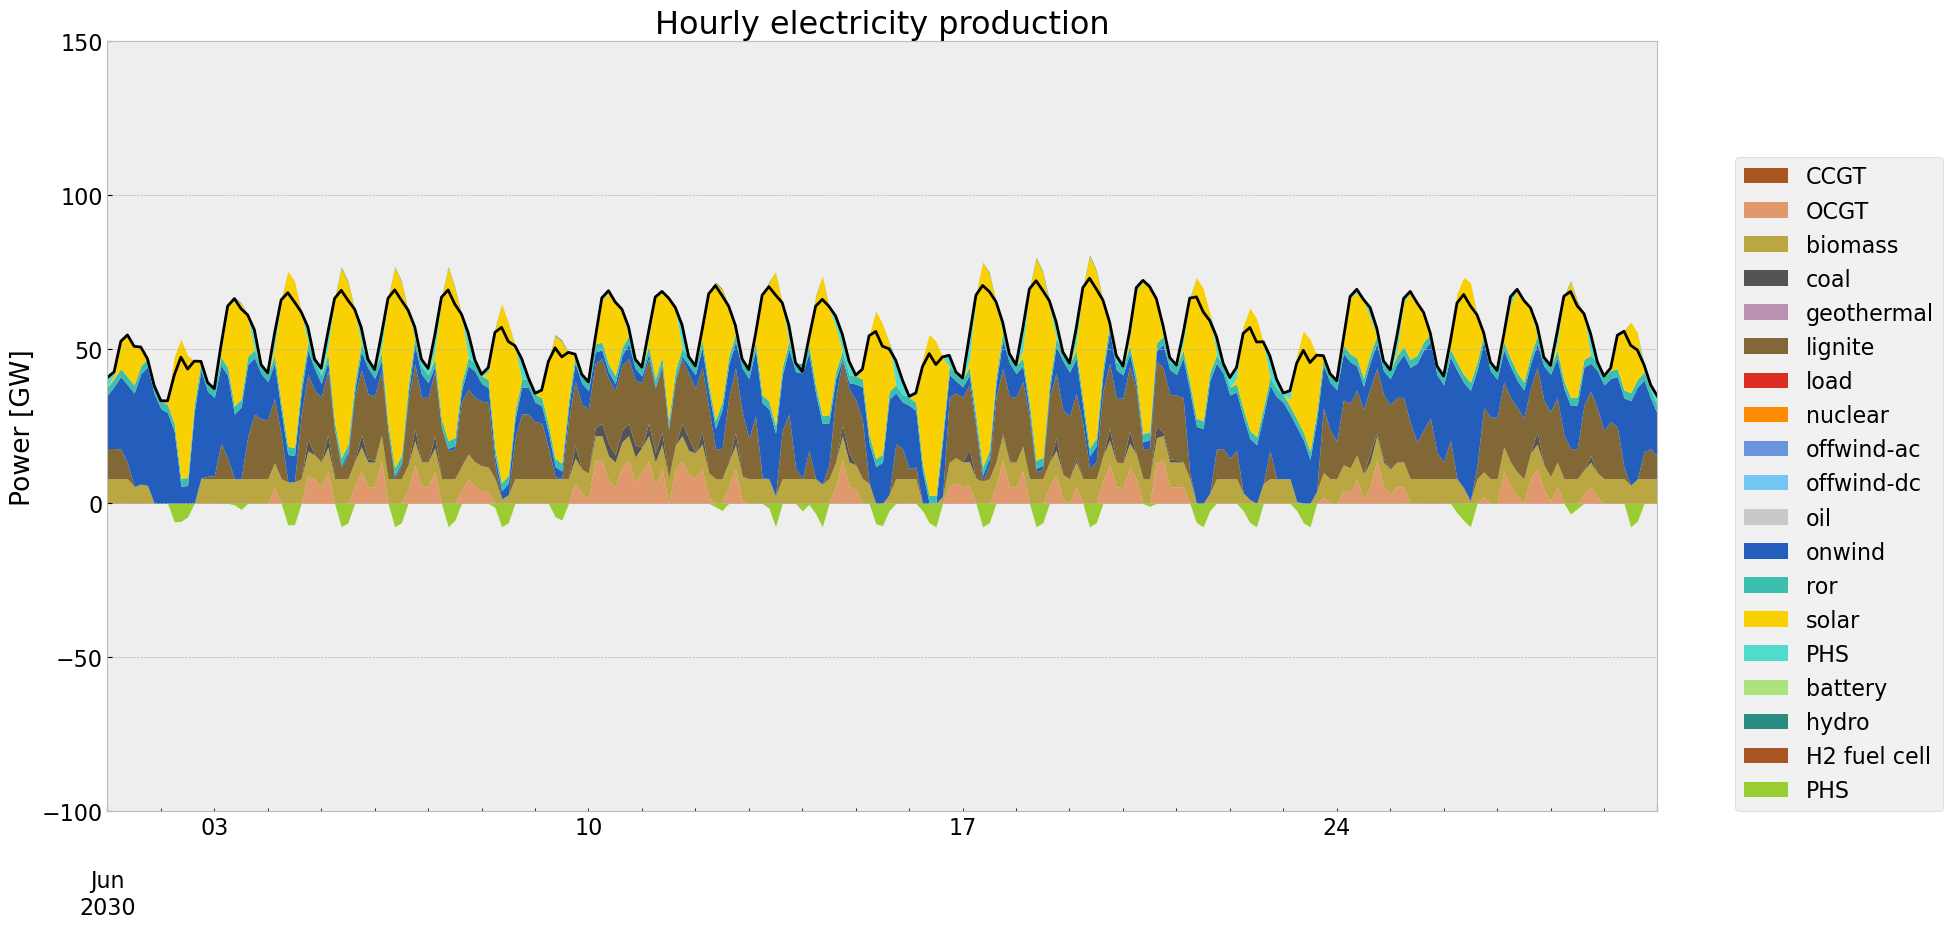

In [67]:
p = n2.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
sto = n2.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)    

gen_curve(n2, '2030-12-01', '2030-12-31', colors_gen)
gen_curve(n2, '2030-06-01', '2030-06-30', colors_gen)


C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\440258284.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  soc = n.storage_units_t.state_of_charge.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\440258284.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  soc.index = pd.date_range(start='2030-01-01', end='2030-12-31 21:00:00', freq='3H')
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\2144961626.py:5: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  n2.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3).loc[pd.date_range(start="2013-01-01", end="2013-12-31",freq='3H')].plot(figsize=(20,10))
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\2144961626.py:5: FutureWarning: 'H' is deprecated and will be removed in a future

Generation in MWh  efficiency  emissions in Tonnes CO2/MWh  \
carrier                                                                  
CCGT             0.000000e+00    0.580000                       0.1980   
OCGT             1.734216e+07    0.499437                       0.1980   
biomass          2.177094e+07    0.468000                       0.0000   
coal             5.080001e+06    0.329632                       0.3361   
geothermal       0.000000e+00    1.000000                       0.1200   
lignite          4.628982e+07    0.358368                       0.4069   
load             3.855816e+03    1.000000                       0.0000   
nuclear          0.000000e+00    0.328400                       0.0000   
offwind-ac       1.269690e+04    1.000000                       0.0000   
offwind-dc       1.290708e+04    1.000000                       0.0000   
oil              6.895008e+03    0.368808                       0.2571   
onwind           4.289895e+07    1.000000                       0.0000   
ror              5.951822e+06    0.900000                       0.0000   
solar            3.031600e+07    1.000000                       0.0000   

            emissions in Tonnes CO2  
carrier                              
CCGT                   0.000000e+00  
OCGT                   6.875239e+06  
biomass                0.000000e+00  
coal                   5.179678e+06  
geothermal             0.000000e+00  
lignite                5.255868e+07  
load                   0.000000e+00  
nuclear                0.000000e+00  
offwind-ac             0.000000e+00  
offwind-dc             0.000000e+00  
oil                    4.806585e+03  
onwind                 0.000000e+00  
ror                    0.000000e+00  
solar                  0.000000e+00

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


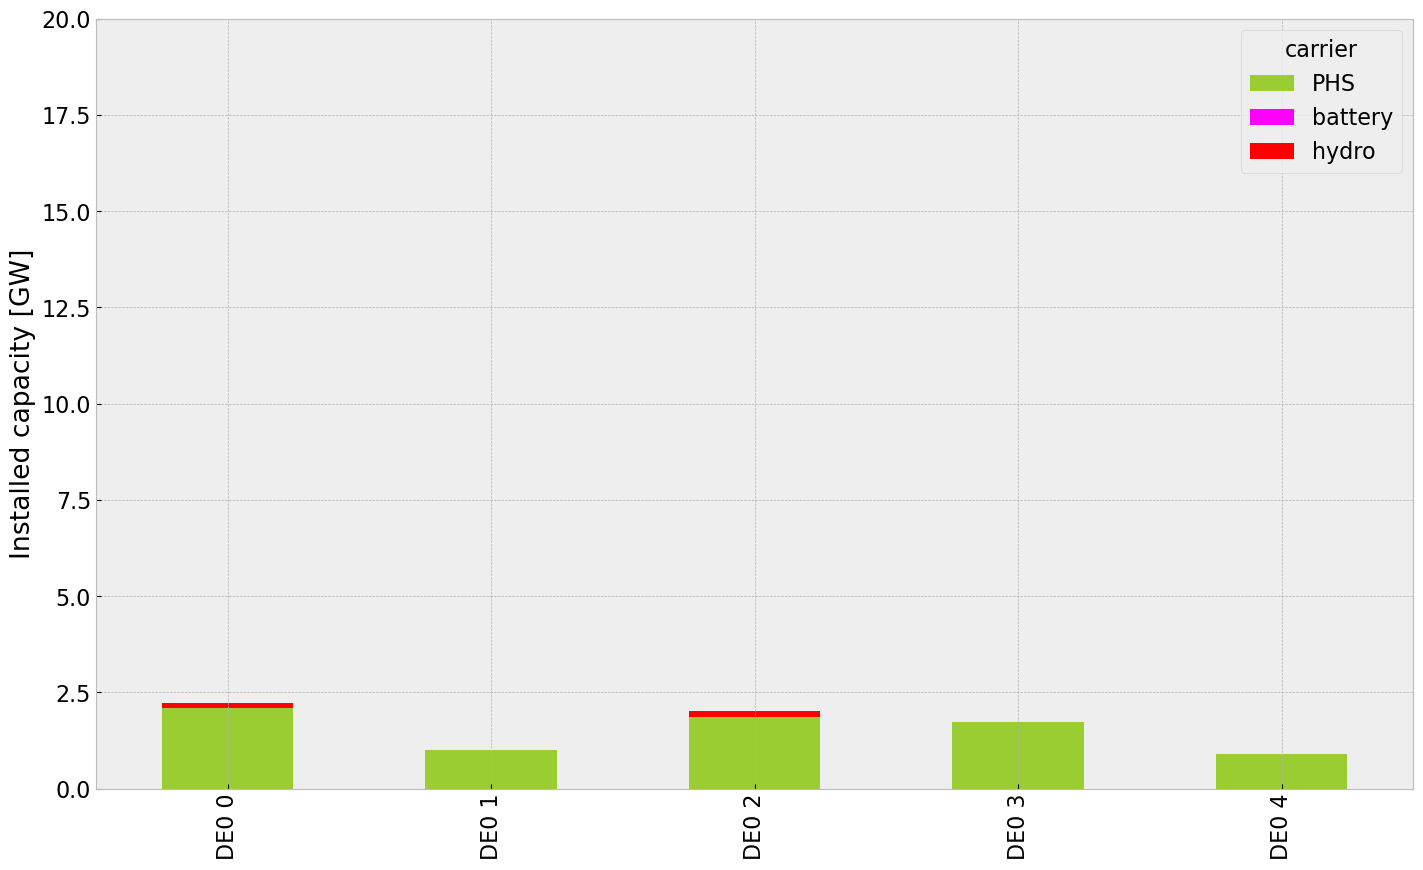

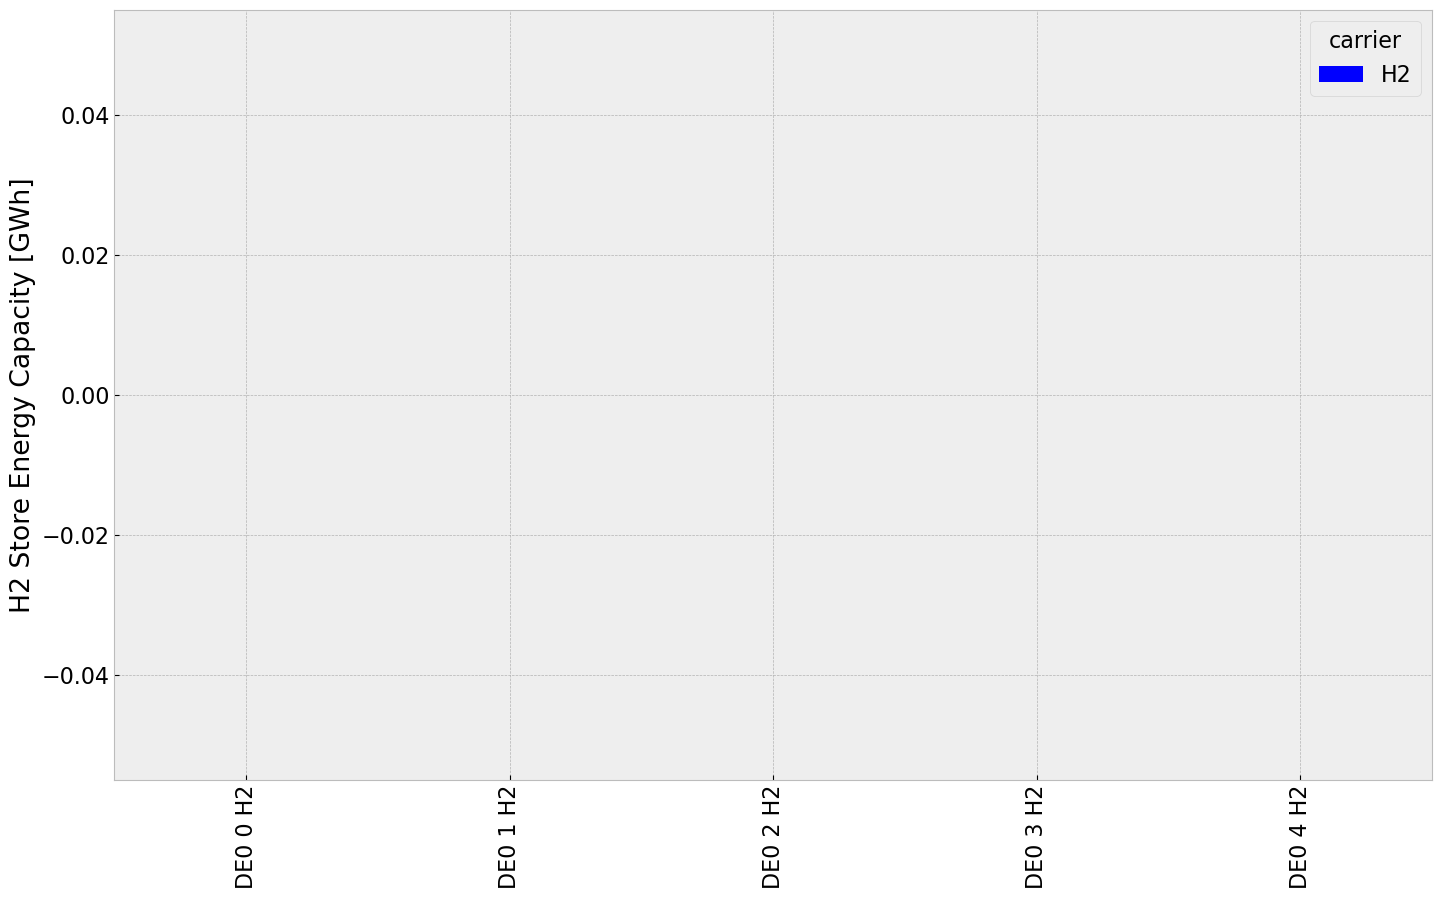

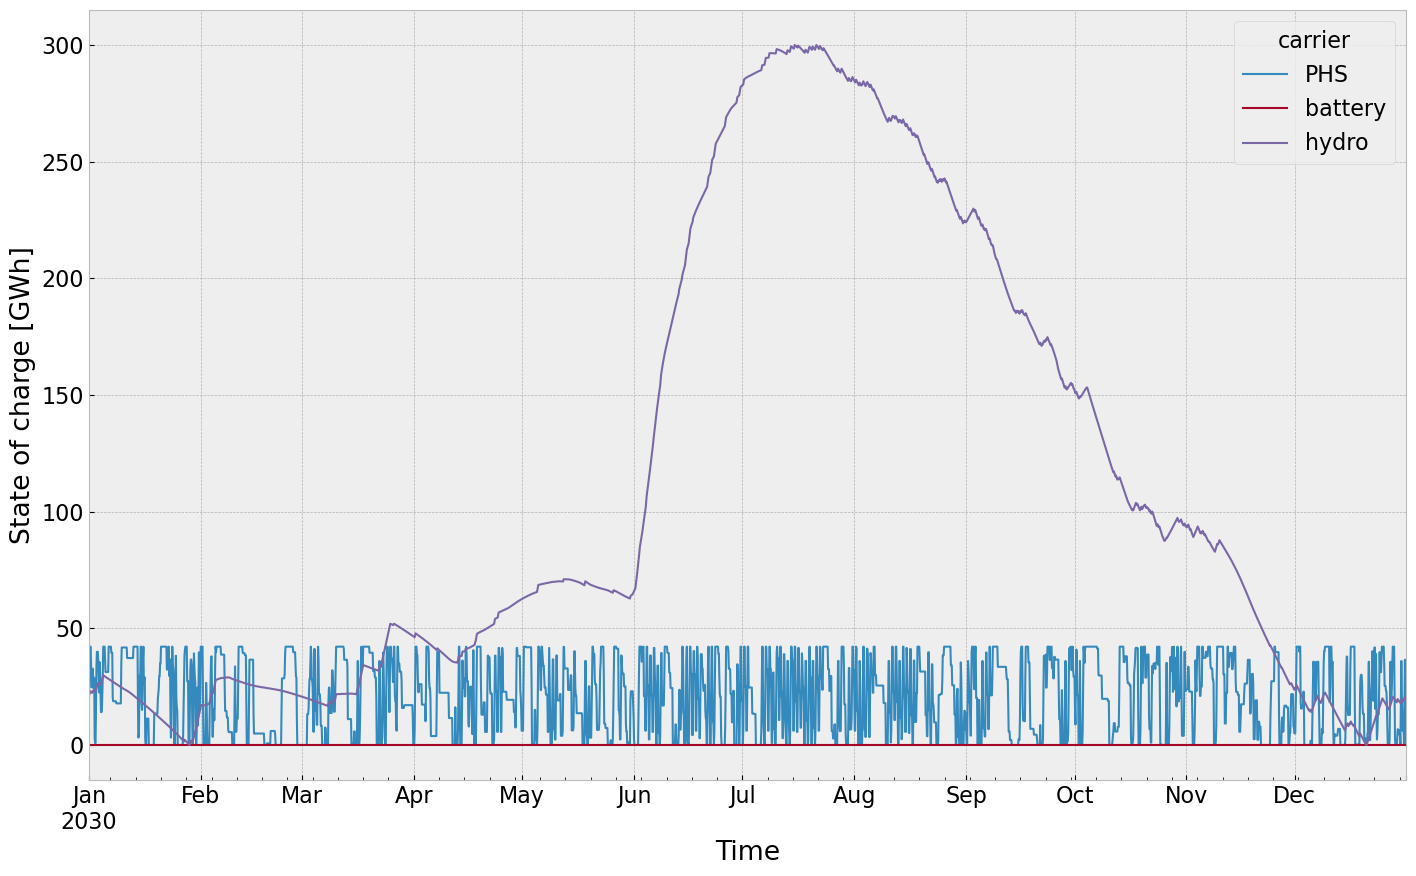

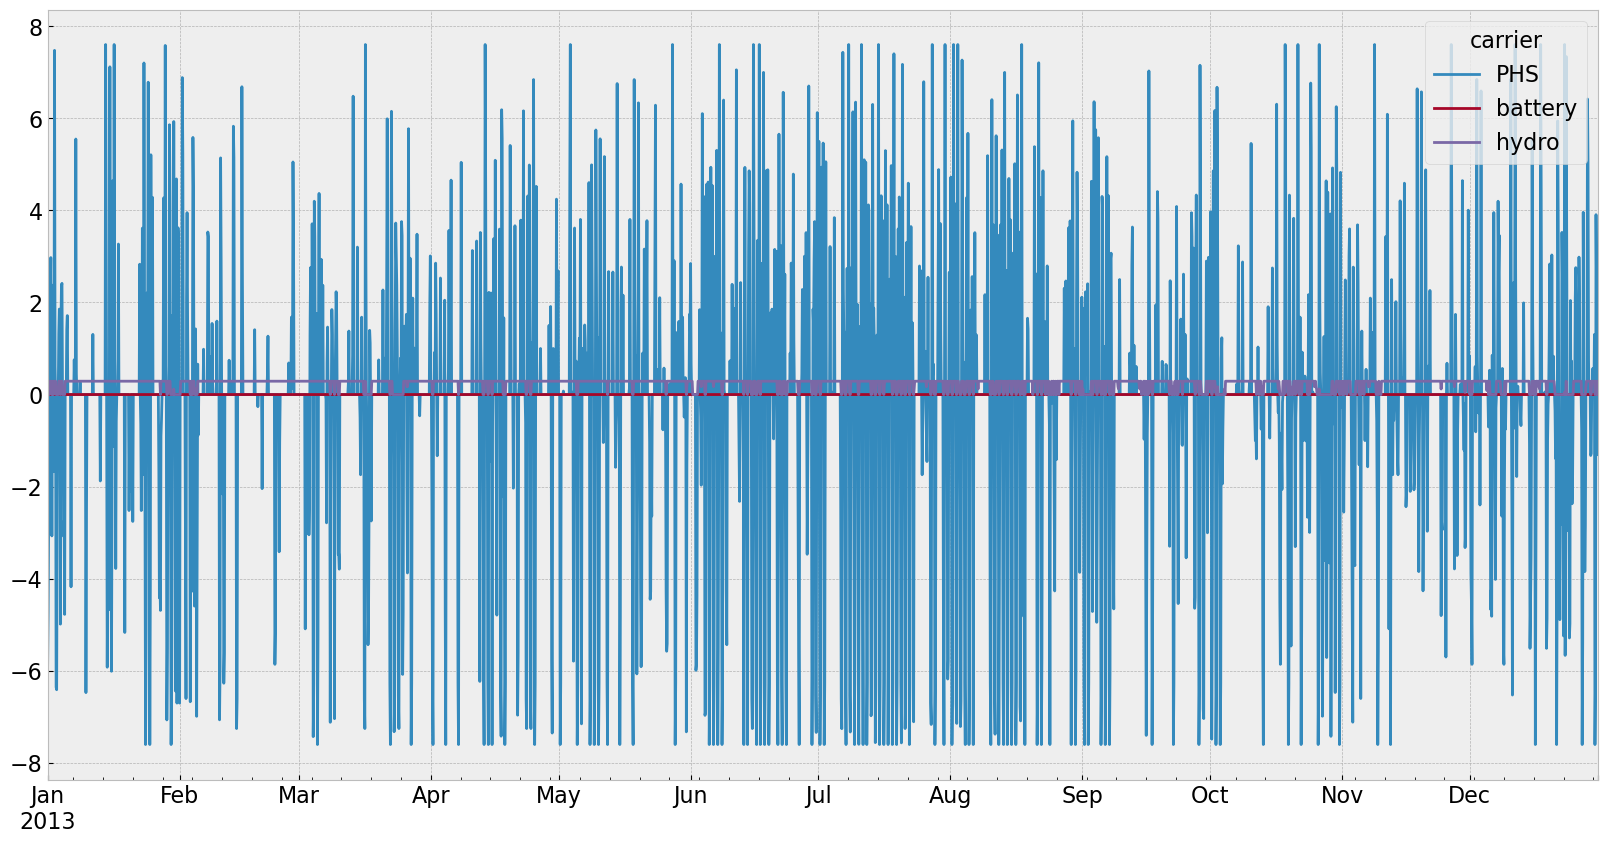

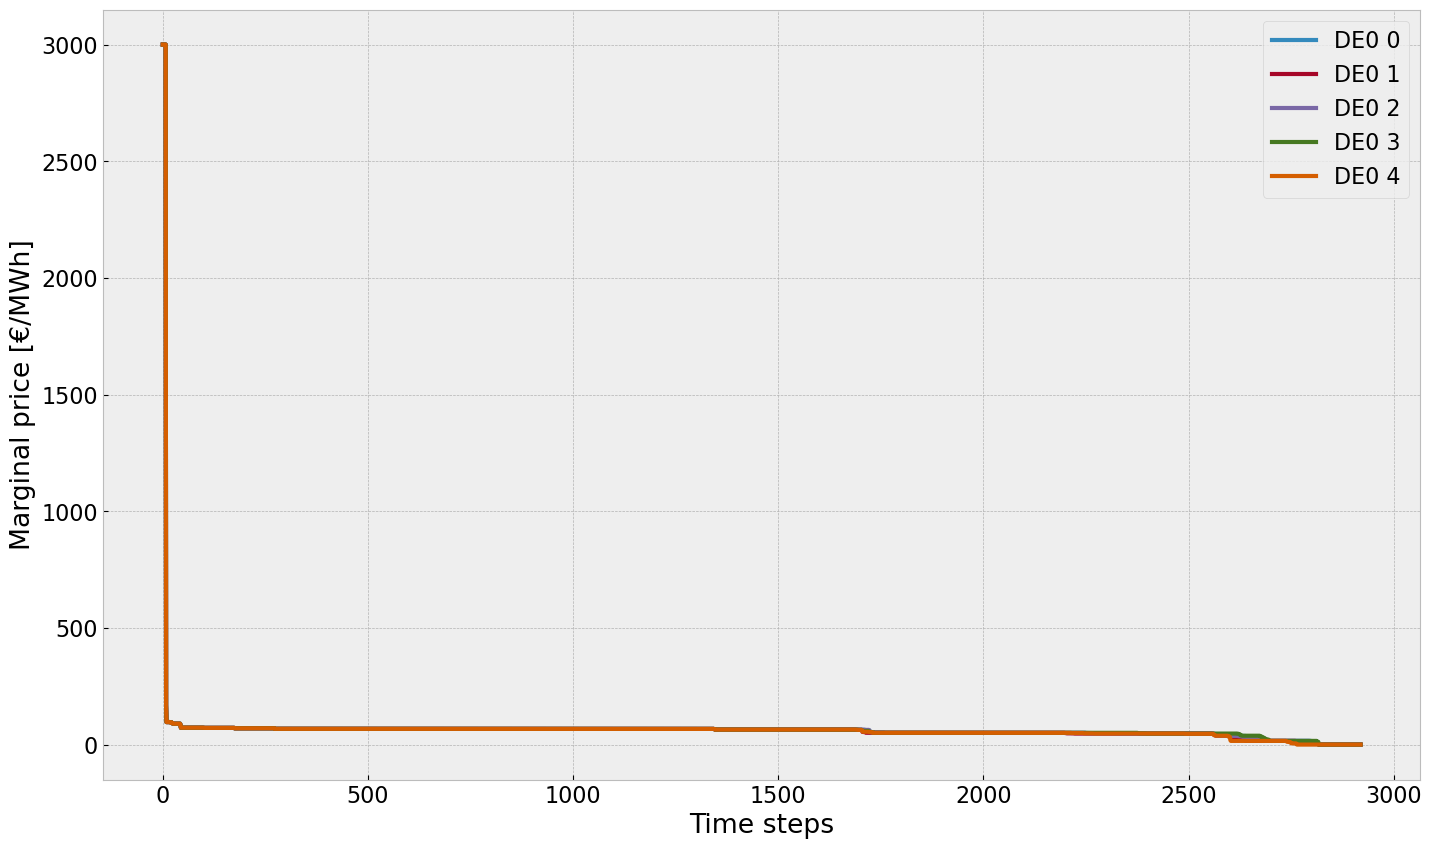

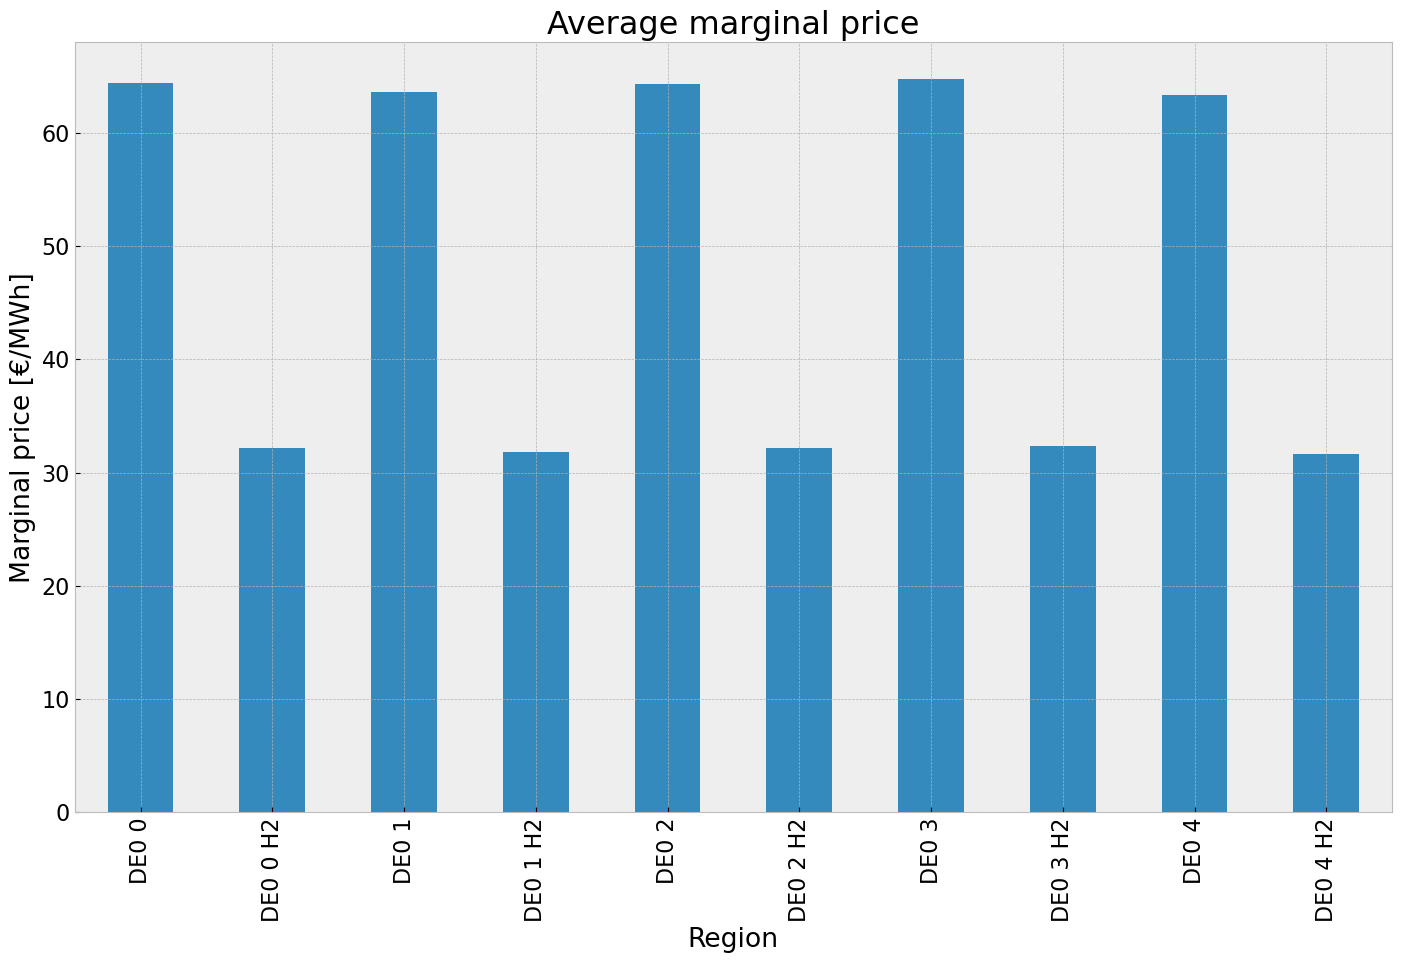

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


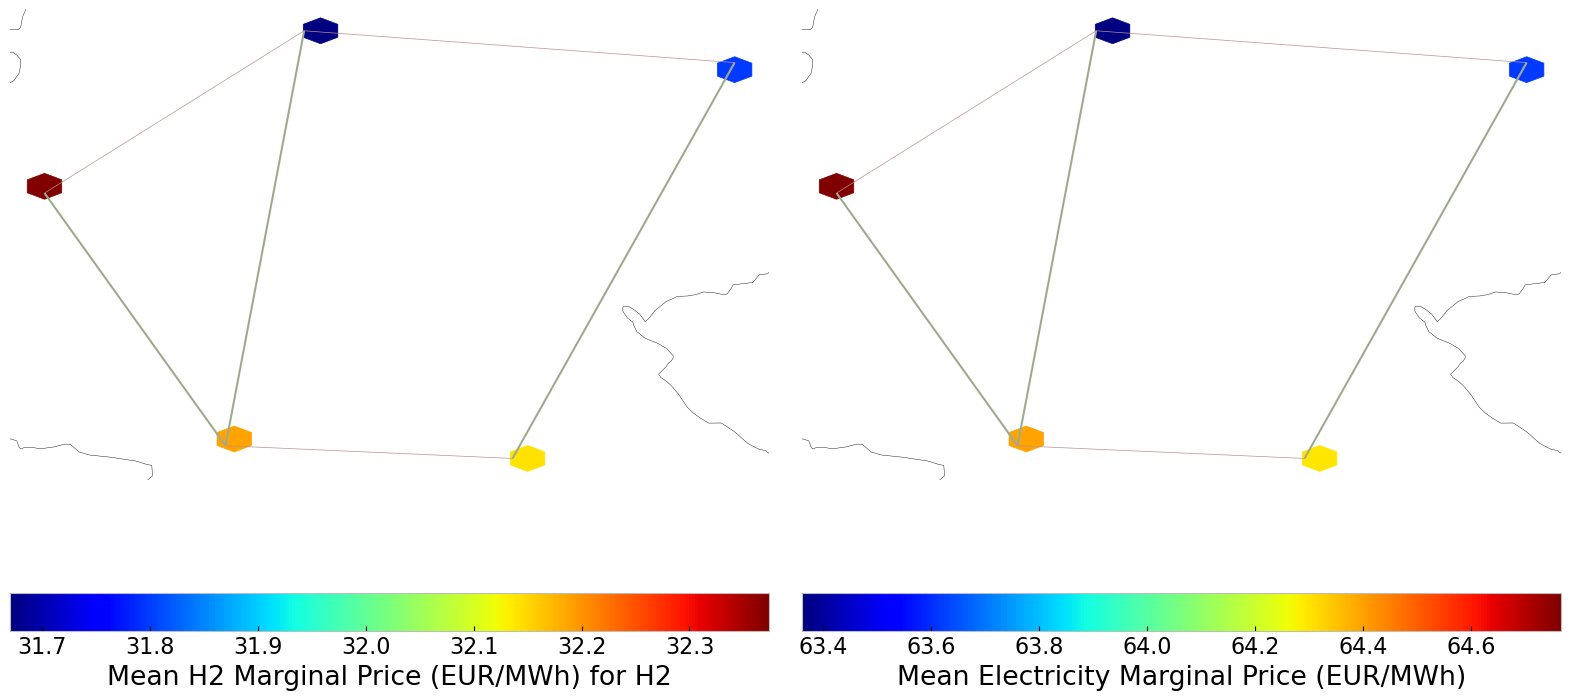

In [68]:
#storage unit & stores
inst_store_table(n2)
inst_storeh2_table(n2)
state_of_charge_plot(n2)
n2.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3).loc[pd.date_range(start="2013-01-01", end="2013-12-31",freq='3H')].plot(figsize=(20,10))
#price
price_dur_curve_plot(n2)
price_regions_table(n2)
price_regions(n2)
#emission
em_noinv =em_table(n2)
em_noinv

## 3. Scenario: rolling horizon foresight with no additional investment

In [96]:
n3= n2.copy()
horizon = 24
n3.global_constraints.loc['CO2Limit','constant']= n.global_constraints.loc['CO2Limit','constant']/(len(n3.snapshots)/horizon)
n3.optimize.create_model()
optimize.optimize_with_rolling_horizon(n3, horizon=horizon, overlap=0, solver_name='gurobi')

INFO:pypsa.optimization.abstract:Optimizing network for snapshot horizon [2013-01-01 00:00:00:2013-01-03 21:00:00] (1/122).
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_l985vo5.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_l985vo5.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x04ec9dd1


INFO:gurobipy:Model fingerprint: 0x04ec9dd1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1422 columns


INFO:gurobipy:Presolve removed 6281 rows and 1422 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 721 rows, 1903 columns, 4026 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1903 columns, 4026 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     487    9.2760572e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     487    9.2760572e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 487 iterations and 0.07 seconds (0.01 work units)


INFO:gurobipy:Solved in 487 iterations and 0.07 seconds (0.01 work units)


Optimal objective  9.276057196e+06


INFO:gurobipy:Optimal objective  9.276057196e+06
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 9.28e+06
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.28s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-rbgatex9.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-rbgatex9.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x6750c163


INFO:gurobipy:Model fingerprint: 0x6750c163


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1423 columns


INFO:gurobipy:Presolve removed 6281 rows and 1423 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1902 columns, 4025 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1902 columns, 4025 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     507    2.3864895e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     507    2.3864895e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 507 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 507 iterations and 0.06 seconds (0.01 work units)


Optimal objective  2.386489535e+07


INFO:gurobipy:Optimal objective  2.386489535e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.39e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-n_t17uw_.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-n_t17uw_.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x0e8ac321


INFO:gurobipy:Model fingerprint: 0x0e8ac321


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1432 columns


INFO:gurobipy:Presolve removed 6281 rows and 1432 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 721 rows, 1893 columns, 4016 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1893 columns, 4016 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     485    1.1740182e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     485    1.1740182e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 485 iterations and 0.08 seconds (0.01 work units)


INFO:gurobipy:Solved in 485 iterations and 0.08 seconds (0.01 work units)


Optimal objective  1.174018248e+09


INFO:gurobipy:Optimal objective  1.174018248e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 1.17e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.28s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-x9y6d58u.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-x9y6d58u.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x90816643


INFO:gurobipy:Model fingerprint: 0x90816643


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1436 columns


INFO:gurobipy:Presolve removed 6281 rows and 1436 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 721 rows, 1889 columns, 4012 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1889 columns, 4012 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     590    1.3677709e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     590    1.3677709e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 590 iterations and 0.07 seconds (0.01 work units)


INFO:gurobipy:Solved in 590 iterations and 0.07 seconds (0.01 work units)


Optimal objective  1.367770892e+08


INFO:gurobipy:Optimal objective  1.367770892e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 1.37e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.28s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-pkhj3cbd.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-pkhj3cbd.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xae72670a


INFO:gurobipy:Model fingerprint: 0xae72670a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1429 columns


INFO:gurobipy:Presolve removed 6281 rows and 1429 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 721 rows, 1896 columns, 4019 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1896 columns, 4019 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     517    1.5374225e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     517    1.5374225e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 517 iterations and 0.08 seconds (0.01 work units)


INFO:gurobipy:Solved in 517 iterations and 0.08 seconds (0.01 work units)


Optimal objective  1.537422463e+09


INFO:gurobipy:Optimal objective  1.537422463e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 1.54e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.28s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-u19vicf5.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-u19vicf5.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xfe6daa8b


INFO:gurobipy:Model fingerprint: 0xfe6daa8b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1426 columns


INFO:gurobipy:Presolve removed 6281 rows and 1426 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 721 rows, 1899 columns, 4022 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1899 columns, 4022 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     492    2.3400620e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     492    2.3400620e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 492 iterations and 0.09 seconds (0.01 work units)


INFO:gurobipy:Solved in 492 iterations and 0.09 seconds (0.01 work units)


Optimal objective  2.340062005e+09


INFO:gurobipy:Optimal objective  2.340062005e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.34e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.28s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6kf5hesw.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6kf5hesw.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x58e74761


INFO:gurobipy:Model fingerprint: 0x58e74761


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1430 columns


INFO:gurobipy:Presolve removed 6281 rows and 1430 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 721 rows, 1895 columns, 4018 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1895 columns, 4018 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     462    4.7992442e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     462    4.7992442e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 462 iterations and 0.07 seconds (0.01 work units)


INFO:gurobipy:Solved in 462 iterations and 0.07 seconds (0.01 work units)


Optimal objective  4.799244232e+07


INFO:gurobipy:Optimal objective  4.799244232e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 4.80e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-600t1v3k.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-600t1v3k.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x024ffaa8


INFO:gurobipy:Model fingerprint: 0x024ffaa8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1448 columns


INFO:gurobipy:Presolve removed 6281 rows and 1448 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1877 columns, 4000 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1877 columns, 4000 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     522    3.1444548e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     522    3.1444548e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 522 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 522 iterations and 0.05 seconds (0.01 work units)


Optimal objective  3.144454787e+09


INFO:gurobipy:Optimal objective  3.144454787e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 3.14e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.33s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-k9osiye7.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-k9osiye7.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x304003c8


INFO:gurobipy:Model fingerprint: 0x304003c8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1428 columns


INFO:gurobipy:Presolve removed 6281 rows and 1428 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 721 rows, 1897 columns, 4020 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1897 columns, 4020 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     502    6.0413044e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     502    6.0413044e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 502 iterations and 0.07 seconds (0.01 work units)


INFO:gurobipy:Solved in 502 iterations and 0.07 seconds (0.01 work units)


Optimal objective  6.041304450e+07


INFO:gurobipy:Optimal objective  6.041304450e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 6.04e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1o_7hoy7.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1o_7hoy7.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xaa24177e


INFO:gurobipy:Model fingerprint: 0xaa24177e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1415 columns


INFO:gurobipy:Presolve removed 6281 rows and 1415 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 721 rows, 1910 columns, 4033 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1910 columns, 4033 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     519    1.4275883e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     519    1.4275883e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 519 iterations and 0.08 seconds (0.01 work units)


INFO:gurobipy:Solved in 519 iterations and 0.08 seconds (0.01 work units)


Optimal objective  1.427588297e+07


INFO:gurobipy:Optimal objective  1.427588297e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 1.43e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4o_0dz5e.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4o_0dz5e.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x0fd710dc


INFO:gurobipy:Model fingerprint: 0x0fd710dc


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1412 columns


INFO:gurobipy:Presolve removed 6281 rows and 1412 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 721 rows, 1913 columns, 4036 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1913 columns, 4036 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     498    2.6297528e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     498    2.6297528e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 498 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 498 iterations and 0.06 seconds (0.01 work units)


Optimal objective  2.629752806e+07


INFO:gurobipy:Optimal objective  2.629752806e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.63e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ovyj6qaq.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ovyj6qaq.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x4b63c137


INFO:gurobipy:Model fingerprint: 0x4b63c137


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1408 columns


INFO:gurobipy:Presolve removed 6281 rows and 1408 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1917 columns, 4040 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1917 columns, 4040 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     526    1.3952362e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     526    1.3952362e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 526 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 526 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.395236154e+07


INFO:gurobipy:Optimal objective  1.395236154e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 1.40e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-8_0e_b04.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-8_0e_b04.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x7c9d3fef


INFO:gurobipy:Model fingerprint: 0x7c9d3fef


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1407 columns


INFO:gurobipy:Presolve removed 6281 rows and 1407 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1918 columns, 4041 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1918 columns, 4041 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     462    1.3153415e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     462    1.3153415e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 462 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 462 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.315341529e+09


INFO:gurobipy:Optimal objective  1.315341529e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 1.32e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ihiy9_ru.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ihiy9_ru.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xf5cb8ad5


INFO:gurobipy:Model fingerprint: 0xf5cb8ad5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1428 columns


INFO:gurobipy:Presolve removed 6281 rows and 1428 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1897 columns, 4020 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1897 columns, 4020 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     523    5.0742405e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     523    5.0742405e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 523 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 523 iterations and 0.05 seconds (0.01 work units)


Optimal objective  5.074240544e+07


INFO:gurobipy:Optimal objective  5.074240544e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 5.07e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5rcbg16j.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5rcbg16j.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x997186de


INFO:gurobipy:Model fingerprint: 0x997186de


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1420 columns


INFO:gurobipy:Presolve removed 6281 rows and 1420 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1905 columns, 4028 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1905 columns, 4028 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     489    1.0824750e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     489    1.0824750e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 489 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 489 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.082475005e+09


INFO:gurobipy:Optimal objective  1.082475005e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 1.08e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-8m43r59k.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-8m43r59k.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x92bdf163


INFO:gurobipy:Model fingerprint: 0x92bdf163


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1456 columns


INFO:gurobipy:Presolve removed 6281 rows and 1456 columns


Presolve time: 0.09s


INFO:gurobipy:Presolve time: 0.09s


Presolved: 721 rows, 1869 columns, 3992 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1869 columns, 3992 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     466    1.1564722e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     466    1.1564722e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 466 iterations and 0.11 seconds (0.01 work units)


INFO:gurobipy:Solved in 466 iterations and 0.11 seconds (0.01 work units)


Optimal objective  1.156472182e+09


INFO:gurobipy:Optimal objective  1.156472182e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 1.16e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1maccw7e.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1maccw7e.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x94457b60


INFO:gurobipy:Model fingerprint: 0x94457b60


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1422 columns


INFO:gurobipy:Presolve removed 6281 rows and 1422 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1903 columns, 4026 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1903 columns, 4026 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     485    1.1349671e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     485    1.1349671e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 485 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 485 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.134967127e+08


INFO:gurobipy:Optimal objective  1.134967127e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 1.13e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-bianr1b_.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-bianr1b_.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x67ca1f92


INFO:gurobipy:Model fingerprint: 0x67ca1f92


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1404 columns


INFO:gurobipy:Presolve removed 6281 rows and 1404 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 721 rows, 1921 columns, 4044 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1921 columns, 4044 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     453    6.7869340e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     453    6.7869340e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 453 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 453 iterations and 0.06 seconds (0.01 work units)


Optimal objective  6.786934050e+07


INFO:gurobipy:Optimal objective  6.786934050e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 6.79e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ue1l72b1.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ue1l72b1.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xd79bcf19


INFO:gurobipy:Model fingerprint: 0xd79bcf19


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1410 columns


INFO:gurobipy:Presolve removed 6281 rows and 1410 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1915 columns, 4038 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1915 columns, 4038 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     469    9.1100938e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     469    9.1100938e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 469 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 469 iterations and 0.06 seconds (0.01 work units)


Optimal objective  9.110093795e+07


INFO:gurobipy:Optimal objective  9.110093795e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 9.11e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-a31q1krh.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-a31q1krh.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x1b514ef4


INFO:gurobipy:Model fingerprint: 0x1b514ef4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1424 columns


INFO:gurobipy:Presolve removed 6281 rows and 1424 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1901 columns, 4024 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1901 columns, 4024 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     491    2.0151146e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     491    2.0151146e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 491 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 491 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.015114559e+09


INFO:gurobipy:Optimal objective  2.015114559e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.02e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-789g6yu1.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-789g6yu1.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x3b19f779


INFO:gurobipy:Model fingerprint: 0x3b19f779


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1422 columns


INFO:gurobipy:Presolve removed 6281 rows and 1422 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1903 columns, 4026 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1903 columns, 4026 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     525    3.5734059e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     525    3.5734059e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 525 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 525 iterations and 0.05 seconds (0.01 work units)


Optimal objective  3.573405938e+07


INFO:gurobipy:Optimal objective  3.573405938e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 3.57e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-qjfkogjt.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-qjfkogjt.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x598cdaf2


INFO:gurobipy:Model fingerprint: 0x598cdaf2


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1417 columns


INFO:gurobipy:Presolve removed 6281 rows and 1417 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1908 columns, 4031 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1908 columns, 4031 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     482    5.3060851e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     482    5.3060851e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 482 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 482 iterations and 0.05 seconds (0.01 work units)


Optimal objective  5.306085065e+07


INFO:gurobipy:Optimal objective  5.306085065e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 5.31e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-33zd6b2h.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-33zd6b2h.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x7fa6ed1f


INFO:gurobipy:Model fingerprint: 0x7fa6ed1f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1406 columns


INFO:gurobipy:Presolve removed 6281 rows and 1406 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1919 columns, 4042 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1919 columns, 4042 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     461    1.3395290e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     461    1.3395290e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 461 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 461 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.339528959e+07


INFO:gurobipy:Optimal objective  1.339528959e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 1.34e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-dex_8log.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-dex_8log.lp


Reading time = 0.08 seconds


INFO:gurobipy:Reading time = 0.08 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x0b4ca8d3


INFO:gurobipy:Model fingerprint: 0x0b4ca8d3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1408 columns


INFO:gurobipy:Presolve removed 6281 rows and 1408 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1917 columns, 4040 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1917 columns, 4040 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     446    8.1581307e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     446    8.1581307e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 446 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 446 iterations and 0.05 seconds (0.01 work units)


Optimal objective  8.158130669e+08


INFO:gurobipy:Optimal objective  8.158130669e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 8.16e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-pimapbnn.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-pimapbnn.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xda0b1b8e


INFO:gurobipy:Model fingerprint: 0xda0b1b8e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1412 columns


INFO:gurobipy:Presolve removed 6281 rows and 1412 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1913 columns, 4036 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1913 columns, 4036 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     495    6.1711335e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     495    6.1711335e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 495 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 495 iterations and 0.05 seconds (0.01 work units)


Optimal objective  6.171133530e+07


INFO:gurobipy:Optimal objective  6.171133530e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 6.17e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5tyoutl8.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5tyoutl8.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xcd44b698


INFO:gurobipy:Model fingerprint: 0xcd44b698


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1408 columns


INFO:gurobipy:Presolve removed 6281 rows and 1408 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1917 columns, 4040 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1917 columns, 4040 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     486    2.9904265e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     486    2.9904265e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 486 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 486 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.990426474e+07


INFO:gurobipy:Optimal objective  2.990426474e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.99e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.3s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-u7dr0_ij.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-u7dr0_ij.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x3dd800d5


INFO:gurobipy:Model fingerprint: 0x3dd800d5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1408 columns


INFO:gurobipy:Presolve removed 6281 rows and 1408 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1917 columns, 4040 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1917 columns, 4040 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     514    8.8641372e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     514    8.8641372e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 514 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 514 iterations and 0.05 seconds (0.01 work units)


Optimal objective  8.864137193e+07


INFO:gurobipy:Optimal objective  8.864137193e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 8.86e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-gmgj8zq6.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-gmgj8zq6.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xb2c59593


INFO:gurobipy:Model fingerprint: 0xb2c59593


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1404 columns


INFO:gurobipy:Presolve removed 6281 rows and 1404 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1921 columns, 4044 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1921 columns, 4044 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     544    3.9603071e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     544    3.9603071e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 544 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 544 iterations and 0.05 seconds (0.01 work units)


Optimal objective  3.960307068e+06


INFO:gurobipy:Optimal objective  3.960307068e+06
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 3.96e+06
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-j0oem4ik.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-j0oem4ik.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x62747f49


INFO:gurobipy:Model fingerprint: 0x62747f49


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1406 columns


INFO:gurobipy:Presolve removed 6281 rows and 1406 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1919 columns, 4042 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1919 columns, 4042 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     541    3.9411751e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     541    3.9411751e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 541 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 541 iterations and 0.06 seconds (0.01 work units)


Optimal objective  3.941175122e+07


INFO:gurobipy:Optimal objective  3.941175122e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 3.94e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-t4obmbrj.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-t4obmbrj.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x379dc1ae


INFO:gurobipy:Model fingerprint: 0x379dc1ae


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1415 columns


INFO:gurobipy:Presolve removed 6281 rows and 1415 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1910 columns, 4033 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1910 columns, 4033 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     456    5.3916879e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     456    5.3916879e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 456 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 456 iterations and 0.05 seconds (0.01 work units)


Optimal objective  5.391687871e+07


INFO:gurobipy:Optimal objective  5.391687871e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 5.39e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-opl8cbsg.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-opl8cbsg.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x38ac7b5e


INFO:gurobipy:Model fingerprint: 0x38ac7b5e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1404 columns


INFO:gurobipy:Presolve removed 6281 rows and 1404 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1921 columns, 4044 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1921 columns, 4044 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     471    4.5251081e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     471    4.5251081e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 471 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 471 iterations and 0.05 seconds (0.01 work units)


Optimal objective  4.525108109e+07


INFO:gurobipy:Optimal objective  4.525108109e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 4.53e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-g2siwfjh.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-g2siwfjh.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xd7c858f1


INFO:gurobipy:Model fingerprint: 0xd7c858f1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1405 columns


INFO:gurobipy:Presolve removed 6281 rows and 1405 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1920 columns, 4043 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1920 columns, 4043 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     456    9.9613231e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     456    9.9613231e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 456 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 456 iterations and 0.06 seconds (0.01 work units)


Optimal objective  9.961323120e+07


INFO:gurobipy:Optimal objective  9.961323120e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 9.96e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ybmn8qbt.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ybmn8qbt.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x9ae20303


INFO:gurobipy:Model fingerprint: 0x9ae20303


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1413 columns


INFO:gurobipy:Presolve removed 6281 rows and 1413 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 721 rows, 1912 columns, 4035 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1912 columns, 4035 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     470    4.7741892e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     470    4.7741892e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 470 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 470 iterations and 0.06 seconds (0.01 work units)


Optimal objective  4.774189243e+07


INFO:gurobipy:Optimal objective  4.774189243e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 4.77e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ad7g5j_6.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ad7g5j_6.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x937d5329


INFO:gurobipy:Model fingerprint: 0x937d5329


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1404 columns


INFO:gurobipy:Presolve removed 6281 rows and 1404 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1921 columns, 4044 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1921 columns, 4044 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     422    7.6348609e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     422    7.6348609e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 422 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 422 iterations and 0.05 seconds (0.01 work units)


Optimal objective  7.634860896e+07


INFO:gurobipy:Optimal objective  7.634860896e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 7.63e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-i5glsn_x.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-i5glsn_x.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x328771be


INFO:gurobipy:Model fingerprint: 0x328771be


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1407 columns


INFO:gurobipy:Presolve removed 6281 rows and 1407 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1918 columns, 4041 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1918 columns, 4041 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     437    1.9064565e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     437    1.9064565e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 437 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 437 iterations and 0.06 seconds (0.01 work units)


Optimal objective  1.906456460e+07


INFO:gurobipy:Optimal objective  1.906456460e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 1.91e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-jv77bgqn.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-jv77bgqn.lp


Reading time = 0.08 seconds


INFO:gurobipy:Reading time = 0.08 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x6db84aec


INFO:gurobipy:Model fingerprint: 0x6db84aec


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1414 columns


INFO:gurobipy:Presolve removed 6281 rows and 1414 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1911 columns, 4034 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1911 columns, 4034 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     379    2.8735489e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     379    2.8735489e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 379 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 379 iterations and 0.04 seconds (0.01 work units)


Optimal objective  2.873548899e+07


INFO:gurobipy:Optimal objective  2.873548899e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.87e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ngx_gard.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ngx_gard.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x46037338


INFO:gurobipy:Model fingerprint: 0x46037338


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1412 columns


INFO:gurobipy:Presolve removed 6281 rows and 1412 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1913 columns, 4036 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1913 columns, 4036 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     426    2.9686823e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     426    2.9686823e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 426 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 426 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.968682271e+07


INFO:gurobipy:Optimal objective  2.968682271e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.97e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-44wckw4k.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-44wckw4k.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x89a8d6a4


INFO:gurobipy:Model fingerprint: 0x89a8d6a4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1420 columns


INFO:gurobipy:Presolve removed 6281 rows and 1420 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1905 columns, 4028 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1905 columns, 4028 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     471    3.8581589e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     471    3.8581589e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 471 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 471 iterations and 0.04 seconds (0.01 work units)


Optimal objective  3.858158932e+07


INFO:gurobipy:Optimal objective  3.858158932e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 3.86e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-059ys11p.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-059ys11p.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xc517184d


INFO:gurobipy:Model fingerprint: 0xc517184d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1418 columns


INFO:gurobipy:Presolve removed 6281 rows and 1418 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1907 columns, 4030 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1907 columns, 4030 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     397    5.8830961e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     397    5.8830961e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 397 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 397 iterations and 0.06 seconds (0.01 work units)


Optimal objective  5.883096060e+07


INFO:gurobipy:Optimal objective  5.883096060e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 5.88e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-h1ln_2qt.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-h1ln_2qt.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xc7033268


INFO:gurobipy:Model fingerprint: 0xc7033268


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1415 columns


INFO:gurobipy:Presolve removed 6281 rows and 1415 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1910 columns, 4033 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1910 columns, 4033 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     403    5.1007340e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     403    5.1007340e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 403 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 403 iterations and 0.06 seconds (0.01 work units)


Optimal objective  5.100734027e+07


INFO:gurobipy:Optimal objective  5.100734027e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 5.10e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-fwezhggn.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-fwezhggn.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x10d8fb00


INFO:gurobipy:Model fingerprint: 0x10d8fb00


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1404 columns


INFO:gurobipy:Presolve removed 6281 rows and 1404 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1921 columns, 4044 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1921 columns, 4044 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     403    6.3885605e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     403    6.3885605e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 403 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 403 iterations and 0.06 seconds (0.01 work units)


Optimal objective  6.388560547e+07


INFO:gurobipy:Optimal objective  6.388560547e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 6.39e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-xiwfhp55.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-xiwfhp55.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x9bfc7499


INFO:gurobipy:Model fingerprint: 0x9bfc7499


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1413 columns


INFO:gurobipy:Presolve removed 6281 rows and 1413 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1912 columns, 4035 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1912 columns, 4035 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     472    3.3149788e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     472    3.3149788e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 472 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 472 iterations and 0.06 seconds (0.01 work units)


Optimal objective  3.314978812e+07


INFO:gurobipy:Optimal objective  3.314978812e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 3.31e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-zpbj5nno.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-zpbj5nno.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x87cb36a0


INFO:gurobipy:Model fingerprint: 0x87cb36a0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1408 columns


INFO:gurobipy:Presolve removed 6281 rows and 1408 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1917 columns, 4040 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1917 columns, 4040 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     514    5.0141115e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     514    5.0141115e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 514 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 514 iterations and 0.06 seconds (0.01 work units)


Optimal objective  5.014111517e+07


INFO:gurobipy:Optimal objective  5.014111517e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 5.01e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.28s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-hcrn1sox.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-hcrn1sox.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xacf4d4e5


INFO:gurobipy:Model fingerprint: 0xacf4d4e5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1399 columns


INFO:gurobipy:Presolve removed 6281 rows and 1399 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 721 rows, 1926 columns, 4049 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1926 columns, 4049 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     438    2.4344723e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     438    2.4344723e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 438 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 438 iterations and 0.06 seconds (0.01 work units)


Optimal objective  2.434472266e+07


INFO:gurobipy:Optimal objective  2.434472266e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.43e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-f_i8utt_.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-f_i8utt_.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x5489df72


INFO:gurobipy:Model fingerprint: 0x5489df72


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1392 columns


INFO:gurobipy:Presolve removed 6281 rows and 1392 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 721 rows, 1933 columns, 4056 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1933 columns, 4056 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     574    3.4406473e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     574    3.4406473e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 574 iterations and 0.07 seconds (0.01 work units)


INFO:gurobipy:Solved in 574 iterations and 0.07 seconds (0.01 work units)


Optimal objective  3.440647251e+07


INFO:gurobipy:Optimal objective  3.440647251e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 3.44e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.28s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-gyan22wv.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-gyan22wv.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xa0bf1276


INFO:gurobipy:Model fingerprint: 0xa0bf1276


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1396 columns


INFO:gurobipy:Presolve removed 6281 rows and 1396 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1929 columns, 4052 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1929 columns, 4052 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     498    5.6020079e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     498    5.6020079e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 498 iterations and 0.07 seconds (0.01 work units)


INFO:gurobipy:Solved in 498 iterations and 0.07 seconds (0.01 work units)


Optimal objective  5.602007895e+07


INFO:gurobipy:Optimal objective  5.602007895e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 5.60e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-gdzhpvih.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-gdzhpvih.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xbf8c333c


INFO:gurobipy:Model fingerprint: 0xbf8c333c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1391 columns


INFO:gurobipy:Presolve removed 6281 rows and 1391 columns


Presolve time: 0.04s


INFO:gurobipy:Presolve time: 0.04s


Presolved: 721 rows, 1934 columns, 4057 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1934 columns, 4057 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     530    3.1994061e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     530    3.1994061e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 530 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 530 iterations and 0.06 seconds (0.01 work units)


Optimal objective  3.199406085e+07


INFO:gurobipy:Optimal objective  3.199406085e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 3.20e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-iqx642r7.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-iqx642r7.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x390617e9


INFO:gurobipy:Model fingerprint: 0x390617e9


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1406 columns


INFO:gurobipy:Presolve removed 6281 rows and 1406 columns


Presolve time: 0.05s


INFO:gurobipy:Presolve time: 0.05s


Presolved: 721 rows, 1919 columns, 4042 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1919 columns, 4042 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     470    5.9467629e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     470    5.9467629e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 470 iterations and 0.07 seconds (0.01 work units)


INFO:gurobipy:Solved in 470 iterations and 0.07 seconds (0.01 work units)


Optimal objective  5.946762946e+07


INFO:gurobipy:Optimal objective  5.946762946e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 5.95e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9rhse5ku.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9rhse5ku.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xbf3ae04e


INFO:gurobipy:Model fingerprint: 0xbf3ae04e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1403 columns


INFO:gurobipy:Presolve removed 6281 rows and 1403 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1922 columns, 4045 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1922 columns, 4045 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     454    2.6290908e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     454    2.6290908e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 454 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 454 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.629090766e+07


INFO:gurobipy:Optimal objective  2.629090766e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.63e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-w16_33zr.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-w16_33zr.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x5d593a46


INFO:gurobipy:Model fingerprint: 0x5d593a46


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1415 columns


INFO:gurobipy:Presolve removed 6281 rows and 1415 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1910 columns, 4033 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1910 columns, 4033 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     491    5.9751658e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     491    5.9751658e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 491 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 491 iterations and 0.05 seconds (0.01 work units)


Optimal objective  5.975165794e+07


INFO:gurobipy:Optimal objective  5.975165794e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 5.98e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-lozvs47w.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-lozvs47w.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x215cf001


INFO:gurobipy:Model fingerprint: 0x215cf001


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 4e+02]


INFO:gurobipy:  Bounds range     [1e+02, 4e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1395 columns


INFO:gurobipy:Presolve removed 6281 rows and 1395 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1930 columns, 4053 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1930 columns, 4053 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     389    7.9000917e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     389    7.9000917e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 389 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 389 iterations and 0.05 seconds (0.01 work units)


Optimal objective  7.900091678e+06


INFO:gurobipy:Optimal objective  7.900091678e+06
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 7.90e+06
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ywtadzza.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ywtadzza.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x947c322b


INFO:gurobipy:Model fingerprint: 0x947c322b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 5e+02]


INFO:gurobipy:  Bounds range     [3e+02, 5e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1393 columns


INFO:gurobipy:Presolve removed 6281 rows and 1393 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1932 columns, 4055 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1932 columns, 4055 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     429    2.7098604e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     429    2.7098604e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 429 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 429 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.709860377e+07


INFO:gurobipy:Optimal objective  2.709860377e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.71e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-92c36al7.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-92c36al7.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x87bb69ac


INFO:gurobipy:Model fingerprint: 0x87bb69ac


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [3e+02, 5e+02]


INFO:gurobipy:  Bounds range     [3e+02, 5e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1410 columns


INFO:gurobipy:Presolve removed 6281 rows and 1410 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1915 columns, 4038 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1915 columns, 4038 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     433    3.0978829e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     433    3.0978829e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 433 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 433 iterations and 0.04 seconds (0.01 work units)


Optimal objective  3.097882857e+07


INFO:gurobipy:Optimal objective  3.097882857e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 3.10e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-28mu2igk.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-28mu2igk.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x14d99467


INFO:gurobipy:Model fingerprint: 0x14d99467


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 4e+02]


INFO:gurobipy:  Bounds range     [2e+02, 4e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1410 columns


INFO:gurobipy:Presolve removed 6281 rows and 1410 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1915 columns, 4038 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1915 columns, 4038 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     404    6.6908193e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     404    6.6908193e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 404 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 404 iterations and 0.05 seconds (0.01 work units)


Optimal objective  6.690819292e+07


INFO:gurobipy:Optimal objective  6.690819292e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 6.69e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-7n9_urmn.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-7n9_urmn.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x664dbabe


INFO:gurobipy:Model fingerprint: 0x664dbabe


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 3e+02]


INFO:gurobipy:  Bounds range     [2e+02, 3e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1404 columns


INFO:gurobipy:Presolve removed 6281 rows and 1404 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1921 columns, 4044 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1921 columns, 4044 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     419    2.6456936e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     419    2.6456936e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 419 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 419 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.645693611e+07


INFO:gurobipy:Optimal objective  2.645693611e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.65e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-97fpt_l5.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-97fpt_l5.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x5fe3e5b5


INFO:gurobipy:Model fingerprint: 0x5fe3e5b5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 3e+02]


INFO:gurobipy:  Bounds range     [2e+02, 3e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1390 columns


INFO:gurobipy:Presolve removed 6281 rows and 1390 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1935 columns, 4058 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1935 columns, 4058 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     410    1.9196010e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     410    1.9196010e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 410 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 410 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.919601039e+07


INFO:gurobipy:Optimal objective  1.919601039e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 1.92e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-q_mq099h.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-q_mq099h.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x9e38a898


INFO:gurobipy:Model fingerprint: 0x9e38a898


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 3e+02]


INFO:gurobipy:  Bounds range     [2e+02, 3e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1400 columns


INFO:gurobipy:Presolve removed 6281 rows and 1400 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1925 columns, 4048 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1925 columns, 4048 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     495    4.5276791e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     495    4.5276791e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 495 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 495 iterations and 0.05 seconds (0.01 work units)


Optimal objective  4.527679148e+07


INFO:gurobipy:Optimal objective  4.527679148e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 4.53e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6lvytaab.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6lvytaab.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x78c73b3e


INFO:gurobipy:Model fingerprint: 0x78c73b3e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 3e+02]


INFO:gurobipy:  Bounds range     [2e+02, 3e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1386 columns


INFO:gurobipy:Presolve removed 6281 rows and 1386 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1939 columns, 4062 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1939 columns, 4062 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     395    9.5429740e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     395    9.5429740e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 395 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 395 iterations and 0.05 seconds (0.01 work units)


Optimal objective  9.542974024e+06


INFO:gurobipy:Optimal objective  9.542974024e+06
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 9.54e+06
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ragvprlx.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ragvprlx.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x7c339cd7


INFO:gurobipy:Model fingerprint: 0x7c339cd7


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 3e+02]


INFO:gurobipy:  Bounds range     [2e+02, 3e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1389 columns


INFO:gurobipy:Presolve removed 6281 rows and 1389 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1936 columns, 4059 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1936 columns, 4059 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     471    2.7096984e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     471    2.7096984e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 471 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 471 iterations and 0.06 seconds (0.01 work units)


Optimal objective  2.709698410e+07


INFO:gurobipy:Optimal objective  2.709698410e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.71e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-h3vicpgw.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-h3vicpgw.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xabdd5c39


INFO:gurobipy:Model fingerprint: 0xabdd5c39


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [2e+02, 3e+02]


INFO:gurobipy:  Bounds range     [2e+02, 3e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1399 columns


INFO:gurobipy:Presolve removed 6281 rows and 1399 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1926 columns, 4049 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1926 columns, 4049 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     397    2.8437606e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     397    2.8437606e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 397 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 397 iterations and 0.04 seconds (0.01 work units)


Optimal objective  2.843760637e+07


INFO:gurobipy:Optimal objective  2.843760637e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.84e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-049iir9w.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-049iir9w.lp


Reading time = 0.08 seconds


INFO:gurobipy:Reading time = 0.08 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x2ae2e3b6


INFO:gurobipy:Model fingerprint: 0x2ae2e3b6


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1402 columns


INFO:gurobipy:Presolve removed 6281 rows and 1402 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1923 columns, 4046 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1923 columns, 4046 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     409    2.7415960e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     409    2.7415960e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 409 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 409 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.741595986e+07


INFO:gurobipy:Optimal objective  2.741595986e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.74e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-48jwf52o.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-48jwf52o.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xa95ecfef


INFO:gurobipy:Model fingerprint: 0xa95ecfef


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1404 columns


INFO:gurobipy:Presolve removed 6281 rows and 1404 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1921 columns, 4044 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1921 columns, 4044 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     408    8.4164708e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     408    8.4164708e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 408 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 408 iterations and 0.05 seconds (0.01 work units)


Optimal objective  8.416470761e+07


INFO:gurobipy:Optimal objective  8.416470761e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 8.42e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-sg71b04e.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-sg71b04e.lp


Reading time = 0.08 seconds


INFO:gurobipy:Reading time = 0.08 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x8981b9cc


INFO:gurobipy:Model fingerprint: 0x8981b9cc


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1397 columns


INFO:gurobipy:Presolve removed 6281 rows and 1397 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1928 columns, 4051 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1928 columns, 4051 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     404    2.3192558e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     404    2.3192558e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 404 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 404 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.319255822e+07


INFO:gurobipy:Optimal objective  2.319255822e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.32e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ijmrsdi7.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ijmrsdi7.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xf0013acc


INFO:gurobipy:Model fingerprint: 0xf0013acc


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1389 columns


INFO:gurobipy:Presolve removed 6281 rows and 1389 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1936 columns, 4059 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1936 columns, 4059 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     475    3.0924854e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     475    3.0924854e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 475 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 475 iterations and 0.04 seconds (0.01 work units)


Optimal objective  3.092485445e+07


INFO:gurobipy:Optimal objective  3.092485445e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 3.09e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-z04mv8zz.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-z04mv8zz.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xa0c14c36


INFO:gurobipy:Model fingerprint: 0xa0c14c36


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1407 columns


INFO:gurobipy:Presolve removed 6281 rows and 1407 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1918 columns, 4041 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1918 columns, 4041 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     458    2.3758705e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     458    2.3758705e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 458 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 458 iterations and 0.04 seconds (0.01 work units)


Optimal objective  2.375870486e+07


INFO:gurobipy:Optimal objective  2.375870486e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.38e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-nmw49902.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-nmw49902.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x71f07da5


INFO:gurobipy:Model fingerprint: 0x71f07da5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 2e+02]


INFO:gurobipy:  Bounds range     [1e+02, 2e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1413 columns


INFO:gurobipy:Presolve removed 6281 rows and 1413 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1912 columns, 4035 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1912 columns, 4035 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     516    4.5801335e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     516    4.5801335e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 516 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 516 iterations and 0.05 seconds (0.01 work units)


Optimal objective  4.580133479e+07


INFO:gurobipy:Optimal objective  4.580133479e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 4.58e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-93n1blo5.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-93n1blo5.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xb889c793


INFO:gurobipy:Model fingerprint: 0xb889c793


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1395 columns


INFO:gurobipy:Presolve removed 6281 rows and 1395 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1930 columns, 4053 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1930 columns, 4053 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     480    2.6185419e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     480    2.6185419e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 480 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 480 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.618541878e+07


INFO:gurobipy:Optimal objective  2.618541878e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.62e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-qp6l4fzq.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-qp6l4fzq.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x83eecaef


INFO:gurobipy:Model fingerprint: 0x83eecaef


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [9e+01, 1e+02]


INFO:gurobipy:  Bounds range     [9e+01, 1e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1439 columns


INFO:gurobipy:Presolve removed 6281 rows and 1439 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1886 columns, 4009 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1886 columns, 4009 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     517    3.6448210e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     517    3.6448210e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 517 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 517 iterations and 0.05 seconds (0.01 work units)


Optimal objective  3.644820965e+07


INFO:gurobipy:Optimal objective  3.644820965e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 3.64e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-29cvuvo5.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-29cvuvo5.lp


Reading time = 0.08 seconds


INFO:gurobipy:Reading time = 0.08 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x260f391c


INFO:gurobipy:Model fingerprint: 0x260f391c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1442 columns


INFO:gurobipy:Presolve removed 6281 rows and 1442 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1883 columns, 4006 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1883 columns, 4006 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     478    9.0622967e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     478    9.0622967e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 478 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 478 iterations and 0.05 seconds (0.01 work units)


Optimal objective  9.062296688e+07


INFO:gurobipy:Optimal objective  9.062296688e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 9.06e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_nb9tmdh.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_nb9tmdh.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x77e70318


INFO:gurobipy:Model fingerprint: 0x77e70318


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1414 columns


INFO:gurobipy:Presolve removed 6281 rows and 1414 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1911 columns, 4034 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1911 columns, 4034 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     473    4.5471859e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     473    4.5471859e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 473 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 473 iterations and 0.05 seconds (0.01 work units)


Optimal objective  4.547185861e+07


INFO:gurobipy:Optimal objective  4.547185861e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 4.55e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ast9avba.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-ast9avba.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xaf3b5e7e


INFO:gurobipy:Model fingerprint: 0xaf3b5e7e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1407 columns


INFO:gurobipy:Presolve removed 6281 rows and 1407 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1918 columns, 4041 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1918 columns, 4041 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     483    3.2553745e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     483    3.2553745e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 483 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 483 iterations and 0.05 seconds (0.01 work units)


Optimal objective  3.255374537e+07


INFO:gurobipy:Optimal objective  3.255374537e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 3.26e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.28s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-o1rh67wg.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-o1rh67wg.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xcf8133b7


INFO:gurobipy:Model fingerprint: 0xcf8133b7


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [7e+01, 1e+02]


INFO:gurobipy:  Bounds range     [7e+01, 1e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1422 columns


INFO:gurobipy:Presolve removed 6281 rows and 1422 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1903 columns, 4026 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1903 columns, 4026 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     460    2.6595246e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     460    2.6595246e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 460 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 460 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.659524638e+07


INFO:gurobipy:Optimal objective  2.659524638e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.66e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-77kvk3fp.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-77kvk3fp.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xf11f185f


INFO:gurobipy:Model fingerprint: 0xf11f185f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [6e+01, 1e+02]


INFO:gurobipy:  Bounds range     [6e+01, 1e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1418 columns


INFO:gurobipy:Presolve removed 6281 rows and 1418 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1907 columns, 4030 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1907 columns, 4030 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     521    4.9023823e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     521    4.9023823e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 521 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 521 iterations and 0.05 seconds (0.01 work units)


Optimal objective  4.902382309e+07


INFO:gurobipy:Optimal objective  4.902382309e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 4.90e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-uxz6kie9.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-uxz6kie9.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x99caf323


INFO:gurobipy:Model fingerprint: 0x99caf323


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [7e+01, 1e+02]


INFO:gurobipy:  Bounds range     [7e+01, 1e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1421 columns


INFO:gurobipy:Presolve removed 6281 rows and 1421 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1904 columns, 4027 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1904 columns, 4027 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     514    6.2437423e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     514    6.2437423e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 514 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 514 iterations and 0.05 seconds (0.01 work units)


Optimal objective  6.243742263e+07


INFO:gurobipy:Optimal objective  6.243742263e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 6.24e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.28s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-2yx6eiw9.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-2yx6eiw9.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x6d7200f6


INFO:gurobipy:Model fingerprint: 0x6d7200f6


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [7e+01, 1e+02]


INFO:gurobipy:  Bounds range     [7e+01, 1e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1408 columns


INFO:gurobipy:Presolve removed 6281 rows and 1408 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1917 columns, 4040 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1917 columns, 4040 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     484    2.3499096e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     484    2.3499096e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 484 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 484 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.349909623e+07


INFO:gurobipy:Optimal objective  2.349909623e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.35e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.28s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-wvfd2jq5.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-wvfd2jq5.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xbad766c1


INFO:gurobipy:Model fingerprint: 0xbad766c1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [5e+01, 1e+02]


INFO:gurobipy:  Bounds range     [5e+01, 1e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1439 columns


INFO:gurobipy:Presolve removed 6281 rows and 1439 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1886 columns, 4009 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1886 columns, 4009 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     485    3.4215111e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     485    3.4215111e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 485 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 485 iterations and 0.05 seconds (0.01 work units)


Optimal objective  3.421511098e+07


INFO:gurobipy:Optimal objective  3.421511098e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 3.42e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-dzydljjw.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-dzydljjw.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x1261d31e


INFO:gurobipy:Model fingerprint: 0x1261d31e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [5e+01, 8e+01]


INFO:gurobipy:  Bounds range     [5e+01, 8e+01]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1410 columns


INFO:gurobipy:Presolve removed 6281 rows and 1410 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1915 columns, 4038 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1915 columns, 4038 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     516    3.6823110e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     516    3.6823110e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 516 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 516 iterations and 0.05 seconds (0.01 work units)


Optimal objective  3.682311029e+07


INFO:gurobipy:Optimal objective  3.682311029e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 3.68e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-52p55hva.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-52p55hva.lp


Reading time = 0.08 seconds


INFO:gurobipy:Reading time = 0.08 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x79c4ad5b


INFO:gurobipy:Model fingerprint: 0x79c4ad5b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [5e+01, 8e+01]


INFO:gurobipy:  Bounds range     [5e+01, 8e+01]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1440 columns


INFO:gurobipy:Presolve removed 6281 rows and 1440 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1885 columns, 4008 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1885 columns, 4008 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     437    7.0678851e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     437    7.0678851e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 437 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 437 iterations and 0.05 seconds (0.01 work units)


Optimal objective  7.067885148e+07


INFO:gurobipy:Optimal objective  7.067885148e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 7.07e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-wys6q0gt.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-wys6q0gt.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x1b0f398b


INFO:gurobipy:Model fingerprint: 0x1b0f398b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [5e+01, 8e+01]


INFO:gurobipy:  Bounds range     [5e+01, 8e+01]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1404 columns


INFO:gurobipy:Presolve removed 6281 rows and 1404 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1921 columns, 4044 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1921 columns, 4044 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     422    2.3159024e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     422    2.3159024e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 422 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 422 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.315902379e+07


INFO:gurobipy:Optimal objective  2.315902379e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.32e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5qp8a09m.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5qp8a09m.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x3c172102


INFO:gurobipy:Model fingerprint: 0x3c172102


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [5e+01, 8e+01]


INFO:gurobipy:  Bounds range     [5e+01, 8e+01]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1410 columns


INFO:gurobipy:Presolve removed 6281 rows and 1410 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1915 columns, 4038 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1915 columns, 4038 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     475    8.4653394e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     475    8.4653394e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 475 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 475 iterations and 0.05 seconds (0.01 work units)


Optimal objective  8.465339431e+07


INFO:gurobipy:Optimal objective  8.465339431e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 8.47e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-0zkj7mkj.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-0zkj7mkj.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xf5b7a116


INFO:gurobipy:Model fingerprint: 0xf5b7a116


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [5e+01, 8e+01]


INFO:gurobipy:  Bounds range     [5e+01, 8e+01]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1439 columns


INFO:gurobipy:Presolve removed 6281 rows and 1439 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1886 columns, 4009 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1886 columns, 4009 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     495    4.7351574e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     495    4.7351574e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 495 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 495 iterations and 0.05 seconds (0.01 work units)


Optimal objective  4.735157446e+07


INFO:gurobipy:Optimal objective  4.735157446e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 4.74e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_81smgmc.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_81smgmc.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xdcf886c7


INFO:gurobipy:Model fingerprint: 0xdcf886c7


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [5e+01, 8e+01]


INFO:gurobipy:  Bounds range     [5e+01, 8e+01]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1408 columns


INFO:gurobipy:Presolve removed 6281 rows and 1408 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1917 columns, 4040 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1917 columns, 4040 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     459    2.1379156e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     459    2.1379156e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 459 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 459 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.137915624e+07


INFO:gurobipy:Optimal objective  2.137915624e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.14e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-jmg4g69_.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-jmg4g69_.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xcbc3e69c


INFO:gurobipy:Model fingerprint: 0xcbc3e69c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [4e+01, 6e+01]


INFO:gurobipy:  Bounds range     [4e+01, 6e+01]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 6281 rows and 1424 columns


INFO:gurobipy:Presolve removed 6281 rows and 1424 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1901 columns, 4024 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1901 columns, 4024 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     517    4.2405028e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     517    4.2405028e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 517 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 517 iterations and 0.05 seconds (0.01 work units)


Optimal objective  4.240502848e+07


INFO:gurobipy:Optimal objective  4.240502848e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 4.24e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-7z9qxhx_.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-7z9qxhx_.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3309 columns, 12387 nonzeros


INFO:gurobipy:obj: 7002 rows, 3309 columns, 12387 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3309 columns and 12387 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3309 columns and 12387 nonzeros


Model fingerprint: 0x6afa661c


INFO:gurobipy:Model fingerprint: 0x6afa661c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+01, 7e+01]


INFO:gurobipy:  Bounds range     [1e+01, 7e+01]


  RHS range        [7e+00, 1e+09]


INFO:gurobipy:  RHS range        [7e+00, 1e+09]


Presolve removed 6293 rows and 1471 columns


INFO:gurobipy:Presolve removed 6293 rows and 1471 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 709 rows, 1838 columns, 3949 nonzeros


INFO:gurobipy:Presolved: 709 rows, 1838 columns, 3949 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     505    4.9186351e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     505    4.9186351e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 505 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 505 iterations and 0.05 seconds (0.01 work units)


Optimal objective  4.918635146e+07


INFO:gurobipy:Optimal objective  4.918635146e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3309 primals, 7002 duals
Objective: 4.92e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4fls3bx0.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-4fls3bx0.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xabd4e168


INFO:gurobipy:Model fingerprint: 0xabd4e168


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [5e+01, 8e+01]


INFO:gurobipy:  Bounds range     [5e+01, 8e+01]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1409 columns


INFO:gurobipy:Presolve removed 6281 rows and 1409 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1916 columns, 4039 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1916 columns, 4039 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     528    3.7394438e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     528    3.7394438e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 528 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 528 iterations and 0.05 seconds (0.01 work units)


Optimal objective  3.739443797e+08


INFO:gurobipy:Optimal objective  3.739443797e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 3.74e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-coif7a4z.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-coif7a4z.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x6d508628


INFO:gurobipy:Model fingerprint: 0x6d508628


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [6e+01, 9e+01]


INFO:gurobipy:  Bounds range     [6e+01, 9e+01]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1408 columns


INFO:gurobipy:Presolve removed 6281 rows and 1408 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1917 columns, 4040 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1917 columns, 4040 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     437    5.9811777e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     437    5.9811777e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 437 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 437 iterations and 0.05 seconds (0.01 work units)


Optimal objective  5.981177713e+07


INFO:gurobipy:Optimal objective  5.981177713e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 5.98e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-26d38mpt.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-26d38mpt.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xc98f18d5


INFO:gurobipy:Model fingerprint: 0xc98f18d5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [6e+01, 1e+02]


INFO:gurobipy:  Bounds range     [6e+01, 1e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1404 columns


INFO:gurobipy:Presolve removed 6281 rows and 1404 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1921 columns, 4044 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1921 columns, 4044 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     468    5.9502945e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     468    5.9502945e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 468 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 468 iterations and 0.04 seconds (0.01 work units)


Optimal objective  5.950294456e+07


INFO:gurobipy:Optimal objective  5.950294456e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 5.95e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-3hgdg3ao.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-3hgdg3ao.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x877abcf1


INFO:gurobipy:Model fingerprint: 0x877abcf1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [7e+01, 1e+02]


INFO:gurobipy:  Bounds range     [7e+01, 1e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1416 columns


INFO:gurobipy:Presolve removed 6281 rows and 1416 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1909 columns, 4032 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1909 columns, 4032 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     479    8.7901562e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     479    8.7901562e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 479 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 479 iterations and 0.05 seconds (0.01 work units)


Optimal objective  8.790156206e+07


INFO:gurobipy:Optimal objective  8.790156206e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 8.79e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5wqxuhbz.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-5wqxuhbz.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x373326e4


INFO:gurobipy:Model fingerprint: 0x373326e4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [6e+01, 1e+02]


INFO:gurobipy:  Bounds range     [6e+01, 1e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1433 columns


INFO:gurobipy:Presolve removed 6281 rows and 1433 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1892 columns, 4015 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1892 columns, 4015 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     445    3.4117063e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     445    3.4117063e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 445 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 445 iterations and 0.06 seconds (0.01 work units)


Optimal objective  3.411706276e+07


INFO:gurobipy:Optimal objective  3.411706276e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 3.41e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1gulnco3.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-1gulnco3.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3319 columns, 12397 nonzeros


INFO:gurobipy:obj: 7002 rows, 3319 columns, 12397 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3319 columns and 12397 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3319 columns and 12397 nonzeros


Model fingerprint: 0x6704e152


INFO:gurobipy:Model fingerprint: 0x6704e152


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+01, 8e+01]


INFO:gurobipy:  Bounds range     [1e+01, 8e+01]


  RHS range        [7e+00, 1e+09]


INFO:gurobipy:  RHS range        [7e+00, 1e+09]


Presolve removed 6285 rows and 1434 columns


INFO:gurobipy:Presolve removed 6285 rows and 1434 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 717 rows, 1885 columns, 4004 nonzeros


INFO:gurobipy:Presolved: 717 rows, 1885 columns, 4004 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     516    2.6133587e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     516    2.6133587e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 516 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 516 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.613358712e+08


INFO:gurobipy:Optimal objective  2.613358712e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3319 primals, 7002 duals
Objective: 2.61e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-7ajs9v74.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-7ajs9v74.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x4c5c7ffa


INFO:gurobipy:Model fingerprint: 0x4c5c7ffa


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [4e+01, 6e+01]


INFO:gurobipy:  Bounds range     [4e+01, 6e+01]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 6281 rows and 1408 columns


INFO:gurobipy:Presolve removed 6281 rows and 1408 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1917 columns, 4040 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1917 columns, 4040 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     464    2.1527277e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     464    2.1527277e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 464 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 464 iterations and 0.04 seconds (0.01 work units)


Optimal objective  2.152727699e+07


INFO:gurobipy:Optimal objective  2.152727699e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.15e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-q48uupbq.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-q48uupbq.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x9b3f343b


INFO:gurobipy:Model fingerprint: 0x9b3f343b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [4e+01, 6e+01]


INFO:gurobipy:  Bounds range     [4e+01, 6e+01]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 6281 rows and 1404 columns


INFO:gurobipy:Presolve removed 6281 rows and 1404 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1921 columns, 4044 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1921 columns, 4044 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     451    2.0022721e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     451    2.0022721e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 451 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 451 iterations and 0.04 seconds (0.01 work units)


Optimal objective  2.002272128e+07


INFO:gurobipy:Optimal objective  2.002272128e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.00e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.28s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-0vtgcgyh.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-0vtgcgyh.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x12ffe8fd


INFO:gurobipy:Model fingerprint: 0x12ffe8fd


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [4e+01, 7e+01]


INFO:gurobipy:  Bounds range     [4e+01, 7e+01]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 6281 rows and 1417 columns


INFO:gurobipy:Presolve removed 6281 rows and 1417 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1908 columns, 4031 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1908 columns, 4031 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     452    6.3068336e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     452    6.3068336e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 452 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 452 iterations and 0.04 seconds (0.01 work units)


Optimal objective  6.306833630e+07


INFO:gurobipy:Optimal objective  6.306833630e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 6.31e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-r7_goat8.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-r7_goat8.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x85ba4b28


INFO:gurobipy:Model fingerprint: 0x85ba4b28


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [4e+01, 7e+01]


INFO:gurobipy:  Bounds range     [4e+01, 7e+01]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1427 columns


INFO:gurobipy:Presolve removed 6281 rows and 1427 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1898 columns, 4021 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1898 columns, 4021 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     497    7.7742816e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     497    7.7742816e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 497 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 497 iterations and 0.05 seconds (0.01 work units)


Optimal objective  7.774281584e+08


INFO:gurobipy:Optimal objective  7.774281584e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 7.77e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-omg2e4vi.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-omg2e4vi.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x6a6717da


INFO:gurobipy:Model fingerprint: 0x6a6717da


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [5e+01, 8e+01]


INFO:gurobipy:  Bounds range     [5e+01, 8e+01]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1421 columns


INFO:gurobipy:Presolve removed 6281 rows and 1421 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1904 columns, 4027 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1904 columns, 4027 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     533    8.5651910e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     533    8.5651910e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 533 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 533 iterations and 0.05 seconds (0.01 work units)


Optimal objective  8.565190996e+07


INFO:gurobipy:Optimal objective  8.565190996e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 8.57e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-n9e5of3e.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-n9e5of3e.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x42f9e1c7


INFO:gurobipy:Model fingerprint: 0x42f9e1c7


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [5e+01, 1e+02]


INFO:gurobipy:  Bounds range     [5e+01, 1e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1404 columns


INFO:gurobipy:Presolve removed 6281 rows and 1404 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1921 columns, 4044 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1921 columns, 4044 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     489    8.4988531e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     489    8.4988531e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 489 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 489 iterations and 0.06 seconds (0.01 work units)


Optimal objective  8.498853105e+07


INFO:gurobipy:Optimal objective  8.498853105e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 8.50e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-r73m4y6w.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-r73m4y6w.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xbe2f2ec3


INFO:gurobipy:Model fingerprint: 0xbe2f2ec3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [7e+01, 1e+02]


INFO:gurobipy:  Bounds range     [7e+01, 1e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1411 columns


INFO:gurobipy:Presolve removed 6281 rows and 1411 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1914 columns, 4037 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1914 columns, 4037 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     492    6.6037148e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     492    6.6037148e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 492 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 492 iterations and 0.05 seconds (0.01 work units)


Optimal objective  6.603714787e+07


INFO:gurobipy:Optimal objective  6.603714787e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 6.60e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-w1oz2_to.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-w1oz2_to.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x56c56791


INFO:gurobipy:Model fingerprint: 0x56c56791


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [7e+01, 1e+02]


INFO:gurobipy:  Bounds range     [7e+01, 1e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1406 columns


INFO:gurobipy:Presolve removed 6281 rows and 1406 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1919 columns, 4042 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1919 columns, 4042 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     457    2.6353609e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     457    2.6353609e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 457 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 457 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.635360907e+07


INFO:gurobipy:Optimal objective  2.635360907e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.64e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-zvk30rj2.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-zvk30rj2.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xc227d09e


INFO:gurobipy:Model fingerprint: 0xc227d09e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [4e+01, 9e+01]


INFO:gurobipy:  Bounds range     [4e+01, 9e+01]


  RHS range        [2e+01, 1e+09]


INFO:gurobipy:  RHS range        [2e+01, 1e+09]


Presolve removed 6281 rows and 1408 columns


INFO:gurobipy:Presolve removed 6281 rows and 1408 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1917 columns, 4040 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1917 columns, 4040 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     612    3.4096475e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     612    3.4096475e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 612 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 612 iterations and 0.05 seconds (0.01 work units)


Optimal objective  3.409647498e+07


INFO:gurobipy:Optimal objective  3.409647498e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 3.41e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-otvjw67_.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-otvjw67_.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xfc0b4a57


INFO:gurobipy:Model fingerprint: 0xfc0b4a57


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [5e+01, 7e+01]


INFO:gurobipy:  Bounds range     [5e+01, 7e+01]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1408 columns


INFO:gurobipy:Presolve removed 6281 rows and 1408 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1917 columns, 4040 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1917 columns, 4040 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     490    1.8975000e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     490    1.8975000e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 490 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 490 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.897500039e+07


INFO:gurobipy:Optimal objective  1.897500039e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 1.90e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-fml7sysk.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-fml7sysk.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xbf442d98


INFO:gurobipy:Model fingerprint: 0xbf442d98


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [5e+01, 8e+01]


INFO:gurobipy:  Bounds range     [5e+01, 8e+01]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1411 columns


INFO:gurobipy:Presolve removed 6281 rows and 1411 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1914 columns, 4037 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1914 columns, 4037 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     543    1.6508880e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     543    1.6508880e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 543 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 543 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.650887978e+07


INFO:gurobipy:Optimal objective  1.650887978e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 1.65e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-g7_xpwtm.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-g7_xpwtm.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xb6a390bd


INFO:gurobipy:Model fingerprint: 0xb6a390bd


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [5e+01, 8e+01]


INFO:gurobipy:  Bounds range     [5e+01, 8e+01]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1419 columns


INFO:gurobipy:Presolve removed 6281 rows and 1419 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1906 columns, 4029 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1906 columns, 4029 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     552    2.8187165e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     552    2.8187165e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 552 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 552 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.818716488e+07


INFO:gurobipy:Optimal objective  2.818716488e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.82e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-n3cm_nft.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-n3cm_nft.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xd1a71a62


INFO:gurobipy:Model fingerprint: 0xd1a71a62


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [6e+01, 1e+02]


INFO:gurobipy:  Bounds range     [6e+01, 1e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1417 columns


INFO:gurobipy:Presolve removed 6281 rows and 1417 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1908 columns, 4031 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1908 columns, 4031 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     576    1.8501424e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     576    1.8501424e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 576 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 576 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.850142397e+07


INFO:gurobipy:Optimal objective  1.850142397e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 1.85e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-672pc92w.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-672pc92w.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x3da0feb0


INFO:gurobipy:Model fingerprint: 0x3da0feb0


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [7e+01, 1e+02]


INFO:gurobipy:  Bounds range     [7e+01, 1e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1419 columns


INFO:gurobipy:Presolve removed 6281 rows and 1419 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1906 columns, 4029 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1906 columns, 4029 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     476    8.6798268e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     476    8.6798268e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 476 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 476 iterations and 0.05 seconds (0.01 work units)


Optimal objective  8.679826803e+07


INFO:gurobipy:Optimal objective  8.679826803e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 8.68e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-da384ijk.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-da384ijk.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xd3dcac9f


INFO:gurobipy:Model fingerprint: 0xd3dcac9f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [9e+01, 1e+02]


INFO:gurobipy:  Bounds range     [9e+01, 1e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1420 columns


INFO:gurobipy:Presolve removed 6281 rows and 1420 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1905 columns, 4028 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1905 columns, 4028 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     495    3.8222649e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     495    3.8222649e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 495 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 495 iterations and 0.05 seconds (0.01 work units)


Optimal objective  3.822264896e+07


INFO:gurobipy:Optimal objective  3.822264896e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 3.82e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_e0uxs46.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_e0uxs46.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xdfc58abb


INFO:gurobipy:Model fingerprint: 0xdfc58abb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1442 columns


INFO:gurobipy:Presolve removed 6281 rows and 1442 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1883 columns, 4006 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1883 columns, 4006 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     496    7.0873255e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     496    7.0873255e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 496 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 496 iterations and 0.05 seconds (0.01 work units)


Optimal objective  7.087325498e+08


INFO:gurobipy:Optimal objective  7.087325498e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 7.09e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-17o1sov9.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-17o1sov9.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xc4225912


INFO:gurobipy:Model fingerprint: 0xc4225912


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [7e+01, 1e+02]


INFO:gurobipy:  Bounds range     [7e+01, 1e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1433 columns


INFO:gurobipy:Presolve removed 6281 rows and 1433 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1892 columns, 4015 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1892 columns, 4015 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     474    5.7750394e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     474    5.7750394e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 474 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 474 iterations and 0.05 seconds (0.01 work units)


Optimal objective  5.775039407e+08


INFO:gurobipy:Optimal objective  5.775039407e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 5.78e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-loeb02qm.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-loeb02qm.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xdc01f741


INFO:gurobipy:Model fingerprint: 0xdc01f741


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [7e+01, 1e+02]


INFO:gurobipy:  Bounds range     [7e+01, 1e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1430 columns


INFO:gurobipy:Presolve removed 6281 rows and 1430 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1895 columns, 4018 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1895 columns, 4018 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     512    2.1623916e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     512    2.1623916e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 512 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 512 iterations and 0.04 seconds (0.01 work units)


Optimal objective  2.162391647e+09


INFO:gurobipy:Optimal objective  2.162391647e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.16e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-u845a83i.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-u845a83i.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x594f1918


INFO:gurobipy:Model fingerprint: 0x594f1918


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [7e+01, 1e+02]


INFO:gurobipy:  Bounds range     [7e+01, 1e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1419 columns


INFO:gurobipy:Presolve removed 6281 rows and 1419 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1906 columns, 4029 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1906 columns, 4029 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     483    1.1554224e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     483    1.1554224e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 483 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 483 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.155422413e+09


INFO:gurobipy:Optimal objective  1.155422413e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 1.16e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_8xdq64f.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-_8xdq64f.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x96adcf1d


INFO:gurobipy:Model fingerprint: 0x96adcf1d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1424 columns


INFO:gurobipy:Presolve removed 6281 rows and 1424 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1901 columns, 4024 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1901 columns, 4024 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     627    1.2790516e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     627    1.2790516e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 627 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 627 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.279051612e+08


INFO:gurobipy:Optimal objective  1.279051612e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 1.28e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.32s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-wf0bniq3.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-wf0bniq3.lp


Reading time = 0.08 seconds


INFO:gurobipy:Reading time = 0.08 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x108bf351


INFO:gurobipy:Model fingerprint: 0x108bf351


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1437 columns


INFO:gurobipy:Presolve removed 6281 rows and 1437 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1888 columns, 4011 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1888 columns, 4011 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     498    7.6182597e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     498    7.6182597e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 498 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 498 iterations and 0.05 seconds (0.01 work units)


Optimal objective  7.618259671e+07


INFO:gurobipy:Optimal objective  7.618259671e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 7.62e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6cmofr2f.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6cmofr2f.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xc418da23


INFO:gurobipy:Model fingerprint: 0xc418da23


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1429 columns


INFO:gurobipy:Presolve removed 6281 rows and 1429 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1896 columns, 4019 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1896 columns, 4019 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     525    7.6725649e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     525    7.6725649e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 525 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 525 iterations and 0.05 seconds (0.01 work units)


Optimal objective  7.672564916e+07


INFO:gurobipy:Optimal objective  7.672564916e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 7.67e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6_5jqfid.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6_5jqfid.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x9cbf589a


INFO:gurobipy:Model fingerprint: 0x9cbf589a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1427 columns


INFO:gurobipy:Presolve removed 6281 rows and 1427 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1898 columns, 4021 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1898 columns, 4021 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     509    7.4295058e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     509    7.4295058e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 509 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 509 iterations and 0.04 seconds (0.01 work units)


Optimal objective  7.429505828e+07


INFO:gurobipy:Optimal objective  7.429505828e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 7.43e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-rh4blkp9.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-rh4blkp9.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x603ca53a


INFO:gurobipy:Model fingerprint: 0x603ca53a


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1420 columns


INFO:gurobipy:Presolve removed 6281 rows and 1420 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1905 columns, 4028 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1905 columns, 4028 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     505    1.8416349e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     505    1.8416349e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 505 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 505 iterations and 0.04 seconds (0.01 work units)


Optimal objective  1.841634872e+07


INFO:gurobipy:Optimal objective  1.841634872e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 1.84e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6mqqmwmi.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-6mqqmwmi.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xbbe646a3


INFO:gurobipy:Model fingerprint: 0xbbe646a3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1443 columns


INFO:gurobipy:Presolve removed 6281 rows and 1443 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1882 columns, 4005 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1882 columns, 4005 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     524    1.0223454e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     524    1.0223454e+09   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 524 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 524 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.022345442e+09


INFO:gurobipy:Optimal objective  1.022345442e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 1.02e+09
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-8mtphr_h.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-8mtphr_h.lp


Reading time = 0.12 seconds


INFO:gurobipy:Reading time = 0.12 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x55ed2044


INFO:gurobipy:Model fingerprint: 0x55ed2044


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1434 columns


INFO:gurobipy:Presolve removed 6281 rows and 1434 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1891 columns, 4014 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1891 columns, 4014 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     495    6.6988105e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     495    6.6988105e+08   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 495 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 495 iterations and 0.05 seconds (0.01 work units)


Optimal objective  6.698810451e+08


INFO:gurobipy:Optimal objective  6.698810451e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 6.70e+08
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-s7abq_p7.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-s7abq_p7.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xa6a0e72b


INFO:gurobipy:Model fingerprint: 0xa6a0e72b


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1419 columns


INFO:gurobipy:Presolve removed 6281 rows and 1419 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1906 columns, 4029 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1906 columns, 4029 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     507    3.3729710e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     507    3.3729710e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 507 iterations and 0.06 seconds (0.01 work units)


INFO:gurobipy:Solved in 507 iterations and 0.06 seconds (0.01 work units)


Optimal objective  3.372971036e+07


INFO:gurobipy:Optimal objective  3.372971036e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 3.37e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-8qx23r9h.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-8qx23r9h.lp


Reading time = 0.06 seconds


INFO:gurobipy:Reading time = 0.06 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x85f2598d


INFO:gurobipy:Model fingerprint: 0x85f2598d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [3e+01, 1e+09]


INFO:gurobipy:  RHS range        [3e+01, 1e+09]


Presolve removed 6281 rows and 1420 columns


INFO:gurobipy:Presolve removed 6281 rows and 1420 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1905 columns, 4028 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1905 columns, 4028 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     494    5.6277602e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     494    5.6277602e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 494 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 494 iterations and 0.05 seconds (0.01 work units)


Optimal objective  5.627760218e+07


INFO:gurobipy:Optimal objective  5.627760218e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 5.63e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.26s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9t76709v.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-9t76709v.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x036a0421


INFO:gurobipy:Model fingerprint: 0x036a0421


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1420 columns


INFO:gurobipy:Presolve removed 6281 rows and 1420 columns


Presolve time: 0.03s


INFO:gurobipy:Presolve time: 0.03s


Presolved: 721 rows, 1905 columns, 4028 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1905 columns, 4028 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     627    2.5818226e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     627    2.5818226e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 627 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 627 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.581822616e+06


INFO:gurobipy:Optimal objective  2.581822616e+06
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.58e+06
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.34s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-itf26d46.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-itf26d46.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0x11c773db


INFO:gurobipy:Model fingerprint: 0x11c773db


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [8e+01, 1e+02]


INFO:gurobipy:  Bounds range     [8e+01, 1e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1419 columns


INFO:gurobipy:Presolve removed 6281 rows and 1419 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1906 columns, 4029 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1906 columns, 4029 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     506    2.0672094e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     506    2.0672094e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 506 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 506 iterations and 0.05 seconds (0.01 work units)


Optimal objective  2.067209381e+07


INFO:gurobipy:Optimal objective  2.067209381e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 2.07e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.27s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-94p30ffr.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-94p30ffr.lp


Reading time = 0.07 seconds


INFO:gurobipy:Reading time = 0.07 seconds


obj: 7002 rows, 3325 columns, 12403 nonzeros


INFO:gurobipy:obj: 7002 rows, 3325 columns, 12403 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


INFO:gurobipy:Optimize a model with 7002 rows, 3325 columns and 12403 nonzeros


Model fingerprint: 0xcb6d19f4


INFO:gurobipy:Model fingerprint: 0xcb6d19f4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [9e+01, 1e+02]


INFO:gurobipy:  Bounds range     [9e+01, 1e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 6281 rows and 1420 columns


INFO:gurobipy:Presolve removed 6281 rows and 1420 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 721 rows, 1905 columns, 4028 nonzeros


INFO:gurobipy:Presolved: 721 rows, 1905 columns, 4028 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     479    1.2170159e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     479    1.2170159e+07   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 479 iterations and 0.05 seconds (0.01 work units)


INFO:gurobipy:Solved in 479 iterations and 0.05 seconds (0.01 work units)


Optimal objective  1.217015914e+07


INFO:gurobipy:Optimal objective  1.217015914e+07
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 3325 primals, 7002 duals
Objective: 1.22e+07
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-03-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-03-09
INFO:linopy.io: Writing time: 0.25s


Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-93y4tzia.lp


INFO:gurobipy:Read LP format model from file C:\Users\Jeremy\AppData\Local\Temp\linopy-problem-93y4tzia.lp


Reading time = 0.03 seconds


INFO:gurobipy:Reading time = 0.03 seconds


obj: 4674 rows, 2221 columns, 8275 nonzeros


INFO:gurobipy:obj: 4674 rows, 2221 columns, 8275 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 3 3200G with Radeon Vega Graphics, instruction set [SSE2|AVX|AVX2]


Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:Thread count: 4 physical cores, 4 logical processors, using up to 4 threads


INFO:gurobipy:


Optimize a model with 4674 rows, 2221 columns and 8275 nonzeros


INFO:gurobipy:Optimize a model with 4674 rows, 2221 columns and 8275 nonzeros


Model fingerprint: 0x27c912b8


INFO:gurobipy:Model fingerprint: 0x27c912b8


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [1e-03, 5e+02]


INFO:gurobipy:  Matrix range     [1e-03, 5e+02]


  Objective range  [3e-02, 1e+05]


INFO:gurobipy:  Objective range  [3e-02, 1e+05]


  Bounds range     [1e+02, 1e+02]


INFO:gurobipy:  Bounds range     [1e+02, 1e+02]


  RHS range        [4e+01, 1e+09]


INFO:gurobipy:  RHS range        [4e+01, 1e+09]


Presolve removed 4193 rows and 906 columns


INFO:gurobipy:Presolve removed 4193 rows and 906 columns


Presolve time: 0.02s


INFO:gurobipy:Presolve time: 0.02s


Presolved: 481 rows, 1315 columns, 2726 nonzeros


INFO:gurobipy:Presolved: 481 rows, 1315 columns, 2726 nonzeros


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0      handle free variables                          0s


INFO:gurobipy:       0      handle free variables                          0s


     304    6.4206417e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:     304    6.4206417e+06   0.000000e+00   0.000000e+00      0s


INFO:gurobipy:


Solved in 304 iterations and 0.04 seconds (0.01 work units)


INFO:gurobipy:Solved in 304 iterations and 0.04 seconds (0.01 work units)


Optimal objective  6.420641654e+06


INFO:gurobipy:Optimal objective  6.420641654e+06
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 2221 primals, 4674 duals
Objective: 6.42e+06
Solver model: available
Solver message: 2

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Lin

PyPSA Network
Components:
 - Bus: 10
 - Carrier: 23
 - Generator: 71
 - GlobalConstraint: 2
 - Line: 6
 - Link: 13
 - Load: 5
 - StorageUnit: 12
 - Store: 5
 - SubNetwork: 1
Snapshots: 2920

In [97]:
tot_cos_noinv_roll=n3.objective/1e9 #billion €
system_cost_noinv_roll = system_cost(n3) #million €/a
marg_price_region_noinv_roll = n3.buses_t.marginal_price.mean()
stat_noinv_roll = n3.statistics()

<Figure size 640x480 with 0 Axes>

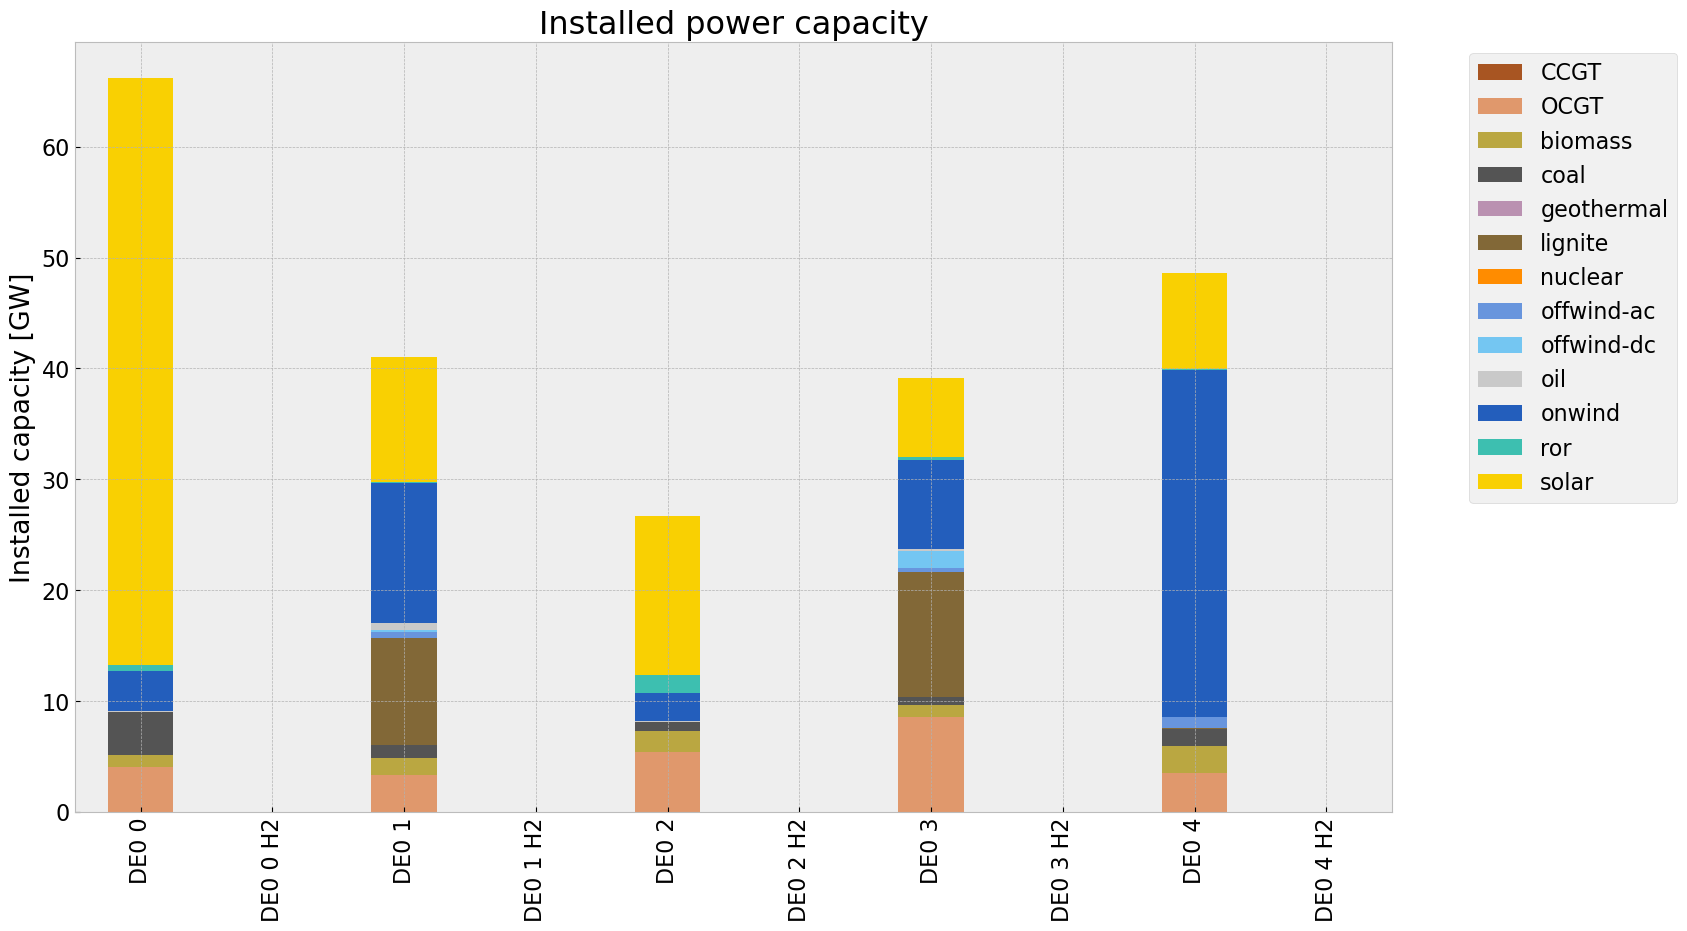

<Figure size 640x480 with 0 Axes>

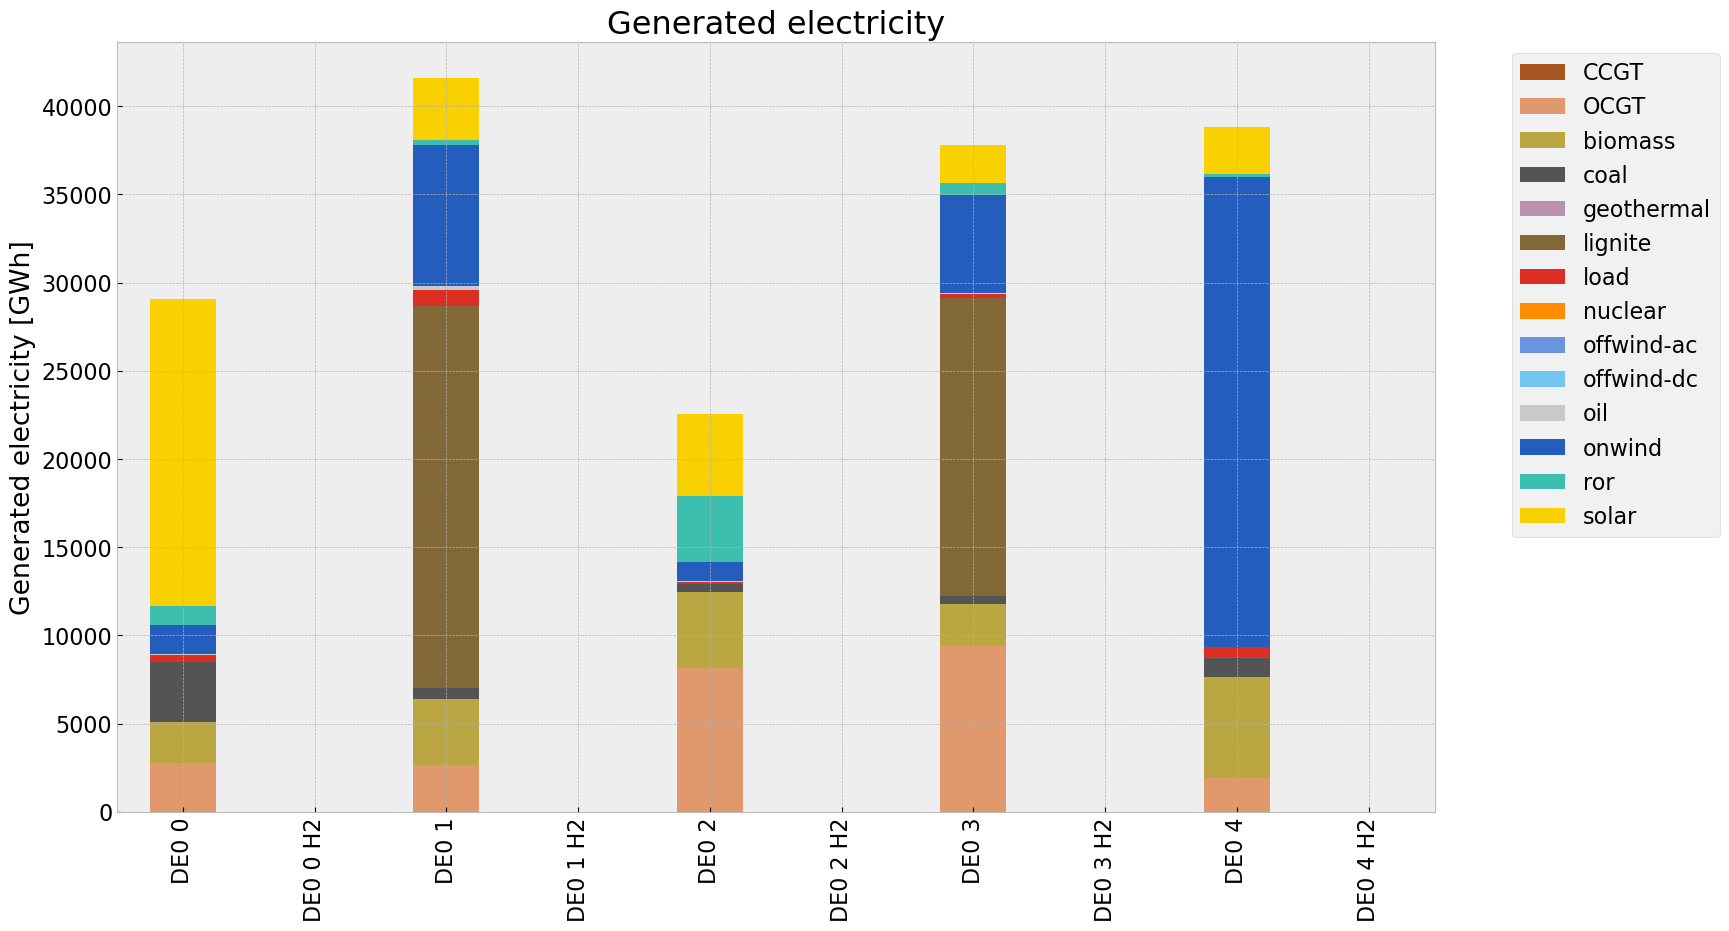

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\1913995090.py:33: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  p = n3.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\1913995090.py:34: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sto = n3.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\1422613485.py:6: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  p_by_carrier = n.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\1422613485.py:10: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  links = n.links_t.p1.groupby(n.links.carri

Generation in MWh  efficiency  emissions in Tonnes CO2/MWh  \
carrier                                                                  
CCGT             0.000000e+00    0.580000                       0.1980   
OCGT             2.488495e+07    0.499437                       0.1980   
biomass          1.839721e+07    0.468000                       0.0000   
coal             6.015969e+06    0.329632                       0.3361   
geothermal       0.000000e+00    1.000000                       0.1200   
lignite          3.867140e+07    0.358368                       0.4069   
load             2.209702e+06    1.000000                       0.0000   
nuclear          0.000000e+00    0.328400                       0.0000   
offwind-ac       1.269690e+04    1.000000                       0.0000   
offwind-dc       1.290708e+04    1.000000                       0.0000   
oil              3.772496e+05    0.368808                       0.2571   
onwind           4.291798e+07    1.000000                       0.0000   
ror              5.951822e+06    0.900000                       0.0000   
solar            3.031388e+07    1.000000                       0.0000   

            emissions in Tonnes CO2  
carrier                              
CCGT                   0.000000e+00  
OCGT                   9.865554e+06  
biomass                0.000000e+00  
coal                   6.134011e+06  
geothermal             0.000000e+00  
lignite                4.390854e+07  
load                   0.000000e+00  
nuclear                0.000000e+00  
offwind-ac             0.000000e+00  
offwind-dc             0.000000e+00  
oil                    2.629848e+05  
onwind                 0.000000e+00  
ror                    0.000000e+00  
solar                  0.000000e+00

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


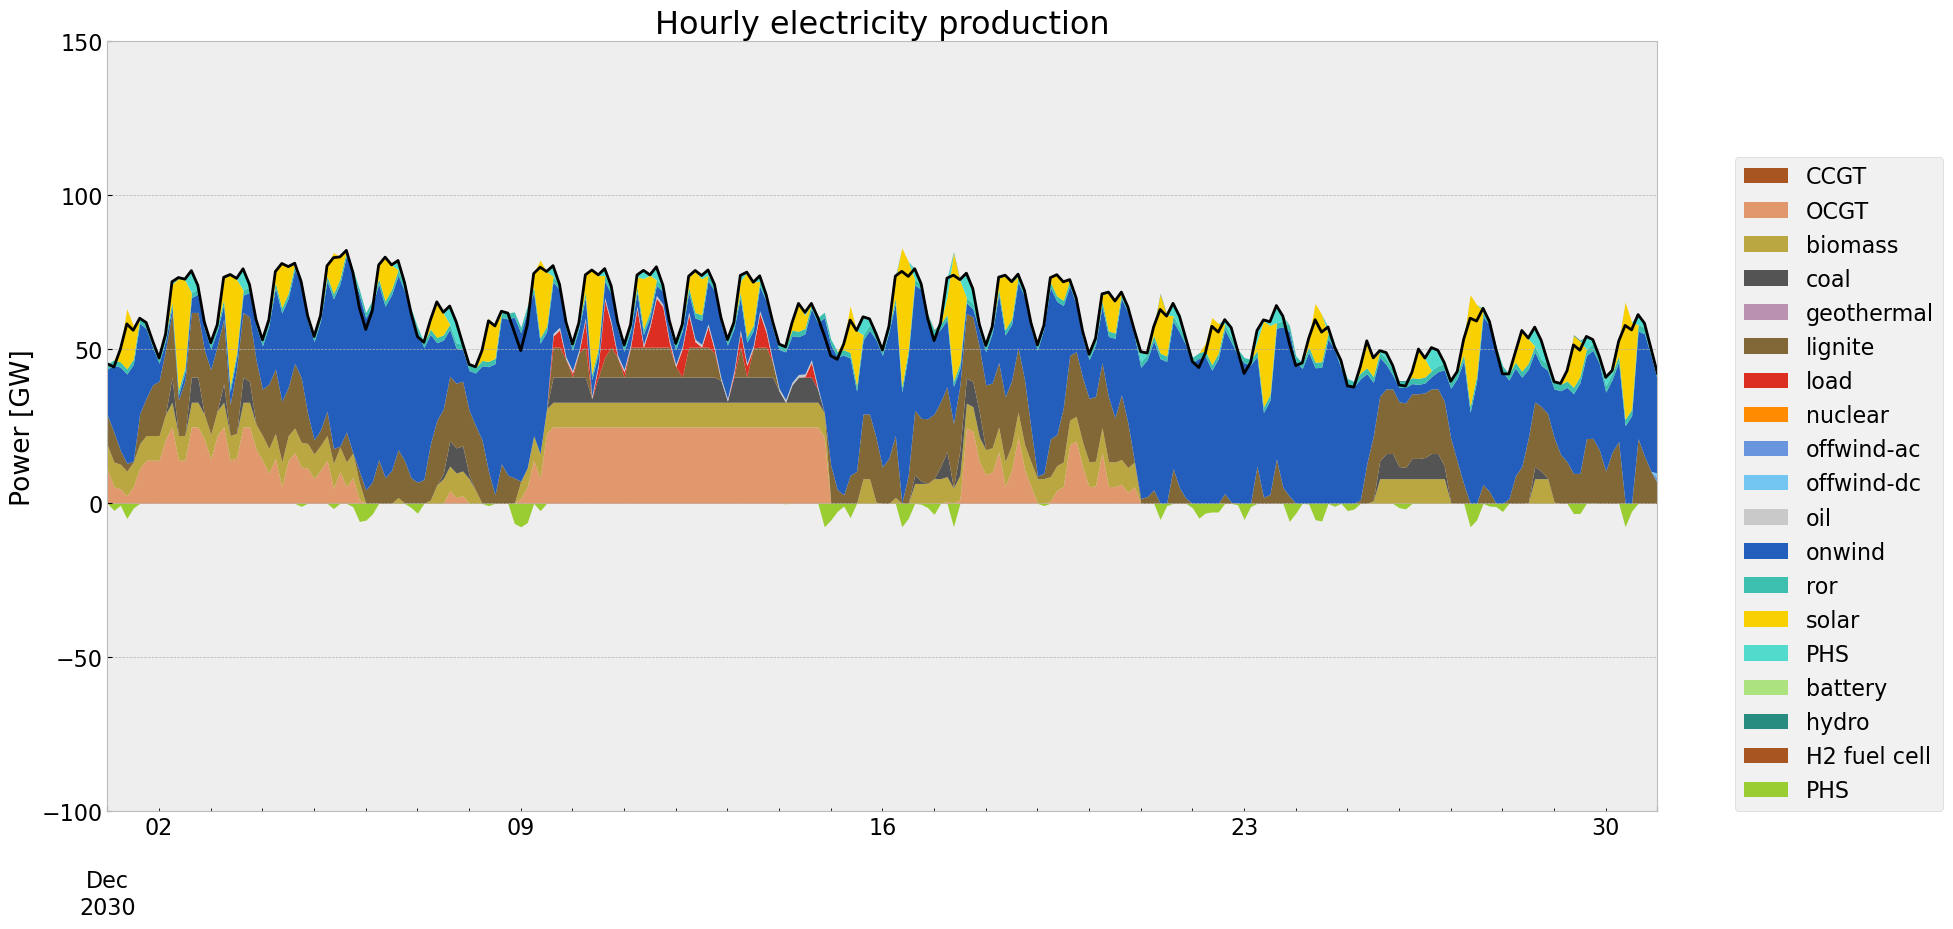

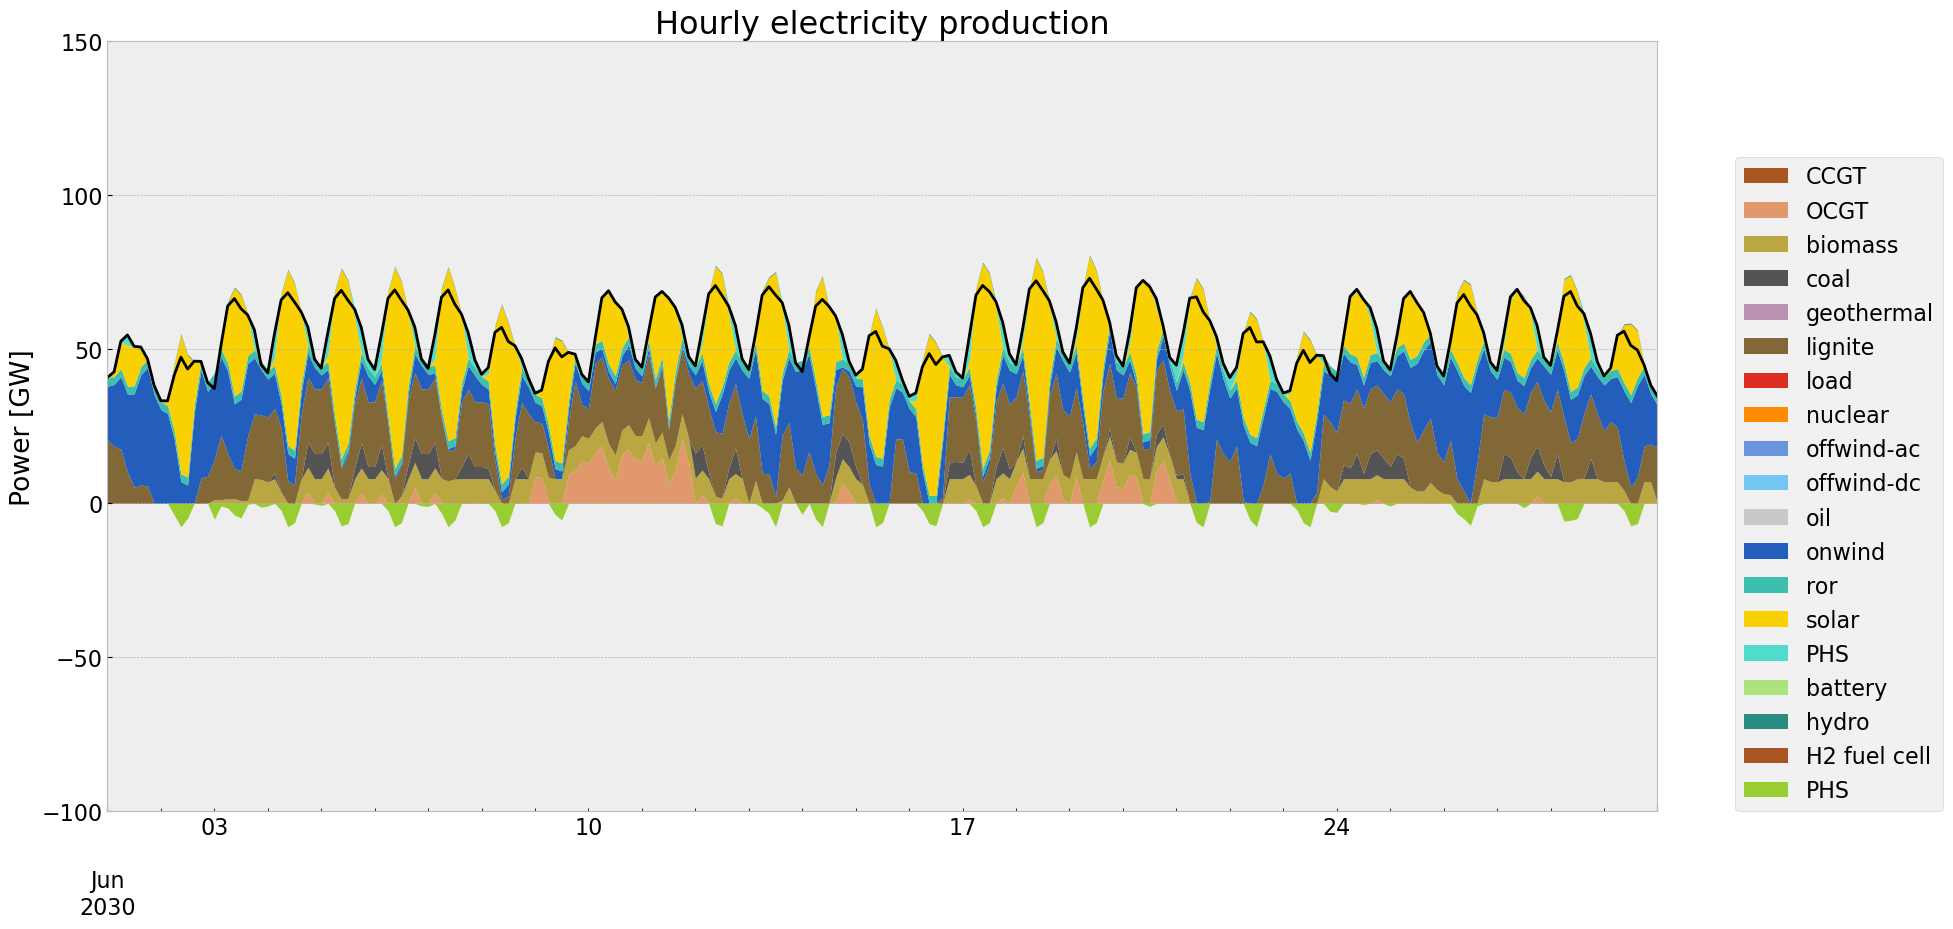

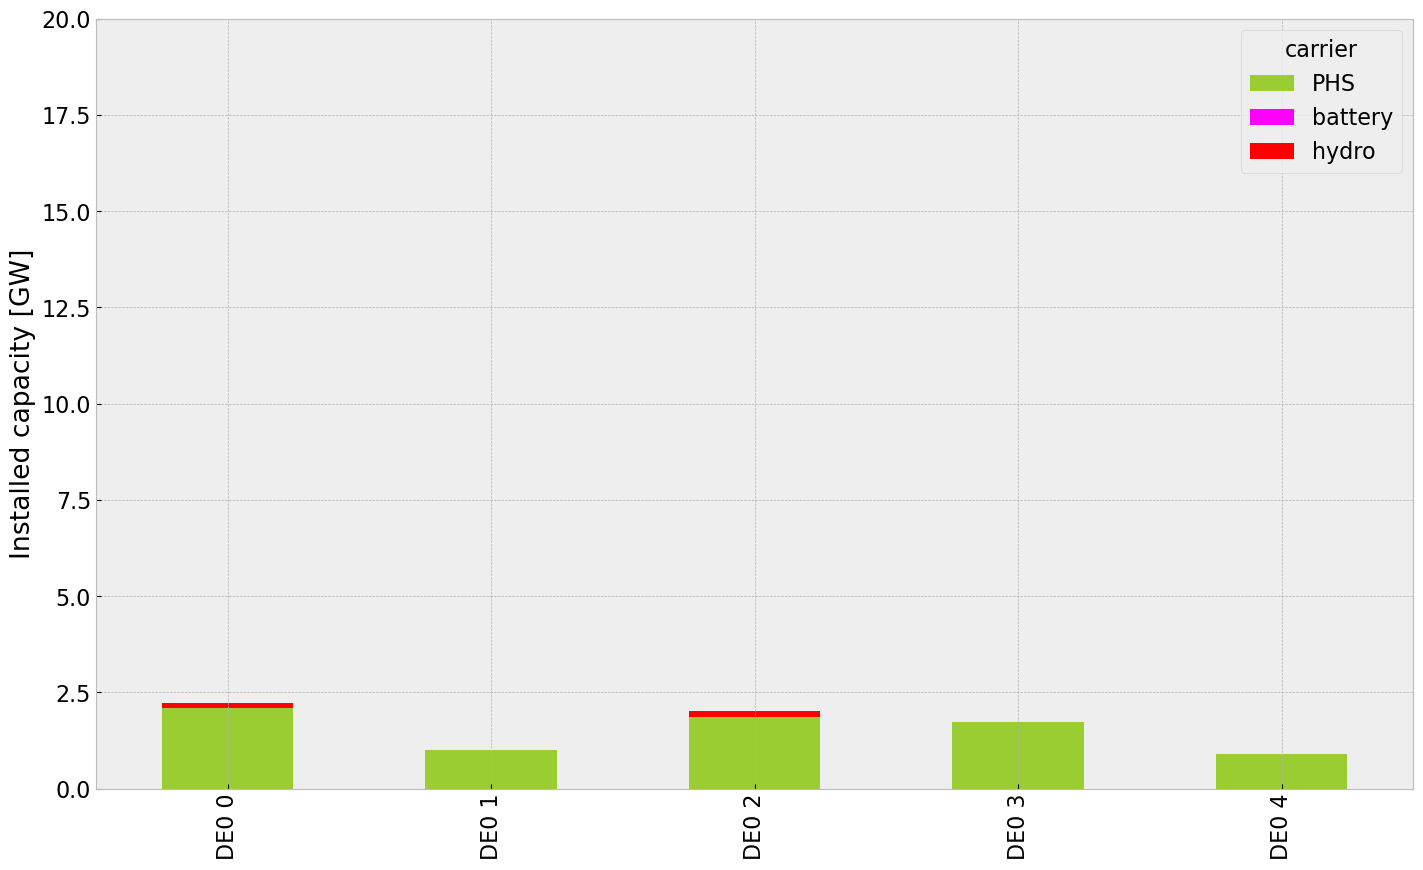

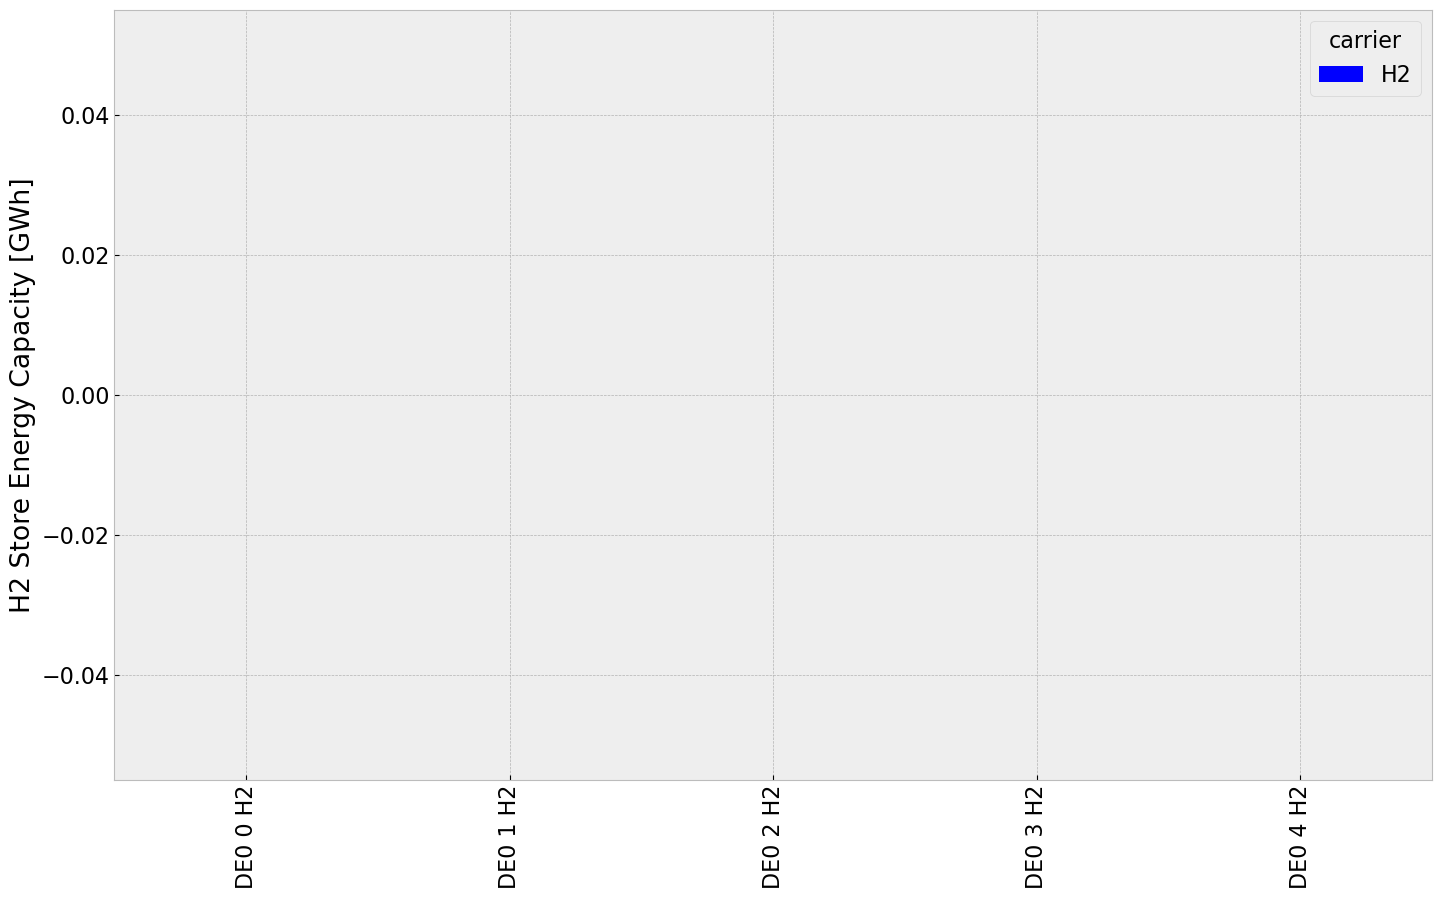

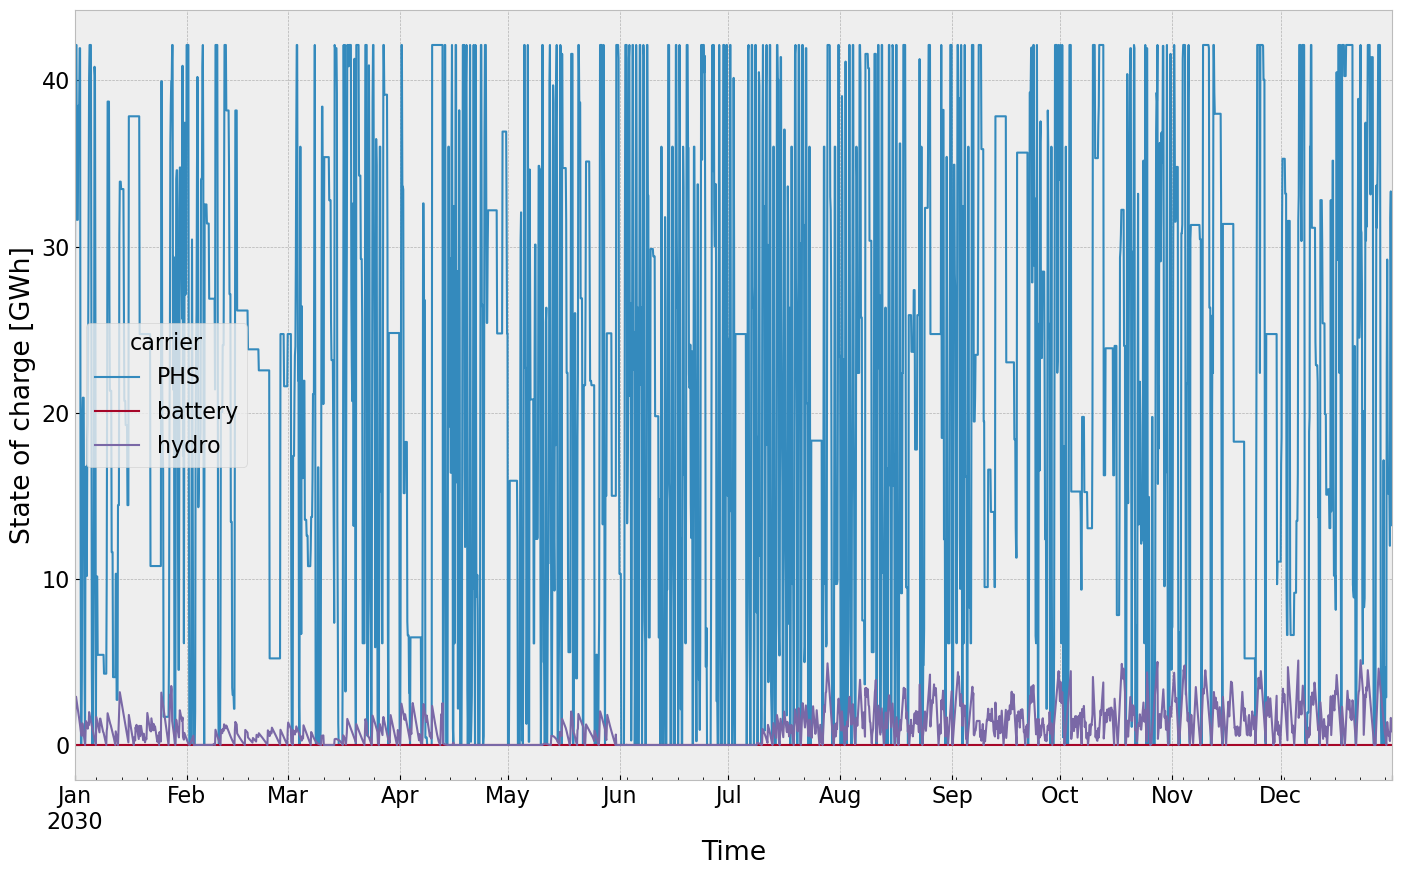

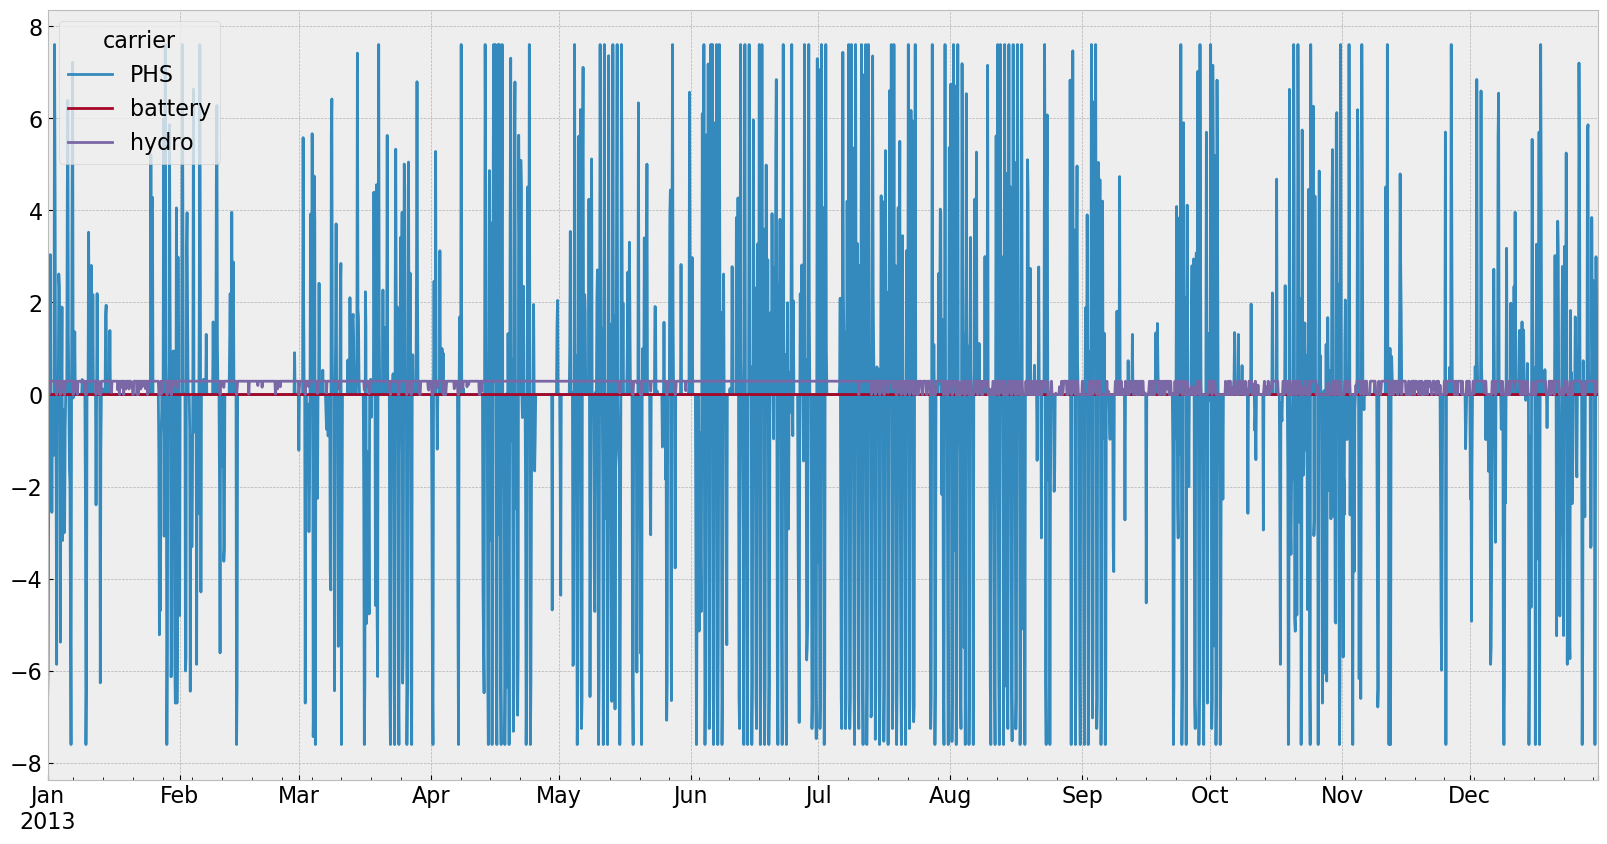

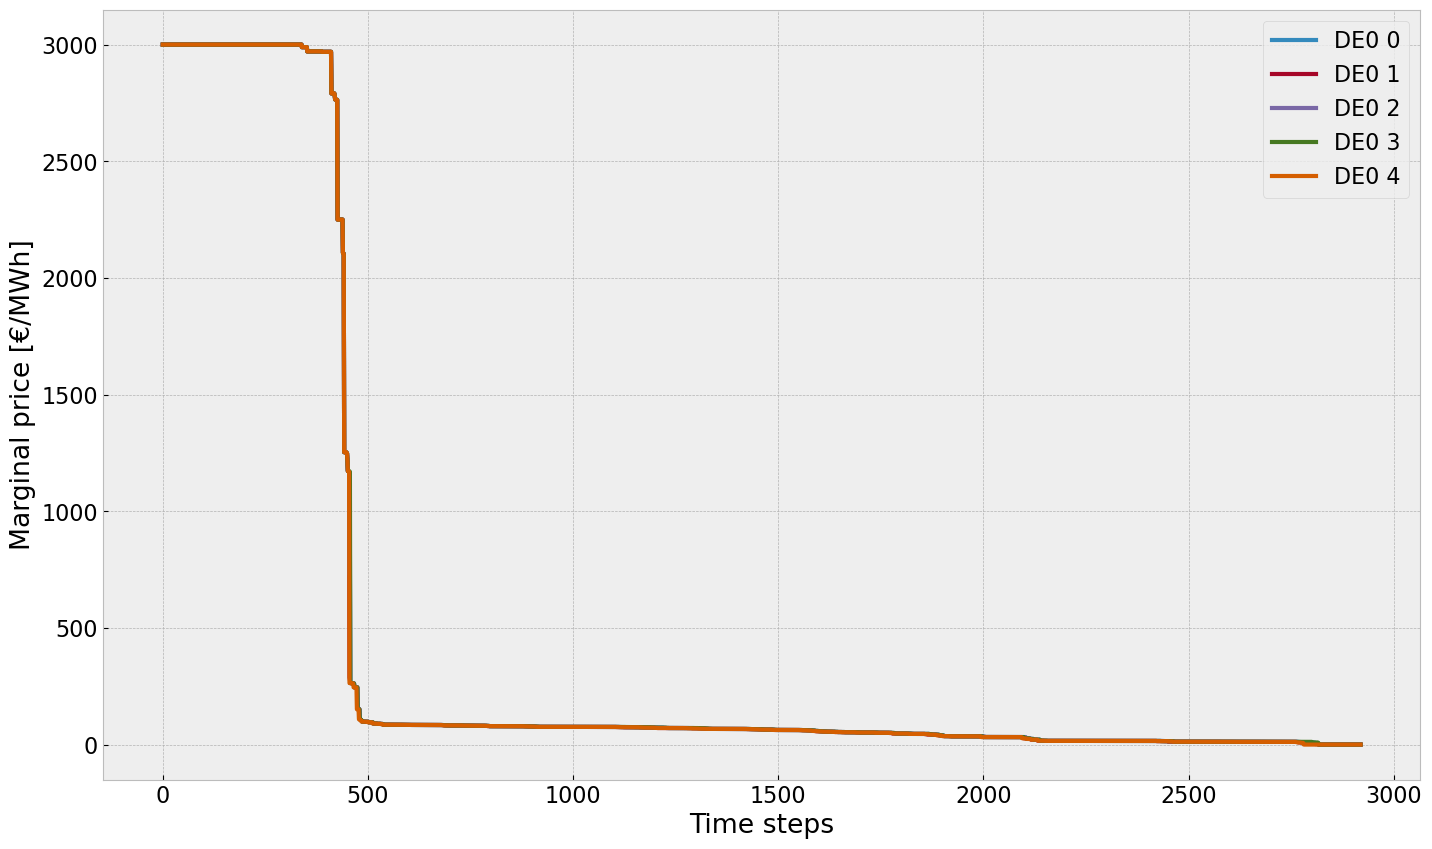

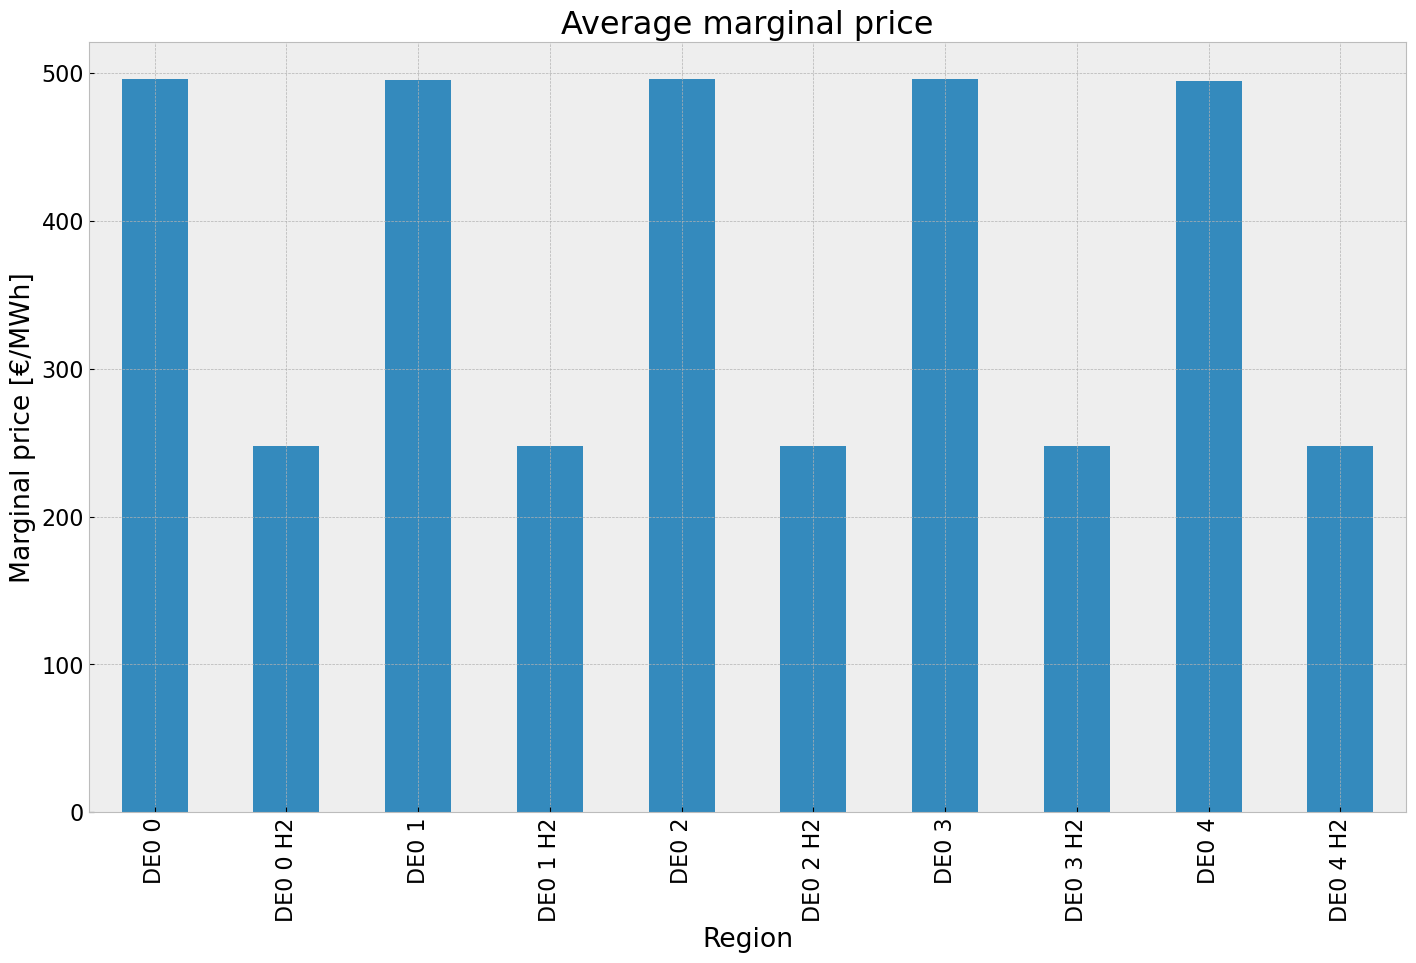

c:\Users\Jeremy\anaconda3\envs\pypsa-eur\Lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


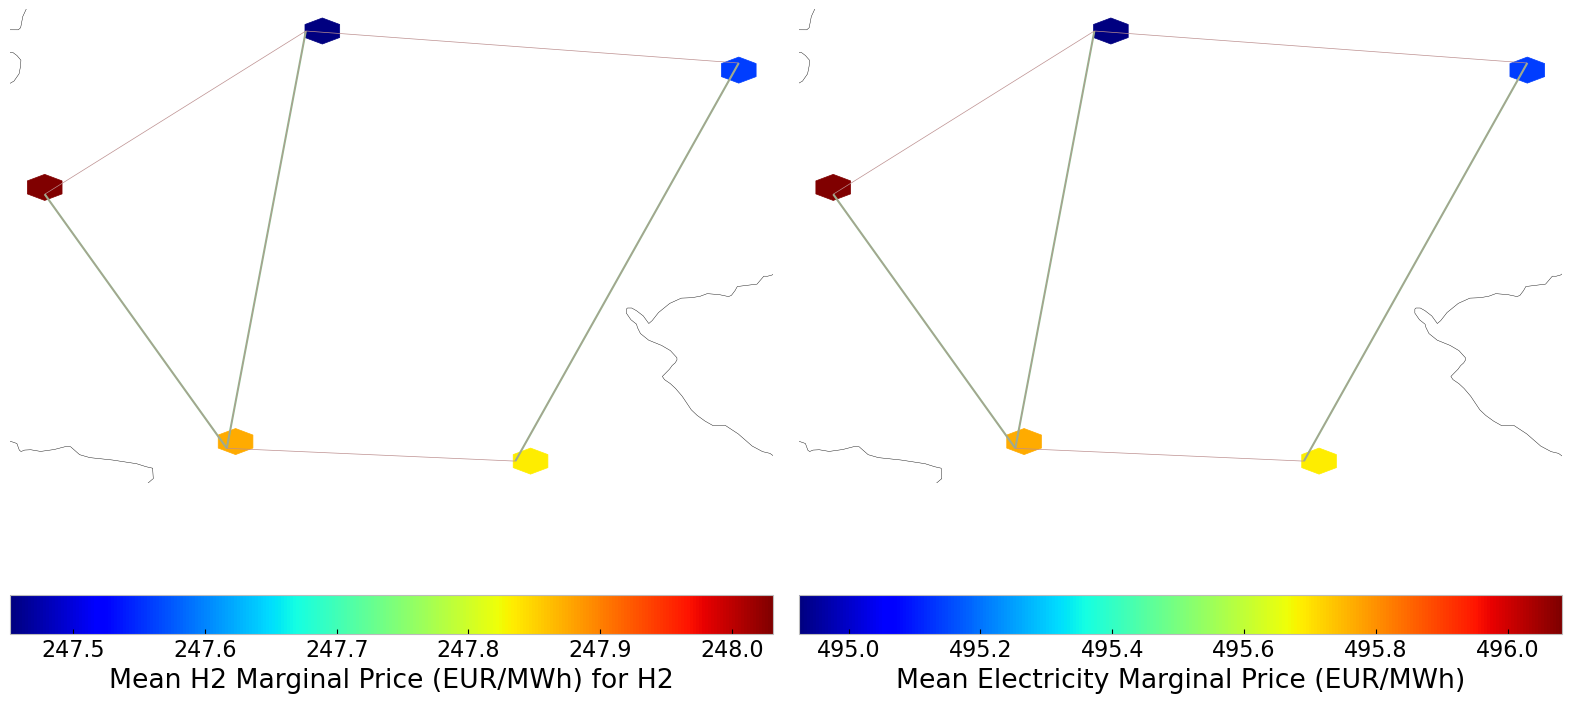

In [114]:
# Plotting
#installed cap
capacities_noinv_roll = n3.generators.groupby(['bus', 'carrier']).p_nom_opt.sum()
capacities_noinv_roll.fillna(0, inplace=True)
gen = (capacities_noinv_roll.unstack()/1000).drop(columns=['load'],inplace=False)


cap_noinv_roll = inst_cap_table(n3, color_cap)

#Generation table
# consolidated generation table
carrier = n3.generators.carrier.unique()
df_tot_generation = n3.generators_t.p.sum()

generations = pd.Series(index = n3.generators.groupby(['bus', 'carrier']).p_nom_opt.sum().index)

for r in region:
    for tech in carrier:
        key = f"{r} {tech}"
        if key in df_tot_generation.index:
            try:
                generations.loc[r, tech] = df_tot_generation[key]
                #print(generations.loc[r, tech])
            except KeyError:
                print('error')
generations.fillna(0, inplace=True)

gen_noinv_roll =(generations.unstack()/1000)#GWh

gen_noinv_roll  = gen_power_table(n3,colors_gen_table)

#Snapshot Summer and Winter
p = n3.generators_t.p.groupby(n.generators.carrier, axis=1).sum().div(1e3)
sto = n3.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3)    

gen_curve(n3, '2030-12-01', '2030-12-31', colors_gen)
gen_curve(n3, '2030-06-01', '2030-06-30', colors_gen)

#installed storage unit & stores
inst_store_table(n3)
inst_storeh2_table(n3)

#State of Charge Storage unit
state_of_charge_plot(n3)
n3.storage_units_t.p.groupby(n.storage_units.carrier, axis=1).sum().div(1e3).loc[pd.date_range(start="2013-01-01", end="2013-12-31",freq='3H')].plot(figsize=(20,10))


#Electricitty Price duration curve
price_dur_curve_plot(n3)

#avg electricity price
price_regions_table(n3)
price_regions(n3)

#Emission
em_noinv_roll =em_table(n3)
em_noinv_roll

# Scenario Analysis

## Installed Capacity

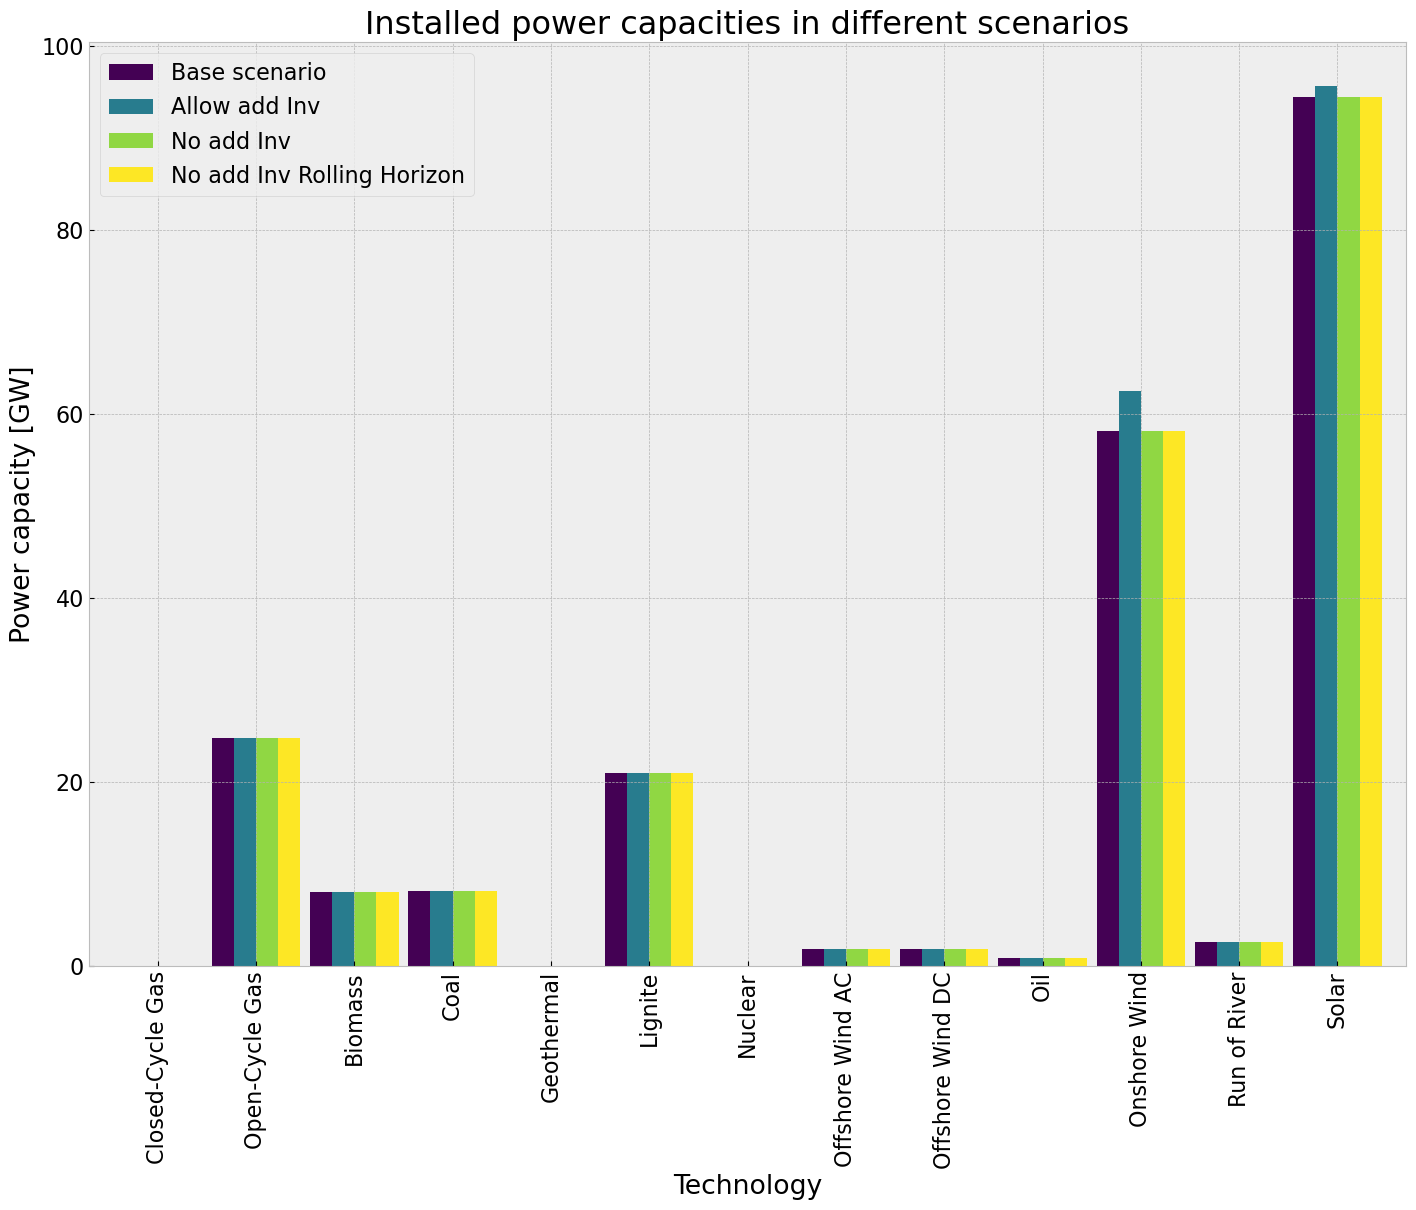

In [99]:
comp_inst_cap = pd.DataFrame(index=capacities_base.unstack().drop(columns=['load'],inplace=False).columns)

comp_inst_cap["Base scenario"] = capacities_base.groupby("carrier").sum().div(1e3).drop(index="load")
comp_inst_cap["Allow add Inv"] = capacities_inv.groupby("carrier").sum().div(1e3).drop(index="load")
comp_inst_cap["No add Inv"] = capacities_noinv.groupby("carrier").sum().div(1e3).drop(index="load")
comp_inst_cap["No add Inv Rolling Horizon"] = capacities_noinv_roll.groupby("carrier").sum().div(1e3).drop(index="load")

comp_inst_cap.rename(index = {"coal": "Coal"}, inplace=True)
comp_inst_cap.rename(index = {"OCGT": "Open-Cycle Gas"}, inplace=True)
comp_inst_cap.rename(index = {"CCGT": "Closed-Cycle Gas"}, inplace=True)
comp_inst_cap.rename(index = {"ror": "Run of River"}, inplace=True)
comp_inst_cap.rename(index = {"offwind-ac": "Offshore Wind AC"}, inplace=True)
comp_inst_cap.rename(index = {"offwind-dc": "Offshore Wind DC"}, inplace=True)
comp_inst_cap.rename(index = {"onwind": "Onshore Wind"}, inplace=True)
comp_inst_cap.rename(index = {"solar": "Solar"}, inplace=True)
comp_inst_cap.rename(index = {"oil": "Oil"}, inplace=True)
comp_inst_cap.rename(index = {"geothermal": "Geothermal"}, inplace=True)
comp_inst_cap.rename(index = {"nuclear": "Nuclear"}, inplace=True)
comp_inst_cap.rename(index = {"biomass": "Biomass"}, inplace=True)
comp_inst_cap.rename(index = {"lignite": "Lignite"}, inplace=True)

comp_inst_cap.fillna(0, inplace=True)

comp_inst_cap.plot.bar(figsize=(17,12),
                        color=cm.viridis(np.linspace(0, 5, len(comp_inst_cap))),
                        grid=True,
                        xlabel="Technology",
                        ylabel="Power capacity [GW]",
                        title=f"Installed power capacities in different scenarios",
                        #ylim=[0,350],
                        width=0.9
)
plt.show()

In [100]:
comp_inst_cap

Base scenario  Allow add Inv  No add Inv  \
carrier                                                      
Closed-Cycle Gas       0.000000       0.000000    0.000000   
Open-Cycle Gas        24.815903      24.815903   24.815903   
Biomass                8.011736       8.011736    8.011736   
Coal                   8.158220       8.158220    8.158220   
Geothermal             0.000000       0.000000    0.000000   
Lignite               20.999170      20.999170   20.999170   
Nuclear                0.000000       0.000000    0.000000   
Offshore Wind AC       1.860747       1.860747    1.860747   
Offshore Wind DC       1.832132       1.832132    1.832132   
Oil                    0.856300       0.856300    0.856300   
Onshore Wind          58.151641      62.458978   58.151641   
Run of River           2.586153       2.586153    2.586153   
Solar                 94.456436      95.606864   94.456436   

                  No add Inv Rolling Horizon  
carrier                                       
Closed-Cycle Gas                    0.000000  
Open-Cycle Gas                     24.815903  
Biomass                             8.011736  
Coal                                8.158220  
Geothermal                          0.000000  
Lignite                            20.999170  
Nuclear                             0.000000  
Offshore Wind AC                    1.860747  
Offshore Wind DC                    1.832132  
Oil                                 0.856300  
Onshore Wind                       58.151641  
Run of River                        2.586153  
Solar                              94.456436

## Power Generation

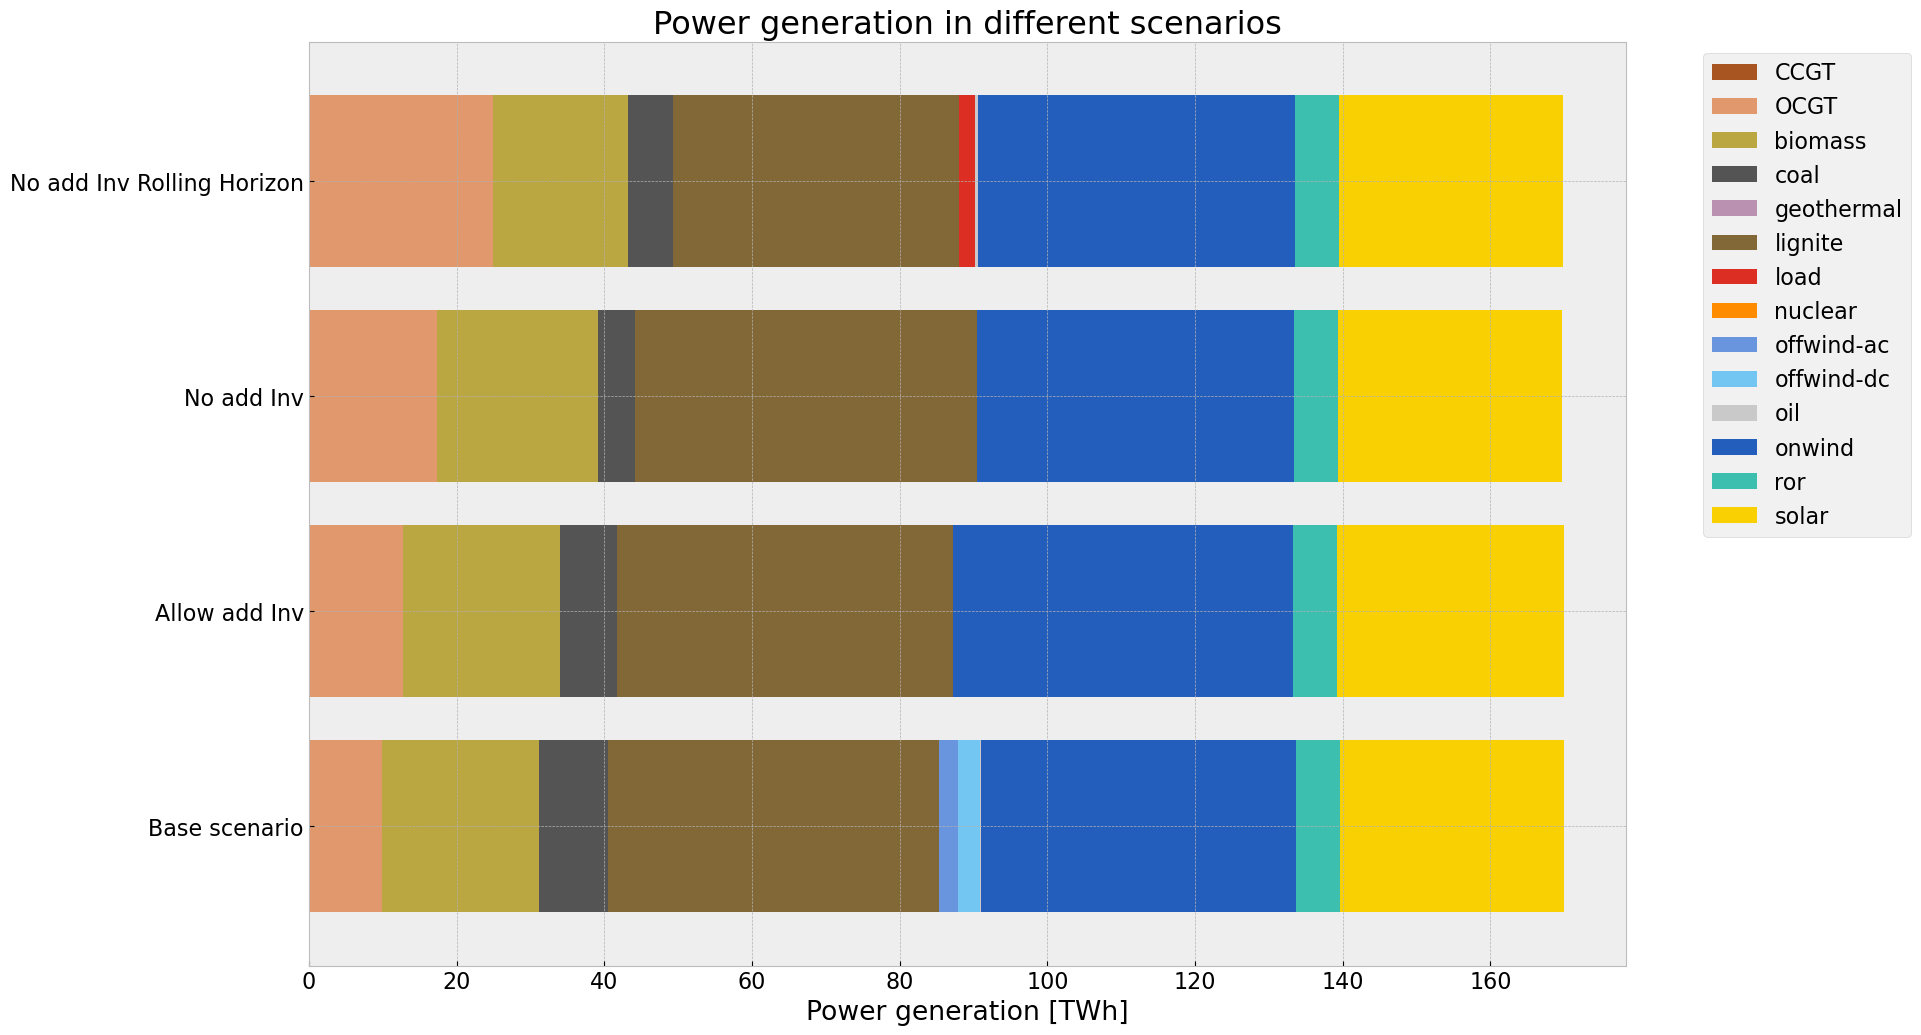

In [102]:
comp_gen_electr = pd.DataFrame(index = ["Base scenario", "Allow add Inv", "No add Inv", "No add Inv Rolling Horizon"],
                                columns = tech_list_gen_table)

comp_gen_electr.loc["Base scenario"] = gen_base.sum().div(1e3) # TWh/a
comp_gen_electr.loc["Allow add Inv"] = gen_inv.sum().div(1e3) # TWh/a
comp_gen_electr.loc["No add Inv"] = gen_noinv.sum().div(1e3) # TWh/a
comp_gen_electr.loc["No add Inv Rolling Horizon"] = gen_noinv_roll.sum().div(1e3) # TWh/a


#comp_gen_electr.rename(columns = {"coal": "Coal"}, inplace=True)
#comp_gen_electr.rename(columns = {"gas": "Gas"}, inplace=True)
#comp_gen_electr.rename(columns = {"hydro": "Hydro"}, inplace=True)
#comp_gen_electr.rename(columns = {"offwind": "Offshore Wind"}, inplace=True)
#comp_gen_electr.rename(columns = {"onwind": "Onshore Wind"}, inplace=True)
#comp_gen_electr.rename(columns = {"solar": "Solar"}, inplace=True)
#comp_gen_electr.rename(columns = {"oil": "Oil"}, inplace=True)
#comp_gen_electr.rename(columns = {"geothermal": "Geothermal"}, inplace=True)
#comp_gen_electr.rename(columns = {"nuclear": "Nuclear"}, inplace=True)

comp_gen_electr.fillna(0, inplace=True)
comp_gen_electr.plot.barh(figsize=(17,12),
                        color=colors_gen_table,
                        grid=True,
                        stacked=True, 
                        ylabel="",
                        xlabel="Power generation [TWh]",
                        title=f"Power generation in different scenarios",
                        #xlim=[0,200],
                        width=0.8
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Average System Cost

In [103]:
tech_comp = system_cost_base.index.tolist()
comp_system_cost = pd.DataFrame(index = ["Base scenario", "Allowed add Inv", "No add Inv", "No add Inv Rolling Horizon"],
                                columns =tech_comp)

demand = n.snapshot_weightings.generators @ n.loads_t.p_set.sum(axis=1) # the same in each scenario

comp_system_cost.loc["Base scenario"] = system_cost_base # Million €/a
comp_system_cost.loc["Allowed add Inv"] = system_cost_inv # Million €/a
#if tot_cost_0_PV > 0: 
#    comp_system_cost.loc["0% PV potential"] = system_cost_0_PV # Million €/a
#else: comp_system_cost.loc["0% PV potential"] = 0.0
#if tot_cost_20_PV > 0: 
#    comp_system_cost.loc["20% PV potential"] = system_cost_20_PV # Million €/a
#else: comp_system_cost.loc["20% PV potential"] = 0.0
comp_system_cost.loc["No add Inv"] = system_cost_noinv # Million €/a
comp_system_cost.loc["No add Inv Rolling Horizon"] = system_cost_noinv_roll # Million €/a

if 'AC' in system_cost_base:
    comp_system_cost.AC = comp_system_cost.AC-system_cost_base.AC # expenditure for already existing transmission lines

comp_system_cost[comp_system_cost<0] = 0 # since we subtact the AC cost (for the 0% or 20%) 
#comp_system_cost.iloc[0,0] = system_cost_base.AC


comp_system_cost = comp_system_cost.mul(1e6).div(demand) #eur0/

#comp_system_cost.rename(columns = {"battery storage": "Battery storage"}, inplace=True)
#comp_system_cost.rename(columns = {"hydrogen storage underground": "Hydrogen storage underground"}, inplace=True)

comp_system_cost.fillna(0, inplace=True)

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\2925963551.py:30: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  comp_system_cost.fillna(0, inplace=True)


C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\3585904631.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if comp_system_cost.columns[i] == n.carriers.nice_name[j]:
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\3585904631.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  colors_comp.append(n.carriers.color[j])


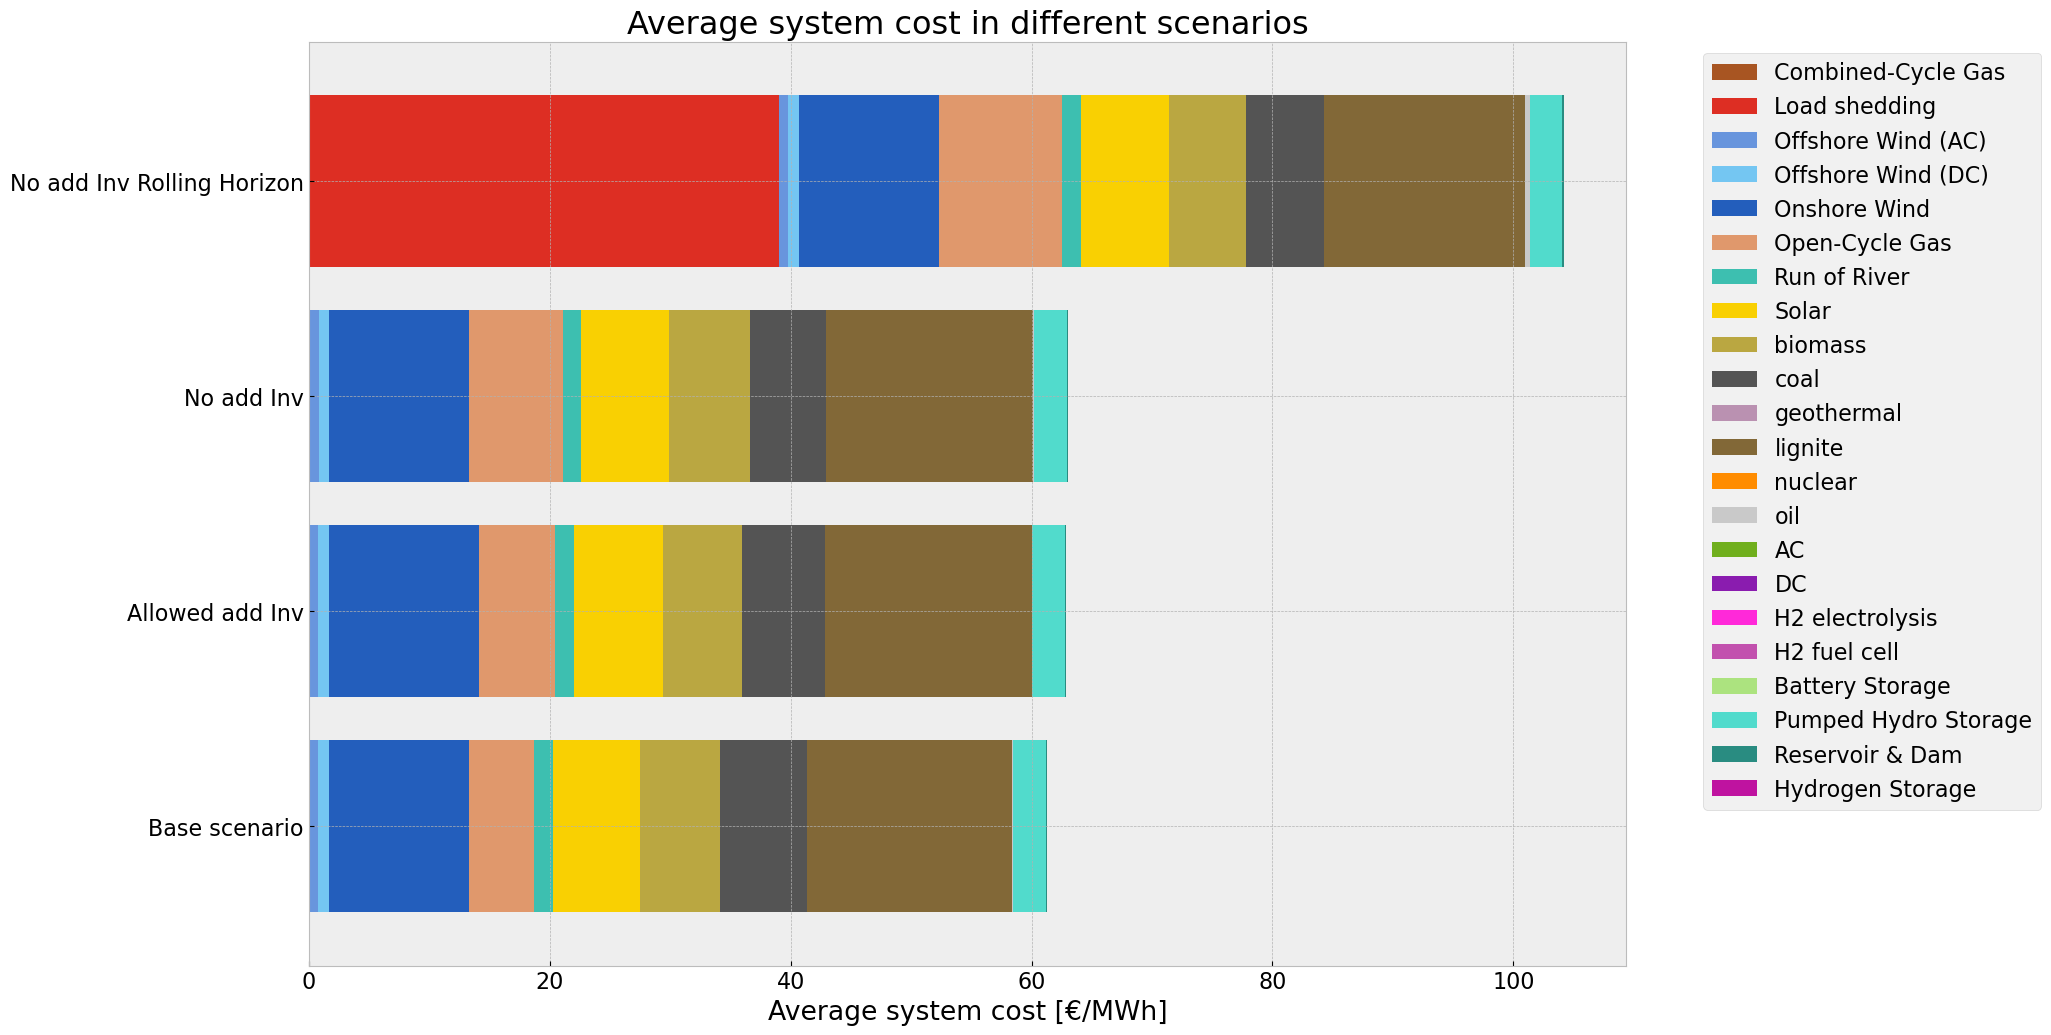

In [104]:
colors_comp = []

for i in range(len(comp_system_cost.columns)):
    for j in range(len(n.carriers.nice_name)):
        if comp_system_cost.columns[i] == n.carriers.nice_name[j]:
            colors_comp.append(n.carriers.color[j])
            #print(n.carriers.nice_name[j],comp_system_cost.columns[i],n.carriers.color[j])
            break  # break the inner loop once a match is found  



comp_system_cost.plot.barh(figsize=(17,12),
                        color=colors_comp,
                        grid=True,
                        stacked=True,
                        ylabel="",
                        xlabel="Average system cost [€/MWh]",
                        title=f"Average system cost in different scenarios",
                        #xlim=[0,100],
                        width=0.8
)
# Move legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Curtailment

In [105]:
comp_curtailment = pd.DataFrame(index = ["Base scenario", "Allow add Inv", "No add Inv", "No add Inv Rolling Horizon"],
                                columns = stat_base.loc["Generator"].index)

comp_curtailment.loc["Base scenario"] = stat_base.loc["Generator"].Curtailment.div(1e6) # TWh
comp_curtailment.loc["Allow add Inv"] = stat_inv.loc["Generator"].Curtailment.div(1e6) # TWh
comp_curtailment.loc["No add Inv"] = stat_noinv.loc["Generator"].Curtailment.div(1e6) # TWh
comp_curtailment.loc["No add Inv Rolling Horizon"] = stat_noinv_roll.loc["Generator"].Curtailment.div(1e6) # TWh

comp_curtailment.fillna(0, inplace=True)

In [106]:
color_curtailment=[]

for i in range(len(comp_curtailment.columns)):
    for j in range(len(n.carriers.nice_name)):
        if comp_curtailment.columns[i] == n.carriers.nice_name[j]:
            color_curtailment.append(n.carriers.color[j])
            #print(n.carriers.nice_name[j],comp_system_cost.columns[i],n.carriers.color[j])
            break  # break the inner loop once a match is found 

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\3109801822.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if comp_curtailment.columns[i] == n.carriers.nice_name[j]:
C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\3109801822.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color_curtailment.append(n.carriers.color[j])


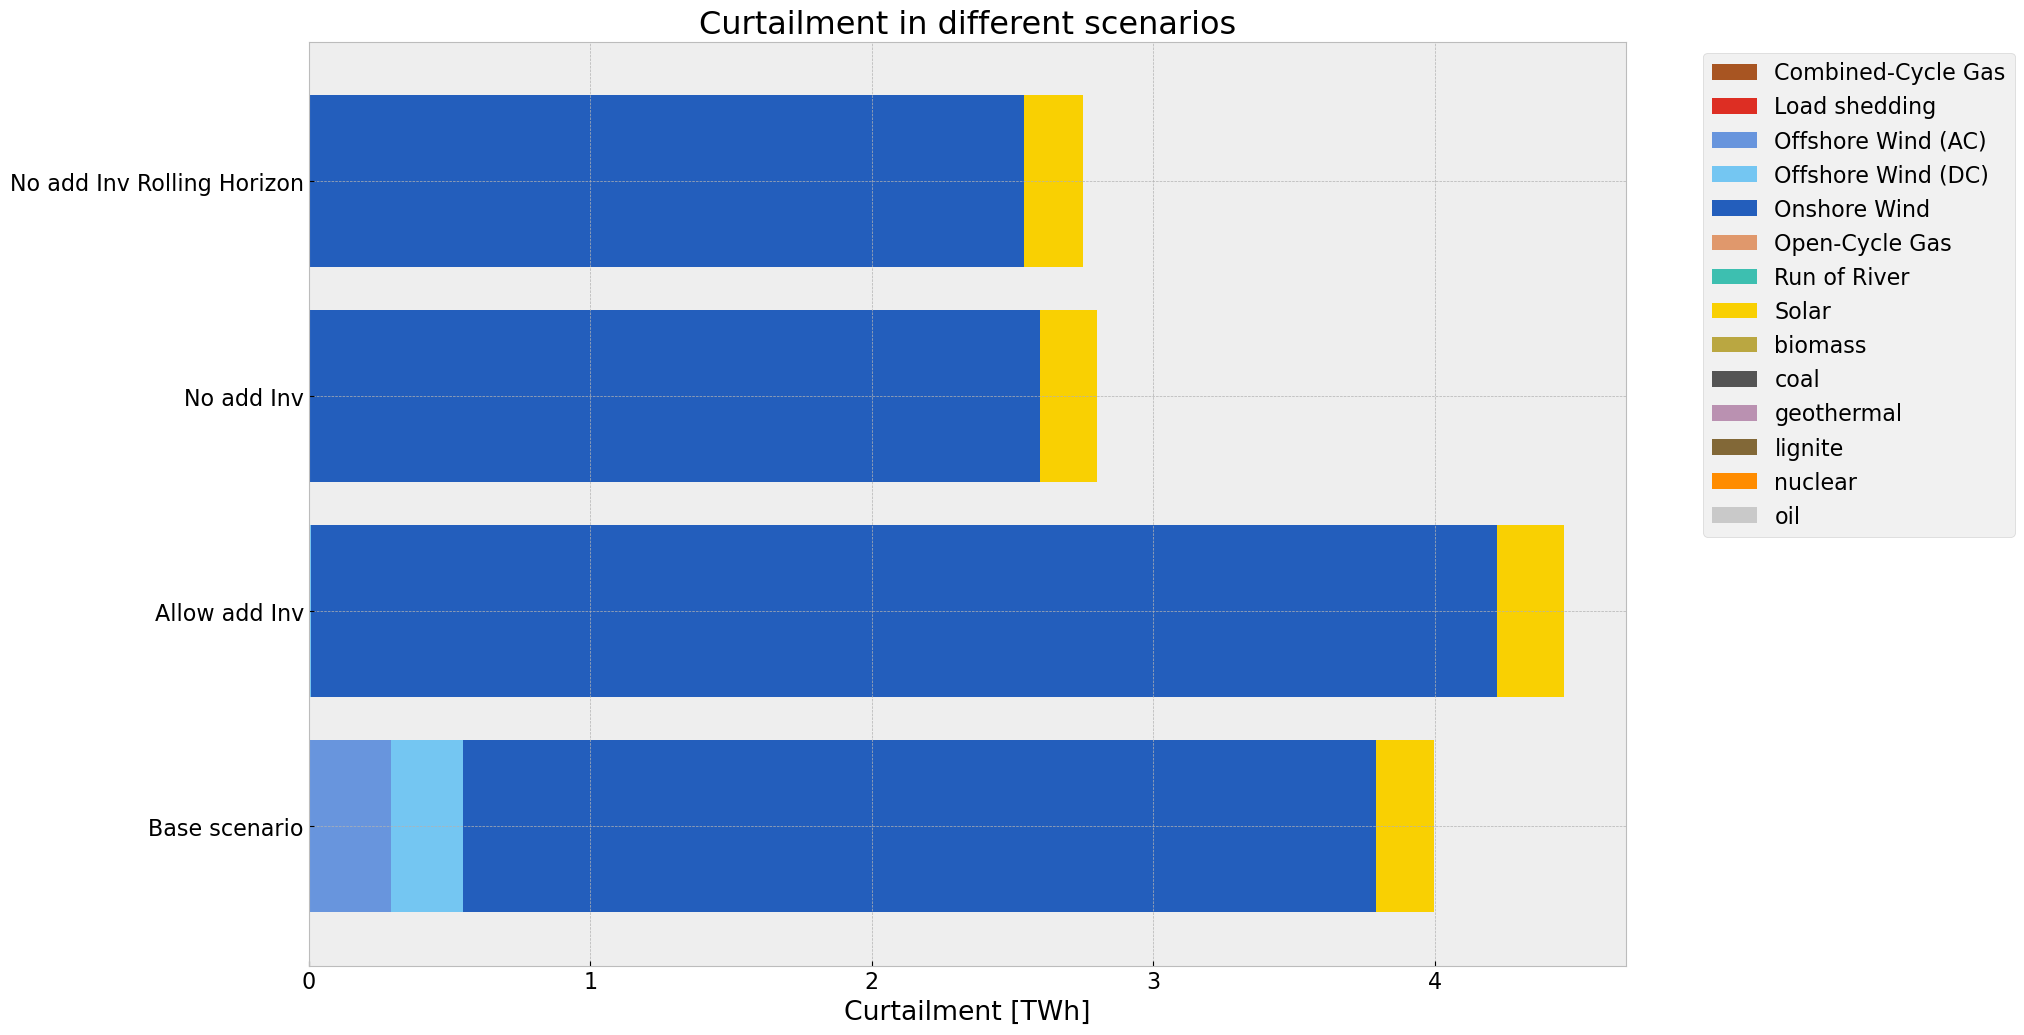

In [107]:
comp_curtailment.plot.barh(figsize=(17,12),
                        color=color_curtailment,
                        grid=True,
                        stacked=True, 
                        ylabel="",
                        xlabel="Curtailment [TWh]",
                        title=f"Curtailment in different scenarios",
                        #xlim=[0,120],
                        width=0.8
)
# Move legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Emission

C:\Users\Jeremy\AppData\Local\Temp\ipykernel_22388\3440082642.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  colors_comp.append(n.carriers.color[j])


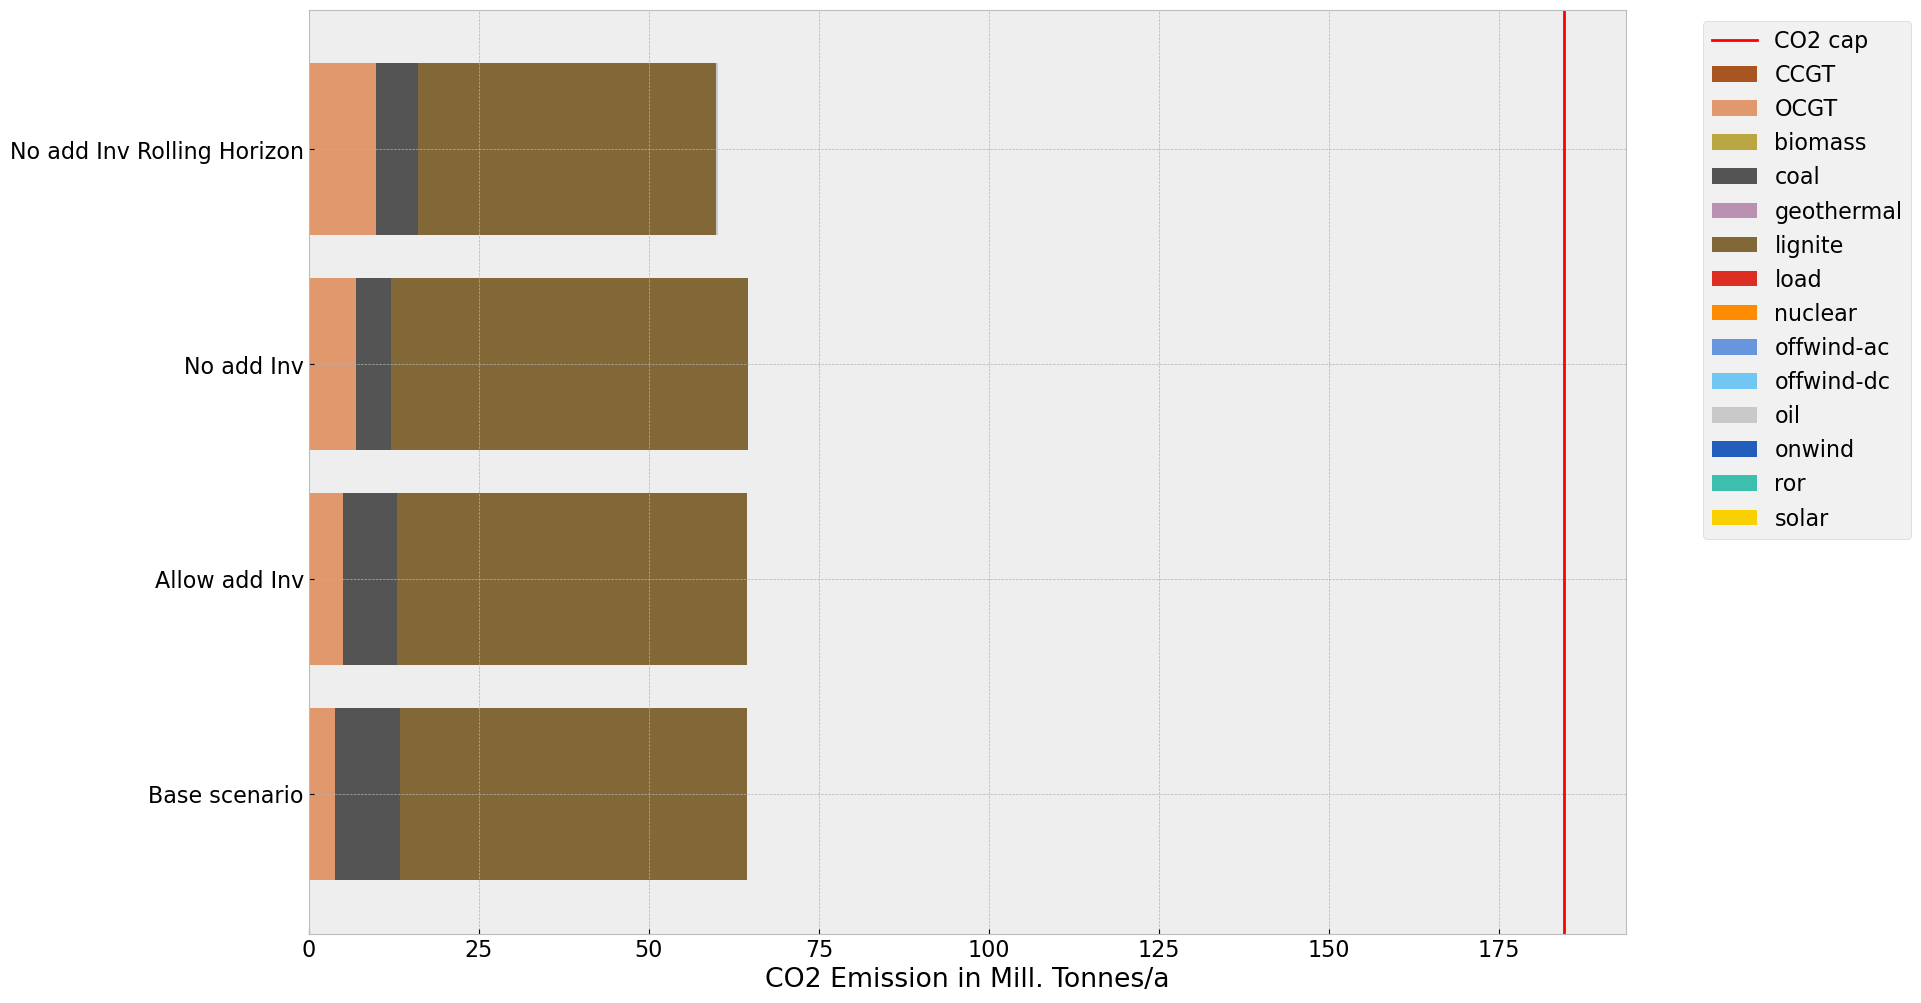

In [108]:
tech_comp = em_base.index.tolist()
comp_system_em = pd.DataFrame(index = ["Base scenario", "Allow add Inv", "No add Inv", "No add Inv Rolling Horizon"],
                                columns =tech_comp)

#demand = n.snapshot_weightings.generators @ n.loads_t.p_set.sum(axis=1) # the same in each scenario

comp_system_em.loc["Base scenario"] = em_base['emissions in Tonnes CO2']/1e6 # Mill. Tonnes CO2 /a
comp_system_em.loc["Allow add Inv"] = em_inv['emissions in Tonnes CO2'] /1e6 # Mill. Tonnes CO2 /a
comp_system_em.loc["No add Inv"] = em_noinv['emissions in Tonnes CO2'] /1e6 # Mill. Tonnes CO2 /a
comp_system_em.loc["No add Inv Rolling Horizon"] = em_noinv_roll['emissions in Tonnes CO2'] /1e6 # Mill. Tonnes CO2 /a

comp_system_em.fillna(0, inplace=True)

colors_comp = []

for i in range(len(comp_system_em.columns)):
    for j in range(len(n.carriers.index)):
        if comp_system_em.columns[i] == n.carriers.index[j]:
            colors_comp.append(n.carriers.color[j])
            #print(n.carriers.nice_name[j],comp_system_cost.columns[i],n.carriers.color[j])
            break  # break the inner loop once a match is found  



comp_system_em.plot.barh(figsize=(17,12),
                        color=colors_comp,
                        grid=True,
                        stacked=True,
                        ylabel="",
                        xlabel="CO2 Emission in Mill. Tonnes/a",
                        #title=f"Average system cost in different scenarios",
                        #xlim=[0,100],
                        width=0.8
)
#global_constraint
plt.axvline(x=n.global_constraints.loc['CO2Limit','constant']/1e6, color='r', linestyle='-', linewidth=2, label='CO2 cap')
# Move legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()